# VL04 설비 기준 EDA 및 분석

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 200)

In [3]:
os.getcwd()

'C:\\Users\\cubic\\Desktop\\Daeshin'

In [4]:
file_list = os.listdir('C:\\Users\\cubic\\Desktop\\Daeshin')
file_list

['.ipynb_checkpoints',
 'Daeshin_parameter_detail_220710.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Daeshin_parameter_detail_220713.csv',
 'Daeshin_parameter_detail_220714.csv',
 'Daeshin_parameter_detail_220715.csv',
 'Daeshin_parameter_detail_220716.csv',
 'Daeshin_parameter_detail_220717.csv',
 'Daeshin_parameter_detail_220718.csv',
 'Daeshin_parameter_detail_220719.csv',
 'Daeshin_parameter_detail_220720.csv',
 'Daeshin_parameter_detail_220721.csv',
 'Daeshin_parameter_detail_220725.csv',
 'Database_data_EDA_2(0712~)_prior_MC_ID.ipynb',
 'practice.ipynb',
 'VL04_0710_0721_analysis.ipynb',
 'VL04_0710_0721_analysis_Tool5.ipynb',
 'VL04_0710_0721_analysis_Tool9.ipynb',
 'VL04_0710_0721_analysis_ToolF.ipynb',
 'VL04_shot_prediction.ipynb']

In [5]:
file_list_csv = [file_csv for file_csv in file_list if file_csv.endswith('.csv')]
file_list_csv

['Daeshin_parameter_detail_220710.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Daeshin_parameter_detail_220713.csv',
 'Daeshin_parameter_detail_220714.csv',
 'Daeshin_parameter_detail_220715.csv',
 'Daeshin_parameter_detail_220716.csv',
 'Daeshin_parameter_detail_220717.csv',
 'Daeshin_parameter_detail_220718.csv',
 'Daeshin_parameter_detail_220719.csv',
 'Daeshin_parameter_detail_220720.csv',
 'Daeshin_parameter_detail_220721.csv',
 'Daeshin_parameter_detail_220725.csv']

# 사용데이터 정보

1. 22-07-22부터 07-25 14시49분까지 데이터 없음 -> 확인결과  2022-07-21 12시경 서버전원이 내려가면서 신호처리 서비스가 비정상적으로 종료
2. 2022-07-25 3시50분 경 데이터베이스 재시작
3. 07-25일 데이터 부분적으로 존재하기 때문에 제외
4. 진동값 기준 0.2초 단위로 수집되는 것도 MIT 부서에서 13일 이후로 처리됨
5. 2022-07-13 15:09:29(index 1591144) 이후의 데이터로만 모델 수립 -> 따라서, 시작 : 07-14, 종료 : 07-20

In [6]:
csv_df = pd.DataFrame()
for csv_idx in file_list_csv:
    read_csv = pd.read_csv(csv_idx)
    csv_df = pd.concat([csv_df, read_csv], axis = 0)
csv_df

datetime s_MC_No  tool_number  shot_no  \
0       2022-07-10 00:00:01.844280    VL09          NaN      0.0   
1       2022-07-10 00:00:01.943962    VL09          NaN      0.0   
2       2022-07-10 00:00:02.044165    VL09          NaN      0.0   
3       2022-07-10 00:00:02.144003    VL09          NaN      0.0   
4       2022-07-10 00:00:02.244455    VL09          NaN      0.0   
...                            ...     ...          ...      ...   
739549  2022-07-25 23:59:59.098897    VL01        500.0  17216.0   
739550  2022-07-25 23:59:59.288250    VL01        500.0  17216.0   
739551  2022-07-25 23:59:59.487049    VL01        500.0  17216.0   
739552  2022-07-25 23:59:59.718109    VL01        500.0  17216.0   
739553  2022-07-25 23:59:59.888632    VL01        500.0  17216.0   

                s_ITEM_Name  work_type  spindle_count  axes  current_x  \
0                       NaN          0            NaN   NaN        NaN   
1                       NaN          0            NaN   NaN        NaN   
2                       NaN          0            NaN   NaN        NaN   
3                       NaN          0            NaN   NaN        NaN   
4                       NaN          0            NaN   NaN        NaN   
...                     ...        ...            ...   ...        ...   
739549  MD Retarder Housing          0            1.0   2.0        0.0   
739550  MD Retarder Housing          0            1.0   2.0        0.0   
739551  MD Retarder Housing          0            1.0   2.0        0.0   
739552  MD Retarder Housing          0            1.0   2.0        0.0   
739553  MD Retarder Housing          0            1.0   2.0        0.0   

        current_z  current_spindle  vibration   pos_x_1   pos_z_1  pos_x_2  \
0             NaN                0        265       NaN       NaN      NaN   
1             NaN                0        266       NaN       NaN      NaN   
2             NaN                0        266       NaN       NaN      NaN   
3             NaN                0        266       NaN       NaN      NaN   
4             NaN                0        266       NaN       NaN      NaN   
...           ...              ...        ...       ...       ...      ...   
739549        3.0                0        251  640000.0  408342.0      NaN   
739550        3.0                0        250  640000.0  408342.0      NaN   
739551        4.0                0        250  640000.0  408342.0      NaN   
739552        4.0                0        251  640000.0  408342.0      NaN   
739553        4.0                0        251  640000.0  408342.0      NaN   

        pos_z_2  rpm  feed  load_1  load_2  servo_load_x  servo_load_z  \
0           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
1           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
2           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
3           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
4           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
...         ...  ...   ...     ...     ...           ...           ...   
739549      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739550      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739551      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739552      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739553      NaN  0.0   0.0     0.0     NaN           0.0          64.0   

        servo_current_x  servo_current_z  
0                   NaN              NaN  
1                   NaN              NaN  
2                   NaN              NaN  
3                   NaN              NaN  
4                   NaN              NaN  
...                 ...              ...  
739549              0.0            -64.0  
739550              0.0            -64.0  
739551              0.0            -64.0  
739552              0.0            -64.0  
739553              0

In [7]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20591413 entries, 0 to 739553
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   s_MC_No          object 
 2   tool_number      float64
 3   shot_no          float64
 4   s_ITEM_Name      object 
 5   work_type        int64  
 6   spindle_count    float64
 7   axes             float64
 8   current_x        float64
 9   current_z        float64
 10  current_spindle  int64  
 11  vibration        int64  
 12  pos_x_1          float64
 13  pos_z_1          float64
 14  pos_x_2          float64
 15  pos_z_2          float64
 16  rpm              float64
 17  feed             float64
 18  load_1           float64
 19  load_2           float64
 20  servo_load_x     float64
 21  servo_load_z     float64
 22  servo_current_x  float64
 23  servo_current_z  float64
dtypes: float64(18), int64(3), object(3)
memory usage: 3.8+ GB


In [8]:
df_VL04 = csv_df[(csv_df['s_MC_No'] == 'VL04')]
df_VL04['datetime'] = pd.to_datetime(df_VL04['datetime'])
df_VL04['date'] = df_VL04['datetime'].dt.date
df_VL04['hour'] = df_VL04['datetime'].dt.hour
df_VL04['minute'] = df_VL04['datetime'].dt.minute
df_VL04['second'] = df_VL04['datetime'].dt.second
df_VL04['date'] = pd.to_datetime(df_VL04['date'])

# 해당 기간의 데이터 추출을 위하여 df_VL04_mod1 변수 생성
df_VL04_mod1 = df_VL04[(df_VL04['date'] > '2022-07-12') & (df_VL04['date'] < '2022-07-21')]
df_VL04_mod1

datetime s_MC_No  tool_number  shot_no  \
970828  2022-07-13 00:00:00.032772    VL04        909.0   5824.0   
970829  2022-07-13 00:00:00.238221    VL04        909.0   5824.0   
970830  2022-07-13 00:00:00.431812    VL04        909.0   5824.0   
970831  2022-07-13 00:00:00.632125    VL04        909.0   5824.0   
970832  2022-07-13 00:00:00.842293    VL04        909.0   5824.0   
...                            ...     ...          ...      ...   
1723081 2022-07-20 23:59:59.203886    VL04        101.0   5989.0   
1723082 2022-07-20 23:59:59.370557    VL04        101.0   5989.0   
1723083 2022-07-20 23:59:59.598016    VL04        101.0   5989.0   
1723084 2022-07-20 23:59:59.787012    VL04        101.0   5989.0   
1723085 2022-07-20 23:59:59.998361    VL04        101.0   5989.0   

                 s_ITEM_Name  work_type  spindle_count  axes  current_x  \
970828                   NaN          0            2.0   4.0        NaN   
970829                   NaN          0            2.0   4.0        NaN   
970830                   NaN          0            2.0   4.0        NaN   
970831                   NaN          0            2.0   4.0        NaN   
970832                   NaN          0            2.0   4.0        NaN   
...                      ...        ...            ...   ...        ...   
1723081  HD Retarder Housing          0            2.0   4.0       30.0   
1723082  HD Retarder Housing          0            2.0   4.0       30.0   
1723083  HD Retarder Housing          0            2.0   4.0       32.0   
1723084  HD Retarder Housing          0            2.0   4.0       32.0   
1723085  HD Retarder Housing          0            2.0   4.0       32.0   

         current_z  current_spindle  vibration   pos_x_1  pos_z_1   pos_x_2  \
970828         NaN             2018        207  220958.0 -29000.0  266481.0   
970829         NaN             2018        204  220958.0 -29000.0  266481.0   
970830         NaN             2018        205  219693.0 -29000.0  266481.0   
970831         NaN             2017        207  219693.0 -29000.0  266481.0   
970832         NaN             2017        204  219693.0 -29000.0  266481.0   
...            ...              ...        ...       ...      ...       ...   
1723081        2.0             2019         86  519340.0   8250.0  266481.0   
1723082        2.0             2019         84  518621.0   8250.0  266481.0   
1723083        2.0             2019         85  518621.0   8250.0  266481.0   
1723084        2.0             2019         85  517902.0   8250.0  266481.0   
1723085        2.0             2019         85  517024.0   8250.0  266481.0   

          pos_z_2    rpm  feed  load_1  load_2  servo_load_x  servo_load_z  \
970828   240000.0  299.0  66.0     1.0     0.0           8.0          60.0   
970829   240000.0  299.0  66.0     1.0     0.0           8.0          60.0   
970830   240000.0  299.0  66.0     1.0     1.0           8.0          60.0   
970831   240000.0  299.0  66.0     1.0     1.0           8.0          60.0   
970832   240000.0  299.0  66.0     1.0     1.0           8.0          60.0   
...           ...    ...   ...     ...     ...           ...           ...   
1723081       0.0  300.0  75.0     0.0     0.0          10.0          61.0   
1723082       0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723083       0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723084       0.0  299.0  75.0     0.0     0.0          10.0          61.0   
1723085       0.0  299.0  75.0     1.0     0.0          10.0          61.0   

         servo_current_x  servo_current_z       date  hour  minute  second  
970828              -8.0            -60.0 2022-07-13     0       0       0  
970829              -8.0            -60.0 2022-07-13     0       0       0  
970830              -8.0            -60.0 2022-07-13     0       0       0  
970831              -8.0            -60.0 2022-07-13     0       0       0  
970832              -8.0            -

In [9]:
df_VL04_mod1

datetime s_MC_No  tool_number  shot_no  \
970828  2022-07-13 00:00:00.032772    VL04        909.0   5824.0   
970829  2022-07-13 00:00:00.238221    VL04        909.0   5824.0   
970830  2022-07-13 00:00:00.431812    VL04        909.0   5824.0   
970831  2022-07-13 00:00:00.632125    VL04        909.0   5824.0   
970832  2022-07-13 00:00:00.842293    VL04        909.0   5824.0   
...                            ...     ...          ...      ...   
1723081 2022-07-20 23:59:59.203886    VL04        101.0   5989.0   
1723082 2022-07-20 23:59:59.370557    VL04        101.0   5989.0   
1723083 2022-07-20 23:59:59.598016    VL04        101.0   5989.0   
1723084 2022-07-20 23:59:59.787012    VL04        101.0   5989.0   
1723085 2022-07-20 23:59:59.998361    VL04        101.0   5989.0   

                 s_ITEM_Name  work_type  spindle_count  axes  current_x  \
970828                   NaN          0            2.0   4.0        NaN   
970829                   NaN          0            2.0   4.0        NaN   
970830                   NaN          0            2.0   4.0        NaN   
970831                   NaN          0            2.0   4.0        NaN   
970832                   NaN          0            2.0   4.0        NaN   
...                      ...        ...            ...   ...        ...   
1723081  HD Retarder Housing          0            2.0   4.0       30.0   
1723082  HD Retarder Housing          0            2.0   4.0       30.0   
1723083  HD Retarder Housing          0            2.0   4.0       32.0   
1723084  HD Retarder Housing          0            2.0   4.0       32.0   
1723085  HD Retarder Housing          0            2.0   4.0       32.0   

         current_z  current_spindle  vibration   pos_x_1  pos_z_1   pos_x_2  \
970828         NaN             2018        207  220958.0 -29000.0  266481.0   
970829         NaN             2018        204  220958.0 -29000.0  266481.0   
970830         NaN             2018        205  219693.0 -29000.0  266481.0   
970831         NaN             2017        207  219693.0 -29000.0  266481.0   
970832         NaN             2017        204  219693.0 -29000.0  266481.0   
...            ...              ...        ...       ...      ...       ...   
1723081        2.0             2019         86  519340.0   8250.0  266481.0   
1723082        2.0             2019         84  518621.0   8250.0  266481.0   
1723083        2.0             2019         85  518621.0   8250.0  266481.0   
1723084        2.0             2019         85  517902.0   8250.0  266481.0   
1723085        2.0             2019         85  517024.0   8250.0  266481.0   

          pos_z_2    rpm  feed  load_1  load_2  servo_load_x  servo_load_z  \
970828   240000.0  299.0  66.0     1.0     0.0           8.0          60.0   
970829   240000.0  299.0  66.0     1.0     0.0           8.0          60.0   
970830   240000.0  299.0  66.0     1.0     1.0           8.0          60.0   
970831   240000.0  299.0  66.0     1.0     1.0           8.0          60.0   
970832   240000.0  299.0  66.0     1.0     1.0           8.0          60.0   
...           ...    ...   ...     ...     ...           ...           ...   
1723081       0.0  300.0  75.0     0.0     0.0          10.0          61.0   
1723082       0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723083       0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723084       0.0  299.0  75.0     0.0     0.0          10.0          61.0   
1723085       0.0  299.0  75.0     1.0     0.0          10.0          61.0   

         servo_current_x  servo_current_z       date  hour  minute  second  
970828              -8.0            -60.0 2022-07-13     0       0       0  
970829              -8.0            -60.0 2022-07-13     0       0       0  
970830              -8.0            -60.0 2022-07-13     0       0       0  
970831              -8.0            -60.0 2022-07-13     0       0       0  
970832              -8.0            -

In [10]:
for column in list(df_VL04_mod1.columns):
    print('{}의 분포 현황은'.format(column))
    print(df_VL04_mod1[column].value_counts())
    print('{}의 분포 개수는 {}'.format(column, len(df_VL04_mod1[column].value_counts())))
    print(end = '\n\n')

datetime의 분포 현황은
2022-07-13 00:00:00.032772    1
2022-07-18 07:52:13.735285    1
2022-07-18 07:52:08.938661    1
2022-07-18 07:52:09.126833    1
2022-07-18 07:52:09.338432    1
                             ..
2022-07-15 15:43:54.746989    1
2022-07-15 15:43:54.954608    1
2022-07-15 15:43:55.142458    1
2022-07-15 15:43:55.343021    1
2022-07-20 23:59:59.998361    1
Name: datetime, Length: 3451919, dtype: int64
datetime의 분포 개수는 3451919


s_MC_No의 분포 현황은
VL04    3451919
Name: s_MC_No, dtype: int64
s_MC_No의 분포 개수는 1


tool_number의 분포 현황은
101.0     1382922
707.0      811814
1111.0     421806
505.0      381382
909.0      367456
303.0       68446
700.0        3975
1100.0       3455
300.0        2660
100.0        2158
900.0        2044
500.0        1831
599.0          38
999.0          33
399.0          30
1199.0         29
799.0          23
199.0          15
Name: tool_number, dtype: int64
tool_number의 분포 개수는 18


shot_no의 분포 현황은
5923.0    304943
5831.0    243952
5909.0     81717
5828.0    

load_2의 분포 개수는 138


servo_load_x의 분포 현황은
4.0      712904
3.0      374968
8.0      338421
9.0      326926
15.0     285715
10.0     244532
14.0     183690
7.0      161188
11.0     123685
12.0     119060
16.0     100974
5.0      100944
13.0      98713
1.0       93525
2.0       78801
6.0       49917
19.0       9331
18.0       7812
0.0        6340
20.0       5934
17.0       5310
21.0       3423
22.0       2069
23.0       1747
24.0       1385
25.0       1131
26.0        958
27.0        734
28.0        514
30.0        442
36.0        415
37.0        413
29.0        409
32.0        370
31.0        357
34.0        355
33.0        348
35.0        347
38.0        315
39.0        265
40.0        215
41.0        212
44.0        185
43.0        164
51.0        156
52.0        154
42.0        151
45.0        148
49.0        140
47.0        137
50.0        136
53.0        128
54.0        124
48.0        123
55.0        118
61.0        115
46.0        113
60.0        111
59.0        105
57.0        10

In [11]:
len(df_VL04_mod1['servo_load_x'].value_counts())

130

# 초기 컬럼 제거 (1개의 값만 있는 컬럼 삭제)
1. s_MC_No : VL04로 설정하여 VL04만 존재 -> 삭제
2. Tool_number : 1, 7, 11, 5, 9, 3 Tool 사용
3. shot_no : 216개의 분포가 존재
4. s_ITEM_Name : HD Retarder Housing 한개만 존재 -> 삭제
5. work_type : 황/정삭 구분자로 0값만 존재 -> 삭제
6. spindle_count : 2 값만 존재(실제로는 1개의 스핀들) -> 삭제
7. axes : 4 값만 존재(spindle_count와 연관) -> 삭제
8. current_x : 1293개의 분포 존재
9. current_z : 2419개의 분포 존재
10. current_spindle : 6532개의 분포 존재
11. vibration : 154개의 분포 존재
12. pos_x_1 : 448206의 분포 존재
13. pos_z_1 : 72286개의 분포 존재
14. pos_x_2 : 752개의 분포 존재(spindle 2개가 아니기 때문에 삭제) -> 삭제
15. pos_z_2 : 645개의 분포 존재(spindle 2개가 아니기 때문에 삭제) -> 삭제
16. rpm : 356개의 분포 존재
17. feed : 915개의 분포 존재
18. load_1 : 164개의 분포 존재(0값이 2686114개)
19. load_2 : 147개의 분포 존재(0값이 4015773개, spindle 1개로 삭제) -> 삭제
20. servo_load_x : 130개의 분포 존재
21. servo_load_z : 262개의 분포 존재
22. servo_current_x : 254개의 분포 존재
23. servo_current_z : 331개의 분포 존재
24. date : 초기 데이터 컬럼 아님 (8일 치 데이터)

기본 정보(7개 컬럼)는 삭제되며, 수치형 변수만 활용하면 됨

<AxesSubplot:>

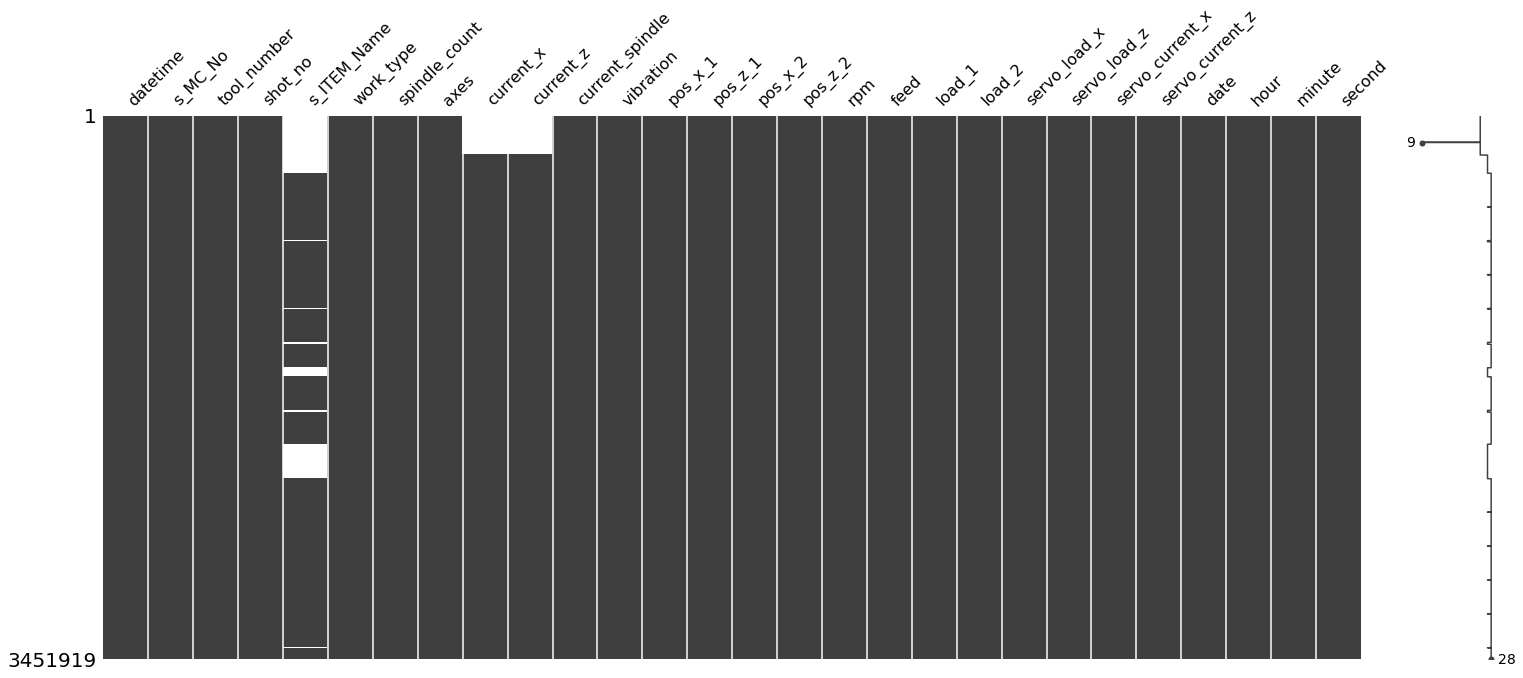

In [12]:
msno.matrix(df_VL04_mod1)

<AxesSubplot:>

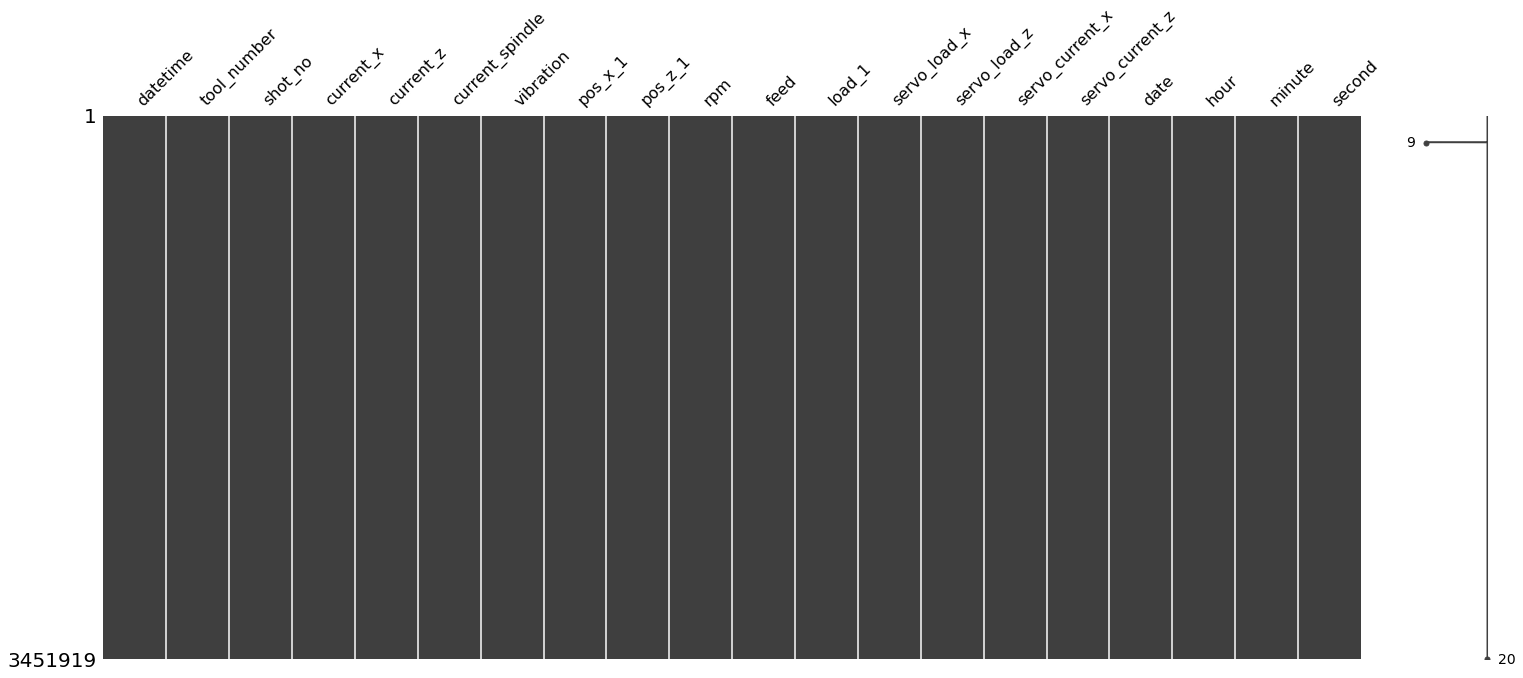

In [13]:
# current_X,Z에 대한 결측치 값, 결측치가 많은 시점에 대한 값 처리
# 필요없는 컬럼 삭제
df_VL04_mod2 = df_VL04_mod1.drop(['s_MC_No', 's_ITEM_Name', 'work_type', 'spindle_count', 'axes', 'pos_x_2', 'pos_z_2', 'load_2'], axis = 1)
df_VL04_mod2['current_x'] = df_VL04_mod2['current_x'].fillna(0)
df_VL04_mod2['current_z'] = df_VL04_mod2['current_z'].fillna(0)
msno.matrix(df_VL04_mod2)

In [14]:
df_VL04_mod2.isnull().sum()

datetime              0
tool_number        1802
shot_no            1596
current_x             0
current_z             0
current_spindle       0
vibration             0
pos_x_1            1465
pos_z_1            1465
rpm                1465
feed               1465
load_1             1999
servo_load_x       1907
servo_load_z       1907
servo_current_x    1907
servo_current_z    1907
date                  0
hour                  0
minute                0
second                0
dtype: int64

In [15]:
len(df_VL04_mod2)

3451919

## shot 5831 데이터 불완전 과감히 삭제!

In [16]:
#수집에 있어서 불완전한 데이터(shot 5831 앞부분)를 삭제
df_VL04_mod3 = df_VL04_mod2[(df_VL04_mod2['shot_no'] > 5831)]

<AxesSubplot:>

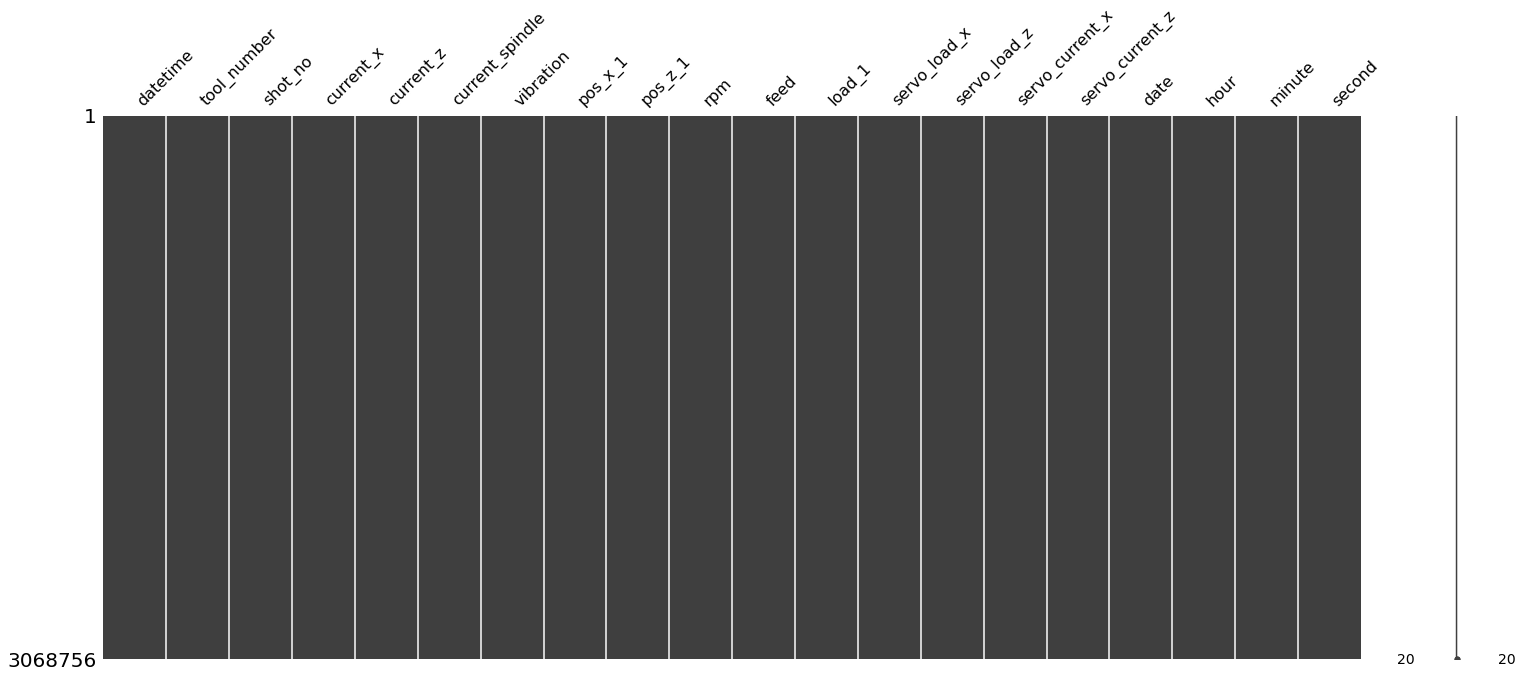

In [17]:
msno.matrix(df_VL04_mod3)

In [18]:
#불완전한 부분을 삭제하니 결측치 문제도 저절로 해결
df_VL04_mod3.isnull().sum()

datetime           0
tool_number        0
shot_no            0
current_x          0
current_z          0
current_spindle    0
vibration          0
pos_x_1            0
pos_z_1            0
rpm                0
feed               0
load_1             0
servo_load_x       0
servo_load_z       0
servo_current_x    0
servo_current_z    0
date               0
hour               0
minute             0
second             0
dtype: int64

In [19]:
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3068756 entries, 1353991 to 1723085
Data columns (total 20 columns):
 #   Column           Dtype         
---  ------           -----         
 0   datetime         datetime64[ns]
 1   tool_number      float64       
 2   shot_no          float64       
 3   current_x        float64       
 4   current_z        float64       
 5   current_spindle  int64         
 6   vibration        int64         
 7   pos_x_1          float64       
 8   pos_z_1          float64       
 9   rpm              float64       
 10  feed             float64       
 11  load_1           float64       
 12  servo_load_x     float64       
 13  servo_load_z     float64       
 14  servo_current_x  float64       
 15  servo_current_z  float64       
 16  date             datetime64[ns]
 17  hour             int64         
 18  minute           int64         
 19  second           int64         
dtypes: datetime64[ns](2), float64(13), int64(5)
memory usage: 491.

In [20]:
# nano second -> second로 변경
# nano second 값 평균값으로 대체
# groupby를 통해 초단위로 변경
# df_VL04_mod3 = df_VL04_mod1.resample('s').mean()
df_VL04_mod3 = df_VL04_mod3.groupby(['date', 'hour', 'minute', 'second', 'tool_number', 'shot_no']).mean()
df_VL04_mod3.reset_index(inplace=True)
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618076 entries, 0 to 618075
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             618076 non-null  datetime64[ns]
 1   hour             618076 non-null  int64         
 2   minute           618076 non-null  int64         
 3   second           618076 non-null  int64         
 4   tool_number      618076 non-null  float64       
 5   shot_no          618076 non-null  float64       
 6   current_x        618076 non-null  float64       
 7   current_z        618076 non-null  float64       
 8   current_spindle  618076 non-null  float64       
 9   vibration        618076 non-null  float64       
 10  pos_x_1          618076 non-null  float64       
 11  pos_z_1          618076 non-null  float64       
 12  rpm              618076 non-null  float64       
 13  feed             618076 non-null  float64       
 14  load_1           618

In [21]:
df_VL04_mod3['date'] = df_VL04_mod3['date'].astype('str')
df_VL04_mod3['hour'] = df_VL04_mod3['hour'].astype('str')
df_VL04_mod3['minute'] = df_VL04_mod3['minute'].astype('str')
df_VL04_mod3['second'] = df_VL04_mod3['second'].astype('str')
df_VL04_mod3['datetime'] = df_VL04_mod3['date'] + ' ' + df_VL04_mod3['hour']+ ':' + df_VL04_mod3['minute'] + ':' + df_VL04_mod3['second']
df_VL04_mod3['datetime'] = pd.to_datetime(df_VL04_mod3['datetime'])

In [22]:
# tool_number 고유값 추출
list(df_VL04_mod3['tool_number'].unique())

[707.0,
 100.0,
 101.0,
 500.0,
 505.0,
 900.0,
 909.0,
 1100.0,
 1111.0,
 700.0,
 300.0,
 303.0,
 399.0,
 599.0,
 199.0,
 999.0,
 799.0,
 1199.0]

In [23]:
df_VL04_mod3.sort_values(['datetime'])

date hour minute second  tool_number  shot_no  current_x  \
0       2022-07-13   20     58     37        707.0   5832.0        0.0   
1       2022-07-13   20     58     38        707.0   5832.0        0.0   
2       2022-07-13   20     58     39        707.0   5832.0        0.0   
3       2022-07-13   20     58     40        707.0   5832.0        0.0   
4       2022-07-13   20     58     41        707.0   5832.0        0.0   
...            ...  ...    ...    ...          ...      ...        ...   
618071  2022-07-20   23     59     55        101.0   5989.0       31.2   
618072  2022-07-20   23     59     56        101.0   5989.0       31.2   
618073  2022-07-20   23     59     57        101.0   5989.0       31.0   
618074  2022-07-20   23     59     58        101.0   5989.0       31.6   
618075  2022-07-20   23     59     59        101.0   5989.0       31.2   

        current_z  current_spindle  vibration   pos_x_1   pos_z_1    rpm  \
0             3.0           1130.5       81.5  672565.0  404547.5    1.0   
1             2.0             52.0       81.6  640000.0  483830.0    0.0   
2             3.2              0.0       82.2  640000.0  483830.0    0.0   
3             3.2              0.0       82.4  640000.0  483830.0    0.0   
4             3.2              0.0       82.6  640000.0  483830.0    0.0   
...           ...              ...        ...       ...       ...    ...   
618071        2.0           2018.8       85.0  528317.4    8250.0  299.6   
618072        2.0           2020.0       85.4  526241.0    8250.0  299.2   
618073        2.0           2019.4       86.8  523333.6    8250.0  299.4   
618074        2.0           2019.8       85.6  520937.6    8250.0  299.2   
618075        2.0           2019.0       85.0  518301.6    8250.0  299.2   

        feed  load_1  servo_load_x  servo_load_z  servo_current_x  \
0        0.0     0.0           4.0          73.0              4.0   
1        0.0     0.0           4.0          73.0              4.0   
2        0.0     0.0           4.0          73.0              4.0   
3        0.0     0.0           4.0          73.0              4.0   
4        0.0     0.0           4.0          73.0              4.0   
...      ...     ...           ...           ...              ...   
618071  75.0     0.4           9.6          60.0             -9.6   
618072  75.0     0.8          10.0          60.0            -10.0   
618073  75.0     0.8          10.0          60.6            -10.0   
618074  75.0     0.6          10.0          61.0            -10.0   
618075  75.0     0.6           9.6          60.6             -9.6   

        servo_current_z            datetime  
0                 -73.0 2022-07-13 20:58:37  
1                 -73.0 2022-07-13 20:58:38  
2                 -73.0 2022-07-13 20:58:39  
3                 -73.0 2022-07-13 20:58:40  
4                 -73.0 2022-07-13 20:58:41  
...                 ...                 ...  
618071            -60.0 2022-07-20 23:59:55  
618072            -60.0 2022-07-20 23:59:56  
618073            -60.6 2022-07-20 23:59:57  
618074            -61.0 2022-07-20 23:59:58  
618075            -60.6 2022-07-20 23:59:59  

[618076 rows x 20 columns]

In [24]:
# tool 번호 및 상태 생성
#데이터가 변함에 따라 tool_number_list가 조정되므로 유의해야함(매칭시)
tool_number_list = list(df_VL04_mod3['tool_number'].unique())
tool_list = [7, 1,1,5,5,9,9,11,11,7,3,3,3,5,1,9,7,11]
tool_state = ['가공', '취소', '가공', '취소','가공', '취소', '가공', '취소', '가공', '취소',  '취소', '가공', '종료', '종료', '종료', '종료', '종료', '종료']
df_VL04_mod3['tool'] = df_VL04_mod3['tool_number'].replace(tool_number_list, tool_list)
df_VL04_mod3['tool'] = df_VL04_mod3['tool'].astype('int64')
df_VL04_mod3['tool_state'] = df_VL04_mod3['tool_number'].replace(tool_number_list, tool_state)
df_VL04_mod3['datetime'] = pd.to_datetime(df_VL04_mod3['datetime'])
df_VL04_mod3 = df_VL04_mod3.sort_values(['datetime'])
df_VL04_mod3 = df_VL04_mod3.set_index('datetime')
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 618076 entries, 2022-07-13 20:58:37 to 2022-07-20 23:59:59
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             618076 non-null  object 
 1   hour             618076 non-null  object 
 2   minute           618076 non-null  object 
 3   second           618076 non-null  object 
 4   tool_number      618076 non-null  float64
 5   shot_no          618076 non-null  float64
 6   current_x        618076 non-null  float64
 7   current_z        618076 non-null  float64
 8   current_spindle  618076 non-null  float64
 9   vibration        618076 non-null  float64
 10  pos_x_1          618076 non-null  float64
 11  pos_z_1          618076 non-null  float64
 12  rpm              618076 non-null  float64
 13  feed             618076 non-null  float64
 14  load_1           618076 non-null  float64
 15  servo_load_x     618076 non-null  float64
 16  serv

In [25]:
df_VL04_mod3

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-13 20:58:37  2022-07-13   20     58     37        707.0   5832.0   
2022-07-13 20:58:38  2022-07-13   20     58     38        707.0   5832.0   
2022-07-13 20:58:39  2022-07-13   20     58     39        707.0   5832.0   
2022-07-13 20:58:40  2022-07-13   20     58     40        707.0   5832.0   
2022-07-13 20:58:41  2022-07-13   20     58     41        707.0   5832.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 23:59:55  2022-07-20   23     59     55        101.0   5989.0   
2022-07-20 23:59:56  2022-07-20   23     59     56        101.0   5989.0   
2022-07-20 23:59:57  2022-07-20   23     59     57        101.0   5989.0   
2022-07-20 23:59:58  2022-07-20   23     59     58        101.0   5989.0   
2022-07-20 23:59:59  2022-07-20   23     59     59        101.0   5989.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-13 20:58:37        0.0        3.0           1130.5       81.5   
2022-07-13 20:58:38        0.0        2.0             52.0       81.6   
2022-07-13 20:58:39        0.0        3.2              0.0       82.2   
2022-07-13 20:58:40        0.0        3.2              0.0       82.4   
2022-07-13 20:58:41        0.0        3.2              0.0       82.6   
...                        ...        ...              ...        ...   
2022-07-20 23:59:55       31.2        2.0           2018.8       85.0   
2022-07-20 23:59:56       31.2        2.0           2020.0       85.4   
2022-07-20 23:59:57       31.0        2.0           2019.4       86.8   
2022-07-20 23:59:58       31.6        2.0           2019.8       85.6   
2022-07-20 23:59:59       31.2        2.0           2019.0       85.0   

                      pos_x_1   pos_z_1    rpm  feed  load_1  servo_load_x  \
datetime                                                                     
2022-07-13 20:58:37  672565.0  404547.5    1.0   0.0     0.0           4.0   
2022-07-13 20:58:38  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-13 20:58:39  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-13 20:58:40  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-13 20:58:41  640000.0  483830.0    0.0   0.0     0.0           4.0   
...                       ...       ...    ...   ...     ...           ...   
2022-07-20 23:59:55  528317.4    8250.0  299.6  75.0     0.4           9.6   
2022-07-20 23:59:56  526241.0    8250.0  299.2  75.0     0.8          10.0   
2022-07-20 23:59:57  523333.6    8250.0  299.4  75.0     0.8          10.0   
2022-07-20 23:59:58  520937.6    8250.0  299.2  75.0     0.6          10.0   
2022-07-20 23:59:59  518301.6    8250.0  299.2  75.0     0.6           9.6   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-13 20:58:37          73.0              4.0            -73.0     7   
2022-07-13 20:58:38          73.0              4.0            -73.0     7   
2022-07-13 20:58:39          73.0              4.0            -73.0     7   
2022-07-13 20:58:40          73.0              4.0            -73.0     7   
2022-07-13 20:58:41          73.0              4.0            -73.0     7   
...                           ...              ...              ...   ...   
2022-07-20 23:59:55          60.0             -9.6            -60.0     1   
2022-07-20 23:59:56          60.0            -10.0            -60.0     1   
2022-07-20 23:59:57          60.6            -10.0            -60.6     1   
2022-07-20 23:59:58          61.0            -10.0            -61.0     1   
2022-07-20 23:59:59          60.6             -9.6            -60.6     1   

                    tool_state  
datetime                        
2022-

In [26]:
#shot5989는 20일 넘어가면서 잘림, 과감히 삭제
df_VL04_mod4 = df_VL04_mod3[(df_VL04_mod3['shot_no']==5989)==False]

In [27]:
df_VL04_mod4

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-13 20:58:37  2022-07-13   20     58     37        707.0   5832.0   
2022-07-13 20:58:38  2022-07-13   20     58     38        707.0   5832.0   
2022-07-13 20:58:39  2022-07-13   20     58     39        707.0   5832.0   
2022-07-13 20:58:40  2022-07-13   20     58     40        707.0   5832.0   
2022-07-13 20:58:41  2022-07-13   20     58     41        707.0   5832.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 23:56:54  2022-07-20   23     56     54        707.0   5988.0   
2022-07-20 23:56:55  2022-07-20   23     56     55        707.0   5988.0   
2022-07-20 23:56:56  2022-07-20   23     56     56        707.0   5988.0   
2022-07-20 23:56:57  2022-07-20   23     56     57        707.0   5988.0   
2022-07-20 23:56:58  2022-07-20   23     56     58        707.0   5988.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-13 20:58:37        0.0        3.0           1130.5  81.500000   
2022-07-13 20:58:38        0.0        2.0             52.0  81.600000   
2022-07-13 20:58:39        0.0        3.2              0.0  82.200000   
2022-07-13 20:58:40        0.0        3.2              0.0  82.400000   
2022-07-13 20:58:41        0.0        3.2              0.0  82.600000   
...                        ...        ...              ...        ...   
2022-07-20 23:56:54        0.0        3.6           2013.0  84.800000   
2022-07-20 23:56:55        0.0        2.4           2013.0  84.600000   
2022-07-20 23:56:56        0.0        2.8           2013.0  85.200000   
2022-07-20 23:56:57        4.2        8.0           5416.8  85.200000   
2022-07-20 23:56:58        6.0       10.0           5741.0  85.666667   

                      pos_x_1   pos_z_1    rpm  feed     load_1  servo_load_x  \
datetime                                                                        
2022-07-13 20:58:37  672565.0  404547.5    1.0   0.0   0.000000           4.0   
2022-07-13 20:58:38  640000.0  483830.0    0.0   0.0   0.000000           4.0   
2022-07-13 20:58:39  640000.0  483830.0    0.0   0.0   0.000000           4.0   
2022-07-13 20:58:40  640000.0  483830.0    0.0   0.0   0.000000           4.0   
2022-07-13 20:58:41  640000.0  483830.0    0.0   0.0   0.000000           4.0   
...                       ...       ...    ...   ...        ...           ...   
2022-07-20 23:56:54  683420.0  378120.0  299.8   0.0   0.000000           3.2   
2022-07-20 23:56:55  683420.0  378120.0  299.4   0.0   0.000000           3.6   
2022-07-20 23:56:56  683420.0  378120.0  299.2   0.0   0.000000           3.2   
2022-07-20 23:56:57  683420.0  378120.0  255.8   0.0  86.000000           3.4   
2022-07-20 23:56:58  683420.0  378120.0   39.0   0.0  40.666667           3.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-13 20:58:37          73.0              4.0            -73.0     7   
2022-07-13 20:58:38          73.0              4.0            -73.0     7   
2022-07-13 20:58:39          73.0              4.0            -73.0     7   
2022-07-13 20:58:40          73.0              4.0            -73.0     7   
2022-07-13 20:58:41          73.0              4.0            -73.0     7   
...                           ...              ...              ...   ...   
2022-07-20 23:56:54          72.4              3.2            -72.4     7   
2022-07-20 23:56:55          72.8              3.6            -72.8     7   
2022-07-20 23:56:56          73.0              3.2            -73.0     7   
2022-07-20 23:56:57          73.2              3.4            -73.2     7   
2022-07-20 23:56:58          72.0              3.0            -72.0     7   

                    tool_state  

### 이번 분석에서 사용할 데이터는 shot기준 5832(7월 13일 20시 58분 37초부터) 5988(7월 20일 23시 56분 58초)까지

In [28]:
period = pd.Timestamp('2022-07-20 23:56:58') - pd.Timestamp('2022-07-13 20:58:37') 
period_sec = period.total_seconds()

In [29]:
period

Timedelta('7 days 02:58:21')

In [30]:
period_sec

615501.0

## index 겹침 현상 발생 - 딱히 어떤 처리는 하지 않음

7일하고 두시간 58분 21초에 해당하는 데이터를 초단위로 수집
초단위 인덱스가 모두 존재하는지 파악이 필요함
해당 기간을 초단위로 환산할 경우 615501초이며, 위의 인덱스 값을 확인하였을때 617892로
약 2391개의 인덱스가 더 존재함 -> 한 시점에 두개 이상의 데이터를 갖는 값이 존재

In [31]:
#겹치는 인덱스 파악
df_VL04_mod4[((df_VL04_mod4.index).duplicated(keep=False))==True]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-13 21:01:50  2022-07-13   21      1     50        100.0   5832.0   
2022-07-13 21:01:50  2022-07-13   21      1     50        707.0   5832.0   
2022-07-13 21:01:52  2022-07-13   21      1     52        100.0   5832.0   
2022-07-13 21:01:52  2022-07-13   21      1     52        101.0   5832.0   
2022-07-13 21:13:02  2022-07-13   21     13      2        101.0   5832.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 23:48:57  2022-07-20   23     48     57       1111.0   5988.0   
2022-07-20 23:54:33  2022-07-20   23     54     33       1111.0   5988.0   
2022-07-20 23:54:33  2022-07-20   23     54     33        700.0   5988.0   
2022-07-20 23:54:35  2022-07-20   23     54     35        700.0   5988.0   
2022-07-20 23:54:35  2022-07-20   23     54     35        707.0   5988.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-13 21:01:50        0.0        2.0         0.000000  83.500000   
2022-07-13 21:01:50        0.0        2.0         0.000000  84.000000   
2022-07-13 21:01:52        0.0        4.0         0.000000  83.000000   
2022-07-13 21:01:52        0.0        2.0       177.000000  85.500000   
2022-07-13 21:13:02        0.0     1009.5      2015.500000  86.000000   
...                        ...        ...              ...        ...   
2022-07-20 23:48:57        4.5        4.0       744.000000  90.000000   
2022-07-20 23:54:33        4.0        9.0      4388.000000  86.000000   
2022-07-20 23:54:33        0.0        2.0       344.333333  87.000000   
2022-07-20 23:54:35        0.0        3.0         0.000000  87.000000   
2022-07-20 23:54:35        0.0        4.0      1050.000000  87.333333   

                      pos_x_1   pos_z_1    rpm  feed  load_1  servo_load_x  \
datetime                                                                     
2022-07-13 21:01:50  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-13 21:01:50  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-13 21:01:52  640000.0  483830.0    0.0   0.0     0.0           3.0   
2022-07-13 21:01:52  665807.0  483429.0    1.0   0.0   138.0           3.0   
2022-07-13 21:13:02  665807.0  483429.0  299.0   0.0     0.5           4.0   
...                       ...       ...    ...   ...     ...           ...   
2022-07-20 23:48:57  605880.0  391160.0    0.0   0.0   128.0           4.0   
2022-07-20 23:54:33  605880.0  391160.0   11.0   0.0     0.0           3.0   
2022-07-20 23:54:33  640000.0  483830.0    0.0   0.0     0.0           3.0   
2022-07-20 23:54:35  640000.0  483830.0    0.0   0.0     0.0           3.0   
2022-07-20 23:54:35  683420.0  378120.0   21.0   0.0   142.0           3.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-13 21:01:50     72.000000              4.0       -72.000000     1   
2022-07-13 21:01:50     72.000000              4.0       -72.000000     7   
2022-07-13 21:01:52     72.000000              3.0       -72.000000     1   
2022-07-13 21:01:52     72.000000              3.0       -72.000000     1   
2022-07-13 21:13:02     77.000000              4.0       -77.000000     1   
...                           ...              ...              ...   ...   
2022-07-20 23:48:57     73.000000              4.0       -73.000000    11   
2022-07-20 23:54:33     73.000000             -3.0       -73.000000    11   
2022-07-20 23:54:33     72.333333             -3.0       -72.333333     7   
2022-07-20 23:54:35     72.500000             -3.0       -72.500000     7   
2022-07-20 23:54:35     72.000000             -3.0       -72.000000     7   

                    tool_state  
datetime                        
2022-

[ 7  1  5  9 11  3]


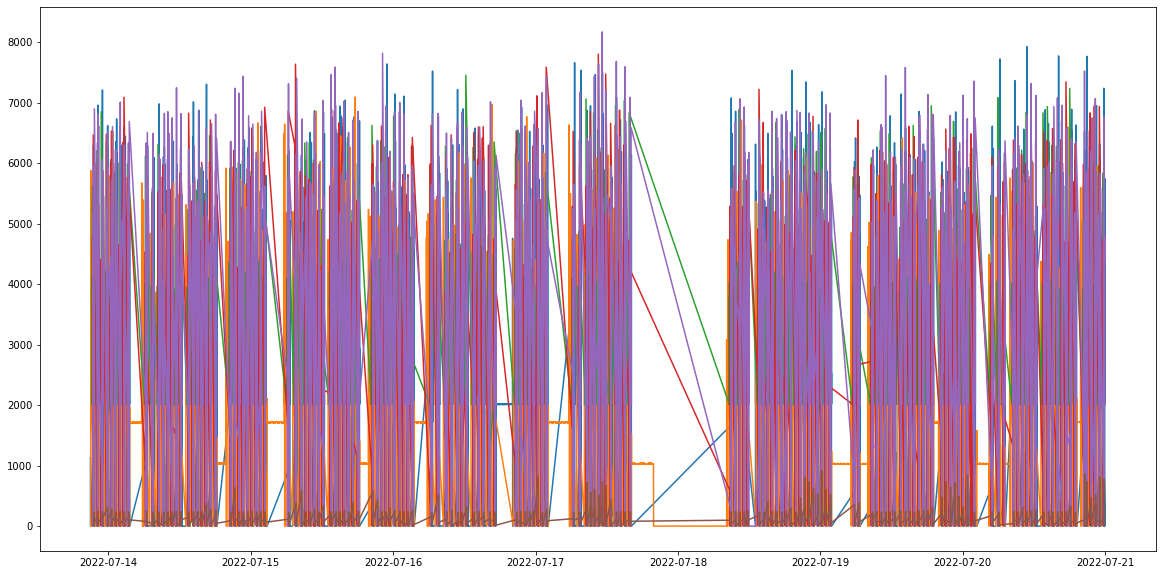

In [32]:
# Tool별 분리
print(df_VL04_mod4['tool'].unique())

for tool_idx in list(df_VL04_mod3['tool'].unique()):
    globals()['df_VL04_Tool{}'.format(tool_idx)] = df_VL04_mod4[df_VL04_mod4['tool'] == tool_idx]

plt.figure(figsize = (20, 10))
plt.plot(df_VL04_Tool7['current_spindle'])
plt.plot(df_VL04_Tool1['current_spindle'])
plt.plot(df_VL04_Tool5['current_spindle'])
plt.plot(df_VL04_Tool9['current_spindle'])
plt.plot(df_VL04_Tool11['current_spindle'])
plt.plot(df_VL04_Tool3['current_spindle'])

In [33]:
len(df_VL04_mod4['shot_no'].unique())
#shot 개수는 157개

157

In [34]:
list_date = df_VL04_mod4['date'].unique()
sum_quantity = []
total_date = []
for date_idx in list_date:
    globals()['date_{}'.format(date_idx)] = len(df_VL04_mod4[df_VL04_mod4['date'] == date_idx]['shot_no'].unique())
    sum_quantity.append(globals()['date_{}'.format(date_idx)])
    total_date.append(date_idx)
    print('{} 일자의 생산개수(shot기준)는 {}입니다.'.format(date_idx, globals()['date_{}'.format(date_idx)]))
print('총 shot 개수는 {}입니다.'.format(len((df_VL04_mod4['shot_no'].unique()))))
print('합을 구하면 164개인데 157개 나오는 이유는 날짜를 넘기면서 shot이 이어지는 경우가 있기 때문')

2022-07-13 일자의 생산개수(shot기준)는 4입니다.
2022-07-14 일자의 생산개수(shot기준)는 26입니다.
2022-07-15 일자의 생산개수(shot기준)는 25입니다.
2022-07-16 일자의 생산개수(shot기준)는 23입니다.
2022-07-17 일자의 생산개수(shot기준)는 18입니다.
2022-07-18 일자의 생산개수(shot기준)는 19입니다.
2022-07-19 일자의 생산개수(shot기준)는 24입니다.
2022-07-20 일자의 생산개수(shot기준)는 25입니다.
총 shot 개수는 157입니다.
합을 구하면 164개인데 157개 나오는 이유는 날짜를 넘기면서 shot이 이어지는 경우가 있기 때문


In [35]:
(df_VL04_mod4['date'].unique())

array(['2022-07-13', '2022-07-14', '2022-07-15', '2022-07-16',
       '2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20'],
      dtype=object)

# 해당기간내 Tool5 교체 이력 정보(주어진 정보)
1. 2022-07-18 10:56
2. 2022-07-20 05:55

## Tool5 시각화

In [36]:
import seaborn as sns

<AxesSubplot:>

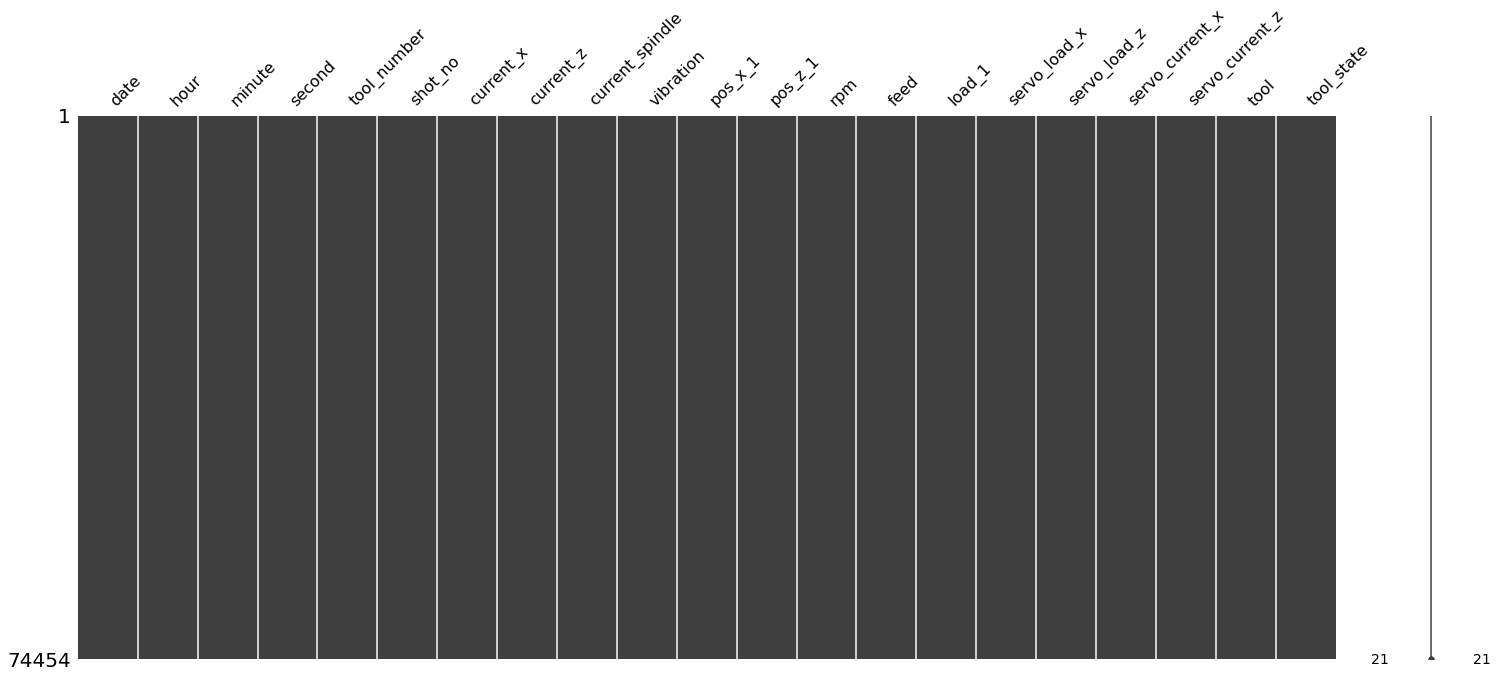

In [37]:
msno.matrix(df_VL04_Tool5)

In [38]:
df_VL04_Tool5.head()

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-13 21:13:02  2022-07-13   21     13      2        500.0   5832.0   
2022-07-13 21:13:03  2022-07-13   21     13      3        500.0   5832.0   
2022-07-13 21:13:04  2022-07-13   21     13      4        500.0   5832.0   
2022-07-13 21:13:05  2022-07-13   21     13      5        505.0   5832.0   
2022-07-13 21:13:06  2022-07-13   21     13      6        505.0   5832.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-13 21:13:02        0.0     371.00      2015.666667  86.333333   
2022-07-13 21:13:03        0.0       8.00      2016.800000  86.600000   
2022-07-13 21:13:04        4.0       4.80      2016.000000  89.800000   
2022-07-13 21:13:05      354.2     473.80      2019.000000  90.400000   
2022-07-13 21:13:06      363.5    1026.75      2019.000000  86.500000   

                           pos_x_1        pos_z_1    rpm    feed    load_1  \
datetime                                                                     
2022-07-13 21:13:02  657204.666667  483562.666667  300.0     0.0  0.333333   
2022-07-13 21:13:03  640000.000000  483830.000000  299.0  4800.0  0.200000   
2022-07-13 21:13:04  640000.000000  483830.000000  299.8  4114.4  0.200000   
2022-07-13 21:13:05  623273.200000  368489.800000  299.4  6263.0  1.000000   
2022-07-13 21:13:06  460873.250000  287289.750000  299.0  7071.0  0.750000   

                     servo_load_x  servo_load_z  servo_current_x  \
datetime                                                           
2022-07-13 21:13:02           4.0     74.666667              4.0   
2022-07-13 21:13:03           4.0     74.000000              4.0   
2022-07-13 21:13:04           5.2     73.600000              5.2   
2022-07-13 21:13:05          21.6     53.000000            -21.6   
2022-07-13 21:13:06          19.5     55.750000            -19.5   

                     servo_current_z  tool tool_state  
datetime                                               
2022-07-13 21:13:02       -74.666667     5         취소  
2022-07-13 21:13:03       -74.000000     5         취소  
2022-07-13 21:13:04       -73.600000     5         취소  
2022-07-13 21:13:05       -53.000000     5         가공  
2022-07-13 21:13:06       -55.750000     5         가공

In [39]:
shot_unique = df_VL04_mod4['shot_no'].unique()

## 모든 shot에 대해 plot을 찍어서 패턴을 일단 파악(미시적인 관점의 접근)

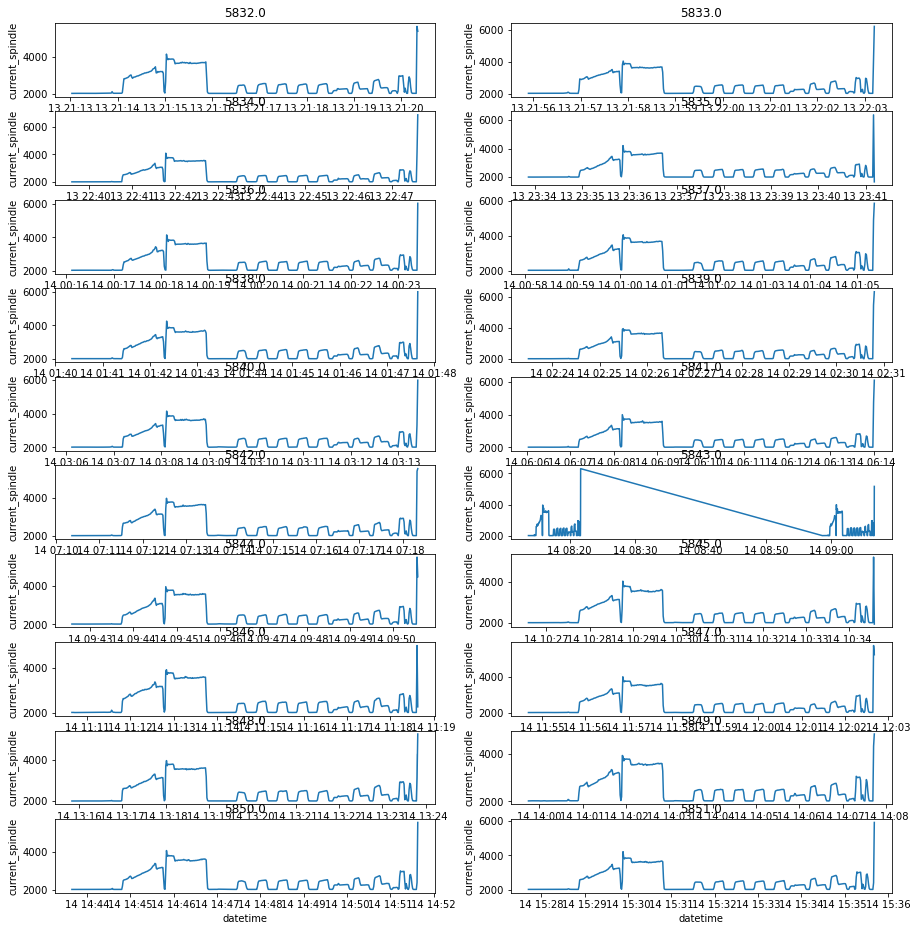

In [40]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

<AxesSubplot:xlabel='datetime', ylabel='current_spindle'>

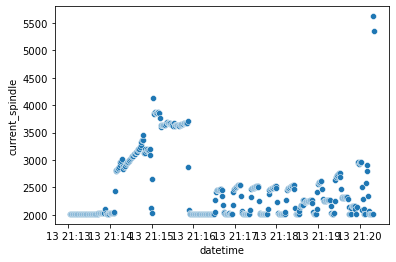

In [41]:
sns.scatterplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == 5832])['current_spindle'])
#일반적인 형태 - 스캐터플랏 기준

<AxesSubplot:xlabel='datetime', ylabel='current_spindle'>

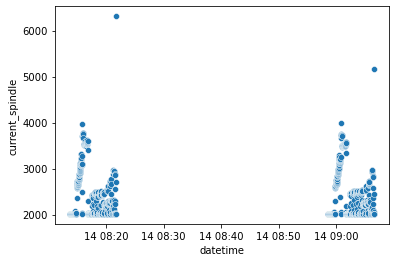

In [42]:
sns.scatterplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == 5843])['current_spindle'])
#예외적인 형태 - 스캐터플랏 기준

shot 5843 형태는 한 shot에서 두번의 전류값이 발생한 것으로 판단

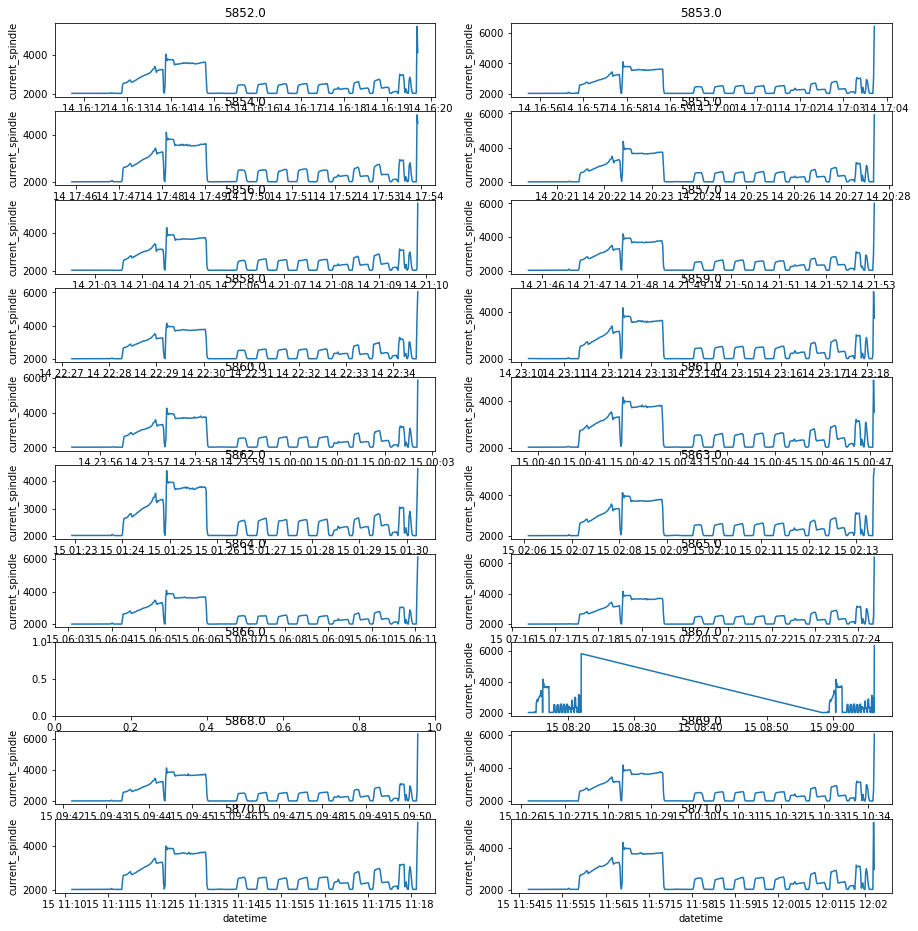

In [43]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +20
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

shot 5866은 전류값이 공백, 반면 다음 shot인 5867에는 두개의 분포가 찍힌 것을 발견\
단순 기계 결함 혹은 오류인가?

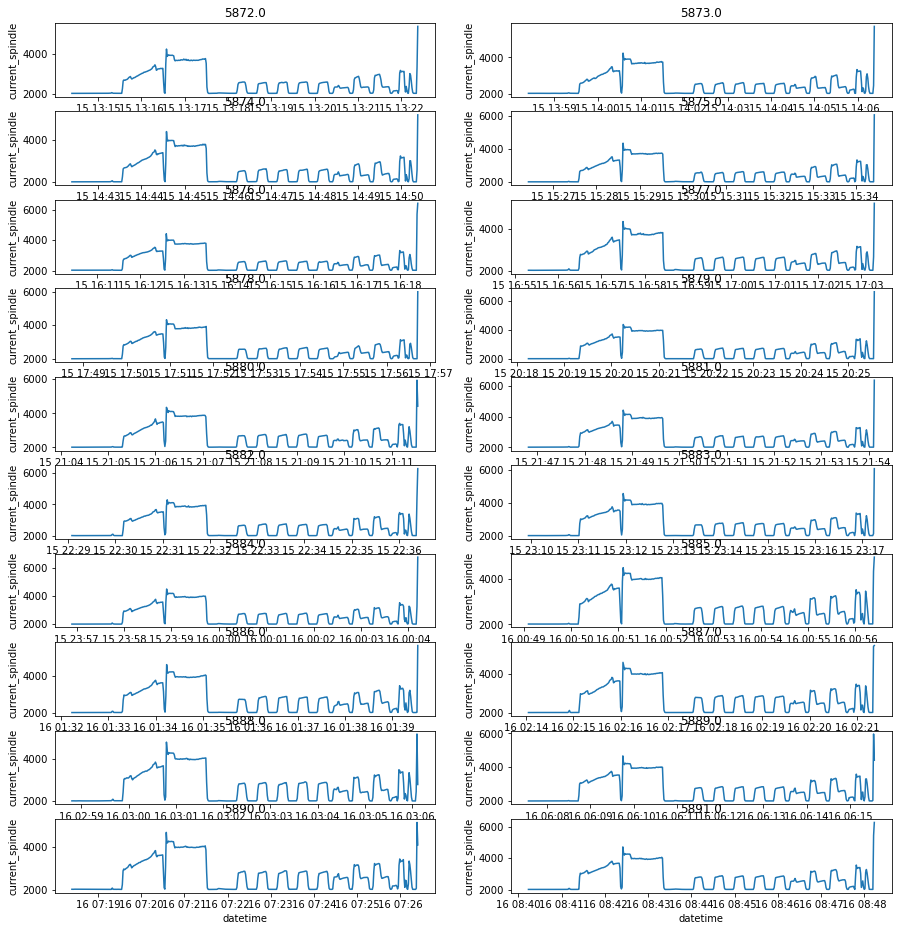

In [44]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +40
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

이번에는 모두 일반적인 형태의 분포를 가짐

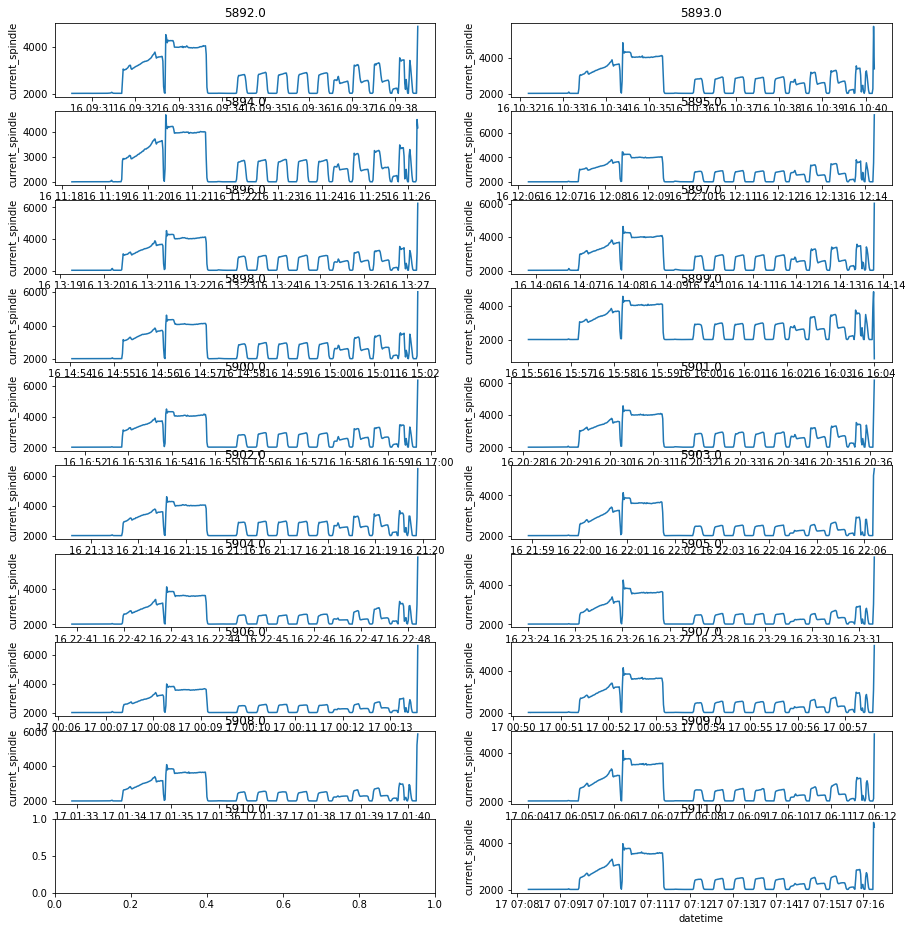

In [45]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +60
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

shot 5910 공백 발생외 특이점 발견X

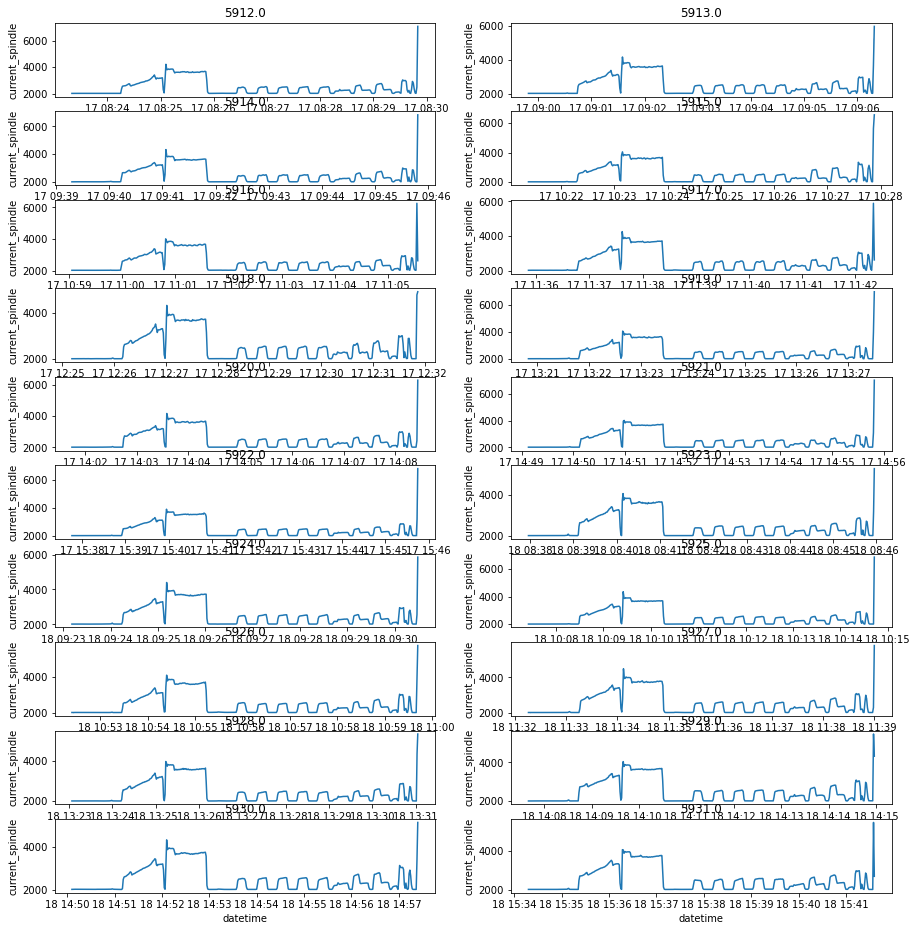

In [46]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +80
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

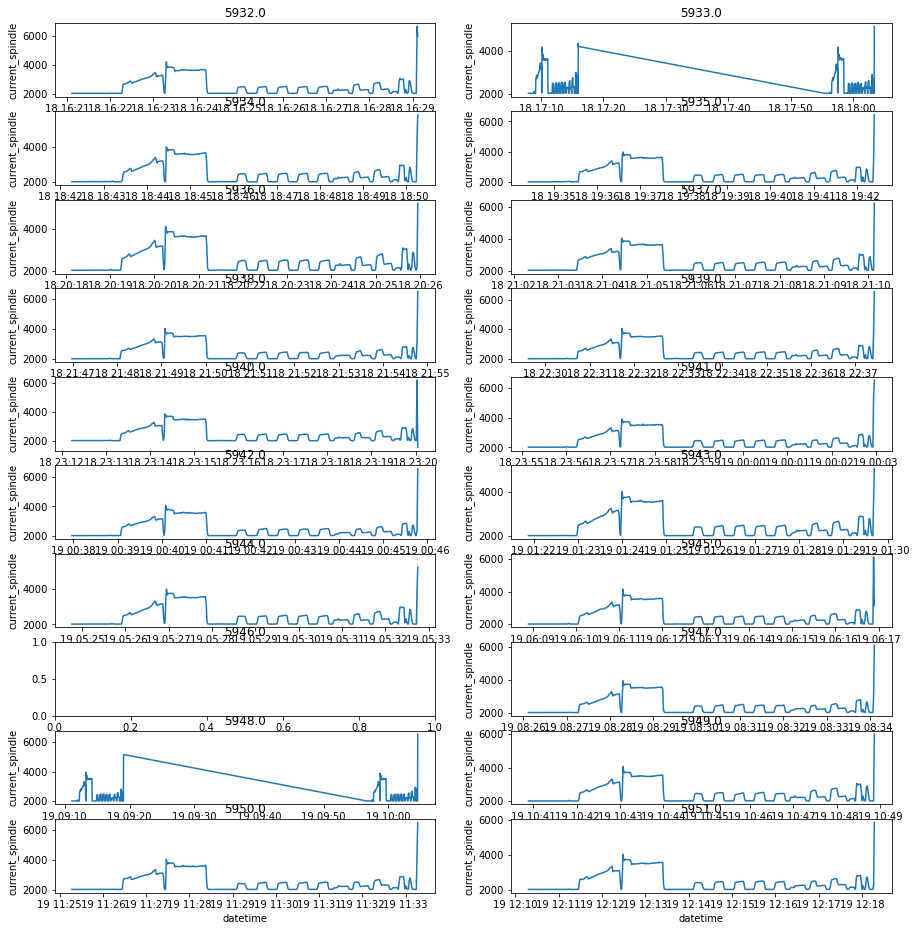

In [47]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +100
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

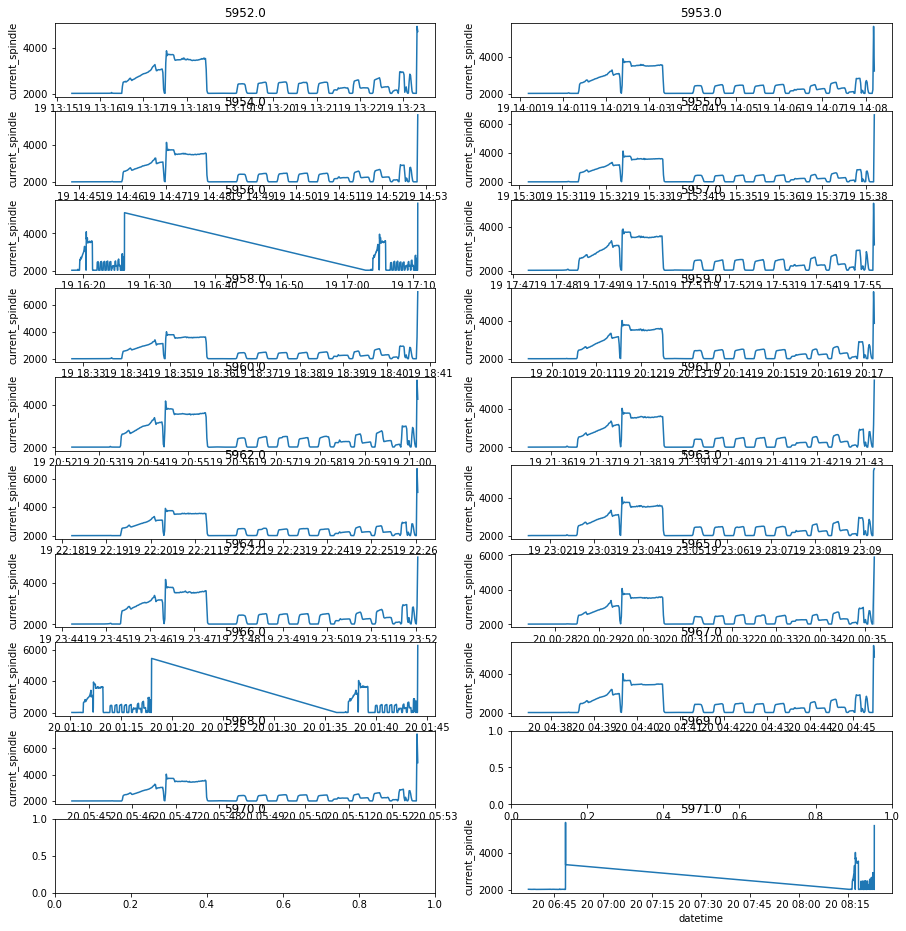

In [48]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +120
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

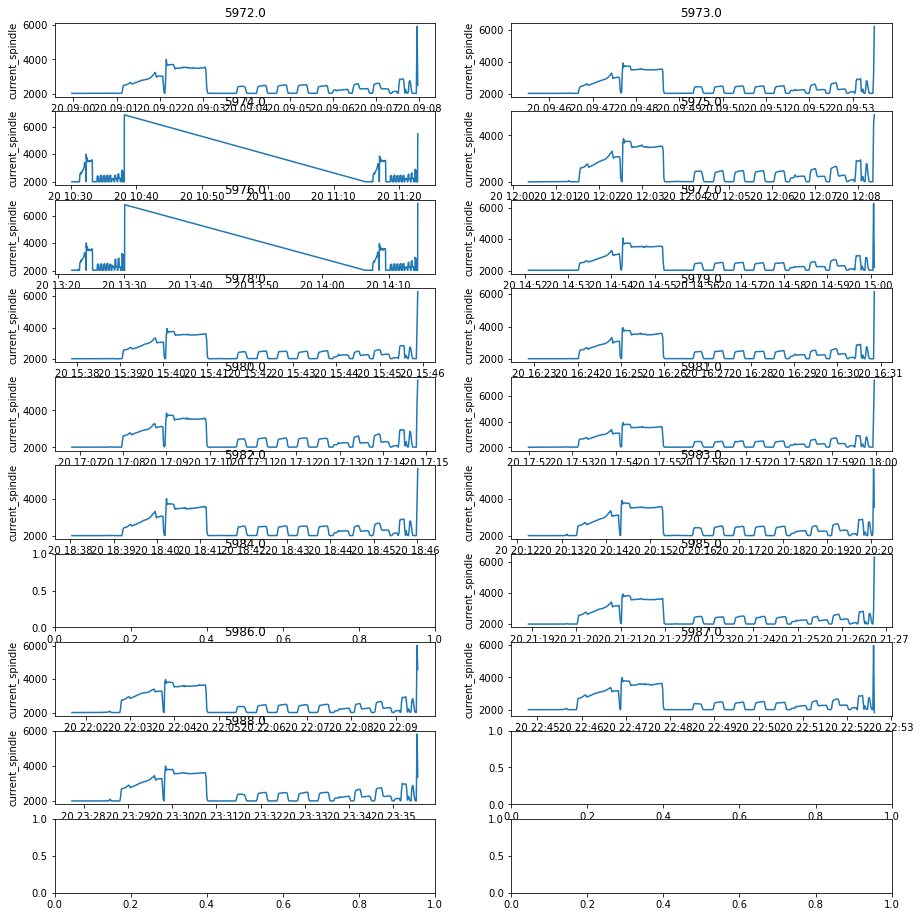

In [49]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +140
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

## tool5 current_spindle 값 분포 형태 정리
1. 일반적인 형태 : 가장 많이 나오는 형태로 상승과 하강을 두번 반복하고 자잘한 추이를 보이다가 마지막에 튀는 형태\
2. 두번 반복 형태 : 한 shot에서 두번의 일반적인 형태를 반복(오류라고 볼 수 있을지?)\
3. 공백 : 전류값이 들어가지 않음, 2번 형태와의 상관성 여부 판단\
4. 값의 이상치 : y의 분포가 모두 2000~6000사이를 가짐, 특이점 발견X

# 1차 교체지점 탐색(07-18 10:56)

<AxesSubplot:xlabel='datetime'>

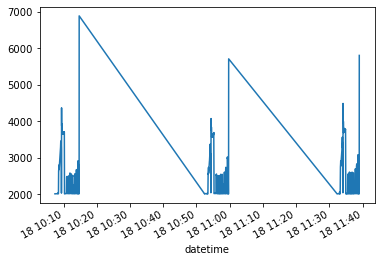

In [50]:
df_VL04_Tool5[(df_VL04_Tool5['date'] == '2022-07-18') & ((df_VL04_Tool5['hour'] == '10') | (df_VL04_Tool5['hour'] == '11'))]['current_spindle'].plot()

In [51]:
df_VL04_Tool5.loc['2022-07-18 10:40:10':'2022-07-18 10:59:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-18 10:52:24  2022-07-18   10     52     24        500.0   5926.0   
2022-07-18 10:52:25  2022-07-18   10     52     25        500.0   5926.0   
2022-07-18 10:52:26  2022-07-18   10     52     26        500.0   5926.0   
2022-07-18 10:52:26  2022-07-18   10     52     26        505.0   5926.0   
2022-07-18 10:52:27  2022-07-18   10     52     27        505.0   5926.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-18 10:59:00  2022-07-18   10     59      0        505.0   5926.0   
2022-07-18 10:59:01  2022-07-18   10     59      1        505.0   5926.0   
2022-07-18 10:59:02  2022-07-18   10     59      2        505.0   5926.0   
2022-07-18 10:59:03  2022-07-18   10     59      3        505.0   5926.0   
2022-07-18 10:59:04  2022-07-18   10     59      4        505.0   5926.0   

                      current_x  current_z  current_spindle  vibration  \
datetime                                                                 
2022-07-18 10:52:24    0.000000      101.8      2019.200000  81.200000   
2022-07-18 10:52:25    2.000000        6.0      2017.600000  81.200000   
2022-07-18 10:52:26    4.000000        5.0      2017.000000  82.500000   
2022-07-18 10:52:26  172.666667      286.0      2018.666667  91.666667   
2022-07-18 10:52:27  421.400000      991.6      2022.200000  81.600000   
...                         ...        ...              ...        ...   
2022-07-18 10:59:00   34.000000        4.0      2320.000000  86.800000   
2022-07-18 10:59:01   34.000000        4.0      2326.600000  86.800000   
2022-07-18 10:59:02   33.000000        4.0      2325.600000  86.600000   
2022-07-18 10:59:03   32.600000        4.0      2328.000000  86.400000   
2022-07-18 10:59:04   31.800000        4.0      2328.200000  86.600000   

                           pos_x_1   pos_z_1         rpm    feed    load_1  \
datetime                                                                     
2022-07-18 10:52:24  650322.800000  483669.6  299.600000     0.0  0.800000   
2022-07-18 10:52:25  640000.000000  483830.0  299.000000  5828.6  0.400000   
2022-07-18 10:52:26  640000.000000  483830.0  299.000000     0.0  1.000000   
2022-07-18 10:52:26  665762.333333  389734.0  299.666667  2357.0  0.333333   
2022-07-18 10:52:27  535273.600000  324489.4  299.400000  7071.0  0.200000   
...                            ...       ...         ...     ...       ...   
2022-07-18 10:59:00  174466.200000   -7600.0  299.000000    66.0  5.000000   
2022-07-18 10:59:01  176447.800000   -7600.0  299.000000    66.0  5.000000   
2022-07-18 10:59:02  178851.000000   -7600.0  299.000000    66.0  5.000000   
2022-07-18 10:59:03  181198.400000   -7600.0  299.200000    66.0  5.000000   
2022-07-18 10:59:04  183320.400000   -7600.0  299.200000    66.0  4.800000   

                     servo_load_x  servo_load_z  servo_current_x  \
datetime                                                           
2022-07-18 10:52:24           4.4     74.600000              4.4   
2022-07-18 10:52:25           4.4     74.000000              4.4   
2022-07-18 10:52:26           6.0     73.500000              6.0   
2022-07-18 10:52:26          26.0     42.666667            -26.0   
2022-07-18 10:52:27          19.4     56.000000            -19.4   
...                           ...           ...              ...   
2022-07-18 10:59:00          13.0     59.800000             13.0   
2022-07-18 10:59:01          13.0     60.000000             13.0   
2022-07-18 10:59:02          13.0     60.000000             13.0   
2022-07-18 10:59:03          12.8     60.000000             12.8   
2022-07-18 10:59:04          12.8     59.600000             12.8   

                     servo_current_z  tool tool_state  
datetime                                               
2022-07-18 10:52:24       -74.600000     5         취소  
2022-07

위의 그래프상 가운데 shot이 5926인것을 확인할 수 있음\
팁의 교체시점은 shot5926 전후인것으로 예측 가능

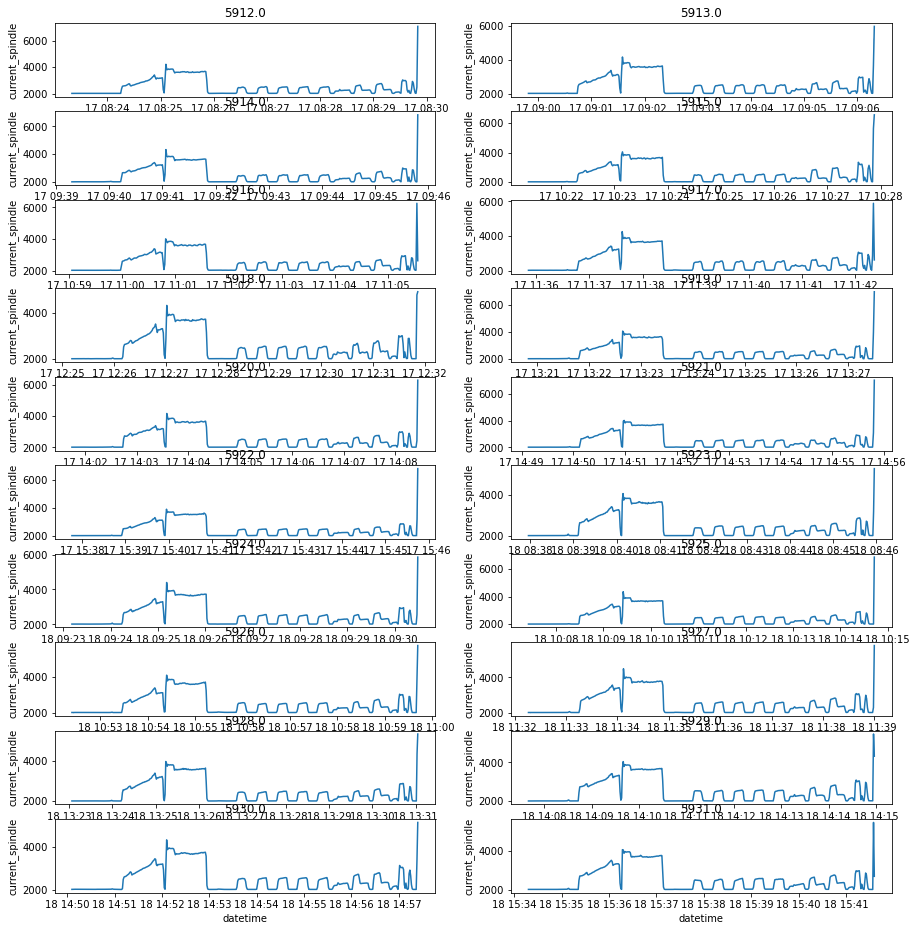

In [52]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col +80
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['current_spindle'],ax=ax)
            ax.set_title(shot)

shot 5925를 기준으로 current_spindle 값의 변화를 봤을 때 특이사항 발견X - 제공된 정보가 과연 참인가?

# 2차 교체지점 탐색(07-20 5:55)

<AxesSubplot:xlabel='datetime'>

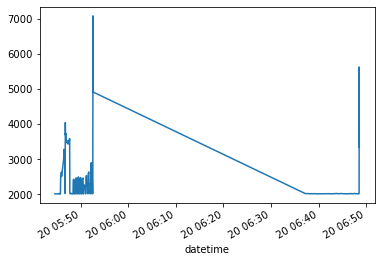

In [53]:
df_VL04_Tool5[(df_VL04_Tool5['date'] == '2022-07-20') & ((df_VL04_Tool5['hour'] == '5') | (df_VL04_Tool5['hour'] == '6'))]['current_spindle'].plot()

In [54]:
df_VL04_Tool5.loc['2022-07-20 05:50:10':'2022-07-20 05:58:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-20 05:50:10  2022-07-20    5     50     10        505.0   5968.0   
2022-07-20 05:50:11  2022-07-20    5     50     11        505.0   5968.0   
2022-07-20 05:50:12  2022-07-20    5     50     12        505.0   5968.0   
2022-07-20 05:50:13  2022-07-20    5     50     13        505.0   5968.0   
2022-07-20 05:50:14  2022-07-20    5     50     14        505.0   5968.0   
2022-07-20 05:50:15  2022-07-20    5     50     15        505.0   5968.0   
2022-07-20 05:50:16  2022-07-20    5     50     16        505.0   5968.0   
2022-07-20 05:50:17  2022-07-20    5     50     17        505.0   5968.0   
2022-07-20 05:50:18  2022-07-20    5     50     18        505.0   5968.0   
2022-07-20 05:50:19  2022-07-20    5     50     19        505.0   5968.0   
2022-07-20 05:50:20  2022-07-20    5     50     20        505.0   5968.0   
2022-07-20 05:50:21  2022-07-20    5     50     21        505.0   5968.0   
2022-07-20 05:50:22  2022-07-20    5     50     22        505.0   5968.0   
2022-07-20 05:50:23  2022-07-20    5     50     23        505.0   5968.0   
2022-07-20 05:50:24  2022-07-20    5     50     24        505.0   5968.0   
2022-07-20 05:50:25  2022-07-20    5     50     25        505.0   5968.0   
2022-07-20 05:50:26  2022-07-20    5     50     26        505.0   5968.0   
2022-07-20 05:50:27  2022-07-20    5     50     27        505.0   5968.0   
2022-07-20 05:50:28  2022-07-20    5     50     28        505.0   5968.0   
2022-07-20 05:50:29  2022-07-20    5     50     29        505.0   5968.0   
2022-07-20 05:50:30  2022-07-20    5     50     30        505.0   5968.0   
2022-07-20 05:50:31  2022-07-20    5     50     31        505.0   5968.0   
2022-07-20 05:50:32  2022-07-20    5     50     32        505.0   5968.0   
2022-07-20 05:50:33  2022-07-20    5     50     33        505.0   5968.0   
2022-07-20 05:50:34  2022-07-20    5     50     34        505.0   5968.0   
2022-07-20 05:50:35  2022-07-20    5     50     35        505.0   5968.0   
2022-07-20 05:50:36  2022-07-20    5     50     36        505.0   5968.0   
2022-07-20 05:50:37  2022-07-20    5     50     37        505.0   5968.0   
2022-07-20 05:50:38  2022-07-20    5     50     38        505.0   5968.0   
2022-07-20 05:50:39  2022-07-20    5     50     39        505.0   5968.0   
2022-07-20 05:50:40  2022-07-20    5     50     40        505.0   5968.0   
2022-07-20 05:50:41  2022-07-20    5     50     41        505.0   5968.0   
2022-07-20 05:50:42  2022-07-20    5     50     42        505.0   5968.0   
2022-07-20 05:50:43  2022-07-20    5     50     43        505.0   5968.0   
2022-07-20 05:50:44  2022-07-20    5     50     44        505.0   5968.0   
2022-07-20 05:50:45  2022-07-20    5     50     45        505.0   5968.0   
2022-07-20 05:50:46  2022-07-20    5     50     46        505.0   5968.0   
2022-07-20 05:50:47  2022-07-20    5     50     47        505.0   5968.0   
2022-07-20 05:50:48  2022-07-20    5     50     48        505.0   5968.0   
2022-07-20 05:50:49  2022-07-20    5     50     49        505.0   5968.0   
2022-07-20 05:50:50  2022-07-20    5     50     50        505.0   5968.0   
2022-07-20 05:50:51  2022-07-20    5     50     51        505.0   5968.0   
2022-07-20 05:50:52  2022-07-20    5     50     52        505.0   5968.0   
2022-07-20 05:50:53  2022-07-20    5     50     53        505.0   5968.0   
2022-07-20 05:50:54  2022-07-20    5     50     54        505.0   5968.0   
2022-07-20 05:50:55  2022-07-20    5     50     55        505.0   5968.0   
2022-07-20 05:50:56  2022-07-20    5     50     56        505.0   5968.0   
2022-07-20 05:50:57  2022-07-20    5     50     57        505.0   5968.0   
2022-07-20 05:50:58  2022-07-20    5     50     58        505.0   5968.0   
2022-07-20 05:50:59  2022-07-20    5     50     59        505.0   5968.0   
2022-07-20 05:51:00  2022-07-20    5     51      0        505.0   5968.0   

In [55]:
df_VL04_Tool5.loc['2022-07-20 06:35:10':'2022-07-20 06:40:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-20 06:37:11  2022-07-20    6     37     11        500.0   5971.0   
2022-07-20 06:37:12  2022-07-20    6     37     12        500.0   5971.0   
2022-07-20 06:37:13  2022-07-20    6     37     13        500.0   5971.0   
2022-07-20 06:37:13  2022-07-20    6     37     13        505.0   5971.0   
2022-07-20 06:37:14  2022-07-20    6     37     14        505.0   5971.0   
2022-07-20 06:37:15  2022-07-20    6     37     15        505.0   5971.0   
2022-07-20 06:37:16  2022-07-20    6     37     16        505.0   5971.0   
2022-07-20 06:37:17  2022-07-20    6     37     17        505.0   5971.0   
2022-07-20 06:37:18  2022-07-20    6     37     18        505.0   5971.0   
2022-07-20 06:37:19  2022-07-20    6     37     19        505.0   5971.0   
2022-07-20 06:37:20  2022-07-20    6     37     20        505.0   5971.0   
2022-07-20 06:37:21  2022-07-20    6     37     21        505.0   5971.0   
2022-07-20 06:37:22  2022-07-20    6     37     22        505.0   5971.0   
2022-07-20 06:37:23  2022-07-20    6     37     23        505.0   5971.0   
2022-07-20 06:37:24  2022-07-20    6     37     24        505.0   5971.0   
2022-07-20 06:37:25  2022-07-20    6     37     25        505.0   5971.0   
2022-07-20 06:37:26  2022-07-20    6     37     26        505.0   5971.0   
2022-07-20 06:37:27  2022-07-20    6     37     27        505.0   5971.0   
2022-07-20 06:37:28  2022-07-20    6     37     28        505.0   5971.0   
2022-07-20 06:37:29  2022-07-20    6     37     29        505.0   5971.0   
2022-07-20 06:37:30  2022-07-20    6     37     30        505.0   5971.0   
2022-07-20 06:37:31  2022-07-20    6     37     31        505.0   5971.0   
2022-07-20 06:37:32  2022-07-20    6     37     32        505.0   5971.0   
2022-07-20 06:37:33  2022-07-20    6     37     33        505.0   5971.0   
2022-07-20 06:37:34  2022-07-20    6     37     34        505.0   5971.0   
2022-07-20 06:37:35  2022-07-20    6     37     35        505.0   5971.0   
2022-07-20 06:37:36  2022-07-20    6     37     36        505.0   5971.0   
2022-07-20 06:37:37  2022-07-20    6     37     37        505.0   5971.0   
2022-07-20 06:37:38  2022-07-20    6     37     38        505.0   5971.0   
2022-07-20 06:37:39  2022-07-20    6     37     39        505.0   5971.0   
2022-07-20 06:37:40  2022-07-20    6     37     40        505.0   5971.0   
2022-07-20 06:37:41  2022-07-20    6     37     41        505.0   5971.0   
2022-07-20 06:37:42  2022-07-20    6     37     42        505.0   5971.0   
2022-07-20 06:37:43  2022-07-20    6     37     43        505.0   5971.0   
2022-07-20 06:37:44  2022-07-20    6     37     44        505.0   5971.0   
2022-07-20 06:37:45  2022-07-20    6     37     45        505.0   5971.0   
2022-07-20 06:37:46  2022-07-20    6     37     46        505.0   5971.0   
2022-07-20 06:37:47  2022-07-20    6     37     47        505.0   5971.0   
2022-07-20 06:37:48  2022-07-20    6     37     48        505.0   5971.0   
2022-07-20 06:37:49  2022-07-20    6     37     49        505.0   5971.0   
2022-07-20 06:37:50  2022-07-20    6     37     50        505.0   5971.0   
2022-07-20 06:37:51  2022-07-20    6     37     51        505.0   5971.0   
2022-07-20 06:37:52  2022-07-20    6     37     52        505.0   5971.0   
2022-07-20 06:37:53  2022-07-20    6     37     53        505.0   5971.0   
2022-07-20 06:37:54  2022-07-20    6     37     54        505.0   5971.0   
2022-07-20 06:37:55  2022-07-20    6     37     55        505.0   5971.0   
2022-07-20 06:37:56  2022-07-20    6     37     56        505.0   5971.0   
2022-07-20 06:37:57  2022-07-20    6     37     57        505.0   5971.0   
2022-07-20 06:37:58  2022-07-20    6     37     58        505.0   5971.0   
2022-07-20 06:37:59  2022-07-20    6     37     59        505.0   5971.0   
2022-07-20 06:38:00  2022-07-20    6     38      0        505.0   5971.0   

In [56]:
shot_unique

array([5832., 5833., 5834., 5835., 5836., 5837., 5838., 5839., 5840.,
       5841., 5842., 5843., 5844., 5845., 5846., 5847., 5848., 5849.,
       5850., 5851., 5852., 5853., 5854., 5855., 5856., 5857., 5858.,
       5859., 5860., 5861., 5862., 5863., 5864., 5865., 5866., 5867.,
       5868., 5869., 5870., 5871., 5872., 5873., 5874., 5875., 5876.,
       5877., 5878., 5879., 5880., 5881., 5882., 5883., 5884., 5885.,
       5886., 5887., 5888., 5889., 5890., 5891., 5892., 5893., 5894.,
       5895., 5896., 5897., 5898., 5899., 5900., 5901., 5902., 5903.,
       5904., 5905., 5906., 5907., 5908., 5909., 5910., 5911., 5912.,
       5913., 5914., 5915., 5916., 5917., 5918., 5919., 5920., 5921.,
       5922., 5923., 5924., 5925., 5926., 5927., 5928., 5929., 5930.,
       5931., 5932., 5933., 5934., 5935., 5936., 5937., 5938., 5939.,
       5940., 5941., 5942., 5943., 5944., 5945., 5946., 5947., 5948.,
       5949., 5950., 5951., 5952., 5953., 5954., 5955., 5956., 5957.,
       5958., 5959.,

2차 교체시점으로 tool5의 shot 사이의 변화를 확인하려고 했는데 이상한 점을 발견\
tool5는 2022-07-20 05:52:36 ~ 2022-07-20 06:37:11 사이에 교체가 된 것이 분명한데\
교체 전후의 shot을 확인해보니 shot5968과 shot5971였다. shot5969와 shot5970은 current_spindle값을 갖지 않는가?

<AxesSubplot:xlabel='datetime'>

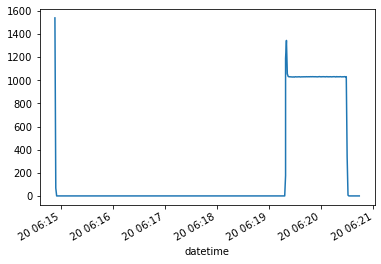

In [57]:
((df_VL04_mod4[df_VL04_mod4['shot_no'] == 5969]))['current_spindle'].plot()
#일부만 전류값을 가짐
#설비가 꺼지는 속도가 부분적으로 다른가?

<AxesSubplot:xlabel='datetime'>

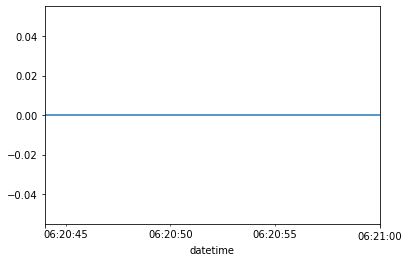

In [58]:
((df_VL04_mod4[df_VL04_mod4['shot_no'] == 5970]))['current_spindle'].plot()
#current_spindle 값이 모두 0

In [59]:
((df_VL04_mod4[df_VL04_mod4['shot_no'] == 5969]))['tool'].unique()
#shot 5969에서는 7번공구와 1번공구만 작동

array([7, 1], dtype=int64)

교체시점에 따라 tool5에 대해 current_spindle 값의 공백이 발생->아무 값도 가지지 않는 shot이 존재\
공백이 곧 교체 시점이 될 수 있다는 가정(나만의 가정)\
그렇다면 5925는 공백없이 정상적으로 분포가 나왔는데 이는 교체시점의 오류인가?
추가로, tool3과의 분포를 비교해보았을때, 공백이든 한shot에서 두번 튀는 양상이든 100% 일치하지는 않지만 동일한 형태가 도출되는 것을 확인 -> 예를 들어, tool5에서 5970이 공백이면 tool3에서도 공백, shot5948에서 tool5가 두번 튀는 양상을 나타내면 tool3도 두번 튀는 것 모양을 보임

shot이 제품 생산의 단위이기 때문에 기계를 멈추면 shot의 흐름도 멈췄다가 기계가 다시 작동되면 이어서 나갈 줄 알았지만 기계가 멈춰있을 때도 shot은 계속 진행(과연 shot이 제품 생산의 단위인가? 시간의 단위인가?)

## 문제의 shot 5968, 5969, 5970, 5971 연속적인 값 분석
문제가 있어보이는 부분을 plot을 찍어보자

In [60]:
df_VLO4_Tool5_E = df_VL04_Tool5[(df_VL04_Tool5['shot_no']>5967) & (df_VL04_Tool5['shot_no'] < 5972)]

In [61]:
df_VLO4_Tool5_E['current_spindle']

datetime
2022-07-20 05:44:36    2019.000000
2022-07-20 05:44:37    2018.000000
2022-07-20 05:44:38    2018.000000
2022-07-20 05:44:38    2018.000000
2022-07-20 05:44:39    2016.600000
                          ...     
2022-07-20 08:23:08    2017.400000
2022-07-20 08:23:09    2017.000000
2022-07-20 08:23:10    2018.000000
2022-07-20 08:23:10    2017.666667
2022-07-20 08:23:11    5460.800000
Name: current_spindle, Length: 1649, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='current_spindle'>

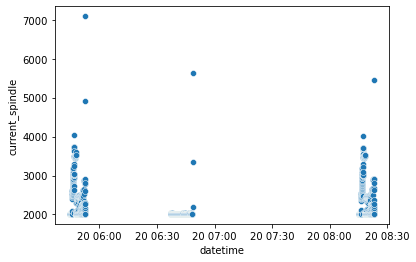

In [62]:
sns.scatterplot(data=df_VLO4_Tool5_E['current_spindle'])

In [63]:
df_VLO4_Tool5_E[df_VLO4_Tool5_E['shot_no']==5968]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-20 05:44:36  2022-07-20    5     44     36        500.0   5968.0   
2022-07-20 05:44:37  2022-07-20    5     44     37        500.0   5968.0   
2022-07-20 05:44:38  2022-07-20    5     44     38        500.0   5968.0   
2022-07-20 05:44:38  2022-07-20    5     44     38        505.0   5968.0   
2022-07-20 05:44:39  2022-07-20    5     44     39        505.0   5968.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 05:52:32  2022-07-20    5     52     32        505.0   5968.0   
2022-07-20 05:52:33  2022-07-20    5     52     33        505.0   5968.0   
2022-07-20 05:52:34  2022-07-20    5     52     34        505.0   5968.0   
2022-07-20 05:52:35  2022-07-20    5     52     35        505.0   5968.0   
2022-07-20 05:52:36  2022-07-20    5     52     36        505.0   5968.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-20 05:44:36       0.00      68.00          2019.00       86.0   
2022-07-20 05:44:37       0.00       6.00          2018.00       85.4   
2022-07-20 05:44:38       3.50       5.50          2018.00       86.0   
2022-07-20 05:44:38       3.00       4.00          2018.00      100.0   
2022-07-20 05:44:39     346.60     723.60          2016.60       86.8   
...                        ...        ...              ...        ...   
2022-07-20 05:52:32     390.00    1462.20          2022.40       91.2   
2022-07-20 05:52:33     352.40    1237.20          2021.60       90.4   
2022-07-20 05:52:34     222.20      49.20          2021.00       98.6   
2022-07-20 05:52:35       9.25      11.25          7089.25       91.5   
2022-07-20 05:52:36       2.00       9.00          4921.00       92.0   

                      pos_x_1   pos_z_1     rpm    feed  load_1  servo_load_x  \
datetime                                                                        
2022-07-20 05:44:36  640000.0  483830.0  299.00     0.0    0.00          4.00   
2022-07-20 05:44:37  640000.0  483830.0  299.00  7200.0    0.40          4.40   
2022-07-20 05:44:38  640000.0  483830.0  299.75  3000.0    0.75          5.75   
2022-07-20 05:44:38  683540.0  398623.0  299.00     0.0    1.00         51.00   
2022-07-20 05:44:39  596606.6  355156.4  299.00  7071.0    0.40         19.80   
...                       ...       ...     ...     ...     ...           ...   
2022-07-20 05:52:32  391079.8  323600.2  299.40  7071.0    0.20         20.00   
2022-07-20 05:52:33  561746.4  394498.4  299.60  5489.0    0.40         19.00   
2022-07-20 05:52:34  671942.8  398623.0  297.00  2000.0   23.80         11.60   
2022-07-20 05:52:35  683540.0  398623.0  176.75     0.0  120.25          5.25   
2022-07-20 05:52:36  683540.0  398623.0    7.00     0.0    0.00          5.00   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-20 05:44:36         74.50             4.00           -74.50     5   
2022-07-20 05:44:37         74.00             4.40           -74.00     5   
2022-07-20 05:44:38         73.25             5.75           -73.25     5   
2022-07-20 05:44:38          3.00           -51.00            -3.00     5   
2022-07-20 05:44:39         55.60           -19.80           -55.60     5   
...                           ...              ...              ...   ...   
2022-07-20 05:52:32         79.00            20.00           -79.00     5   
2022-07-20 05:52:33         74.20            19.00           -74.20     5   
2022-07-20 05:52:34         73.60            11.60           -73.60     5   
2022-07-20 05:52:35         72.25             5.25           -72.25     5   
2022-07-20 05:52:36         72.00             5.00           -72.00     5   

                    tool_state  

In [64]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5967) & (df_VL04_mod4['shot_no'] < 5972)]

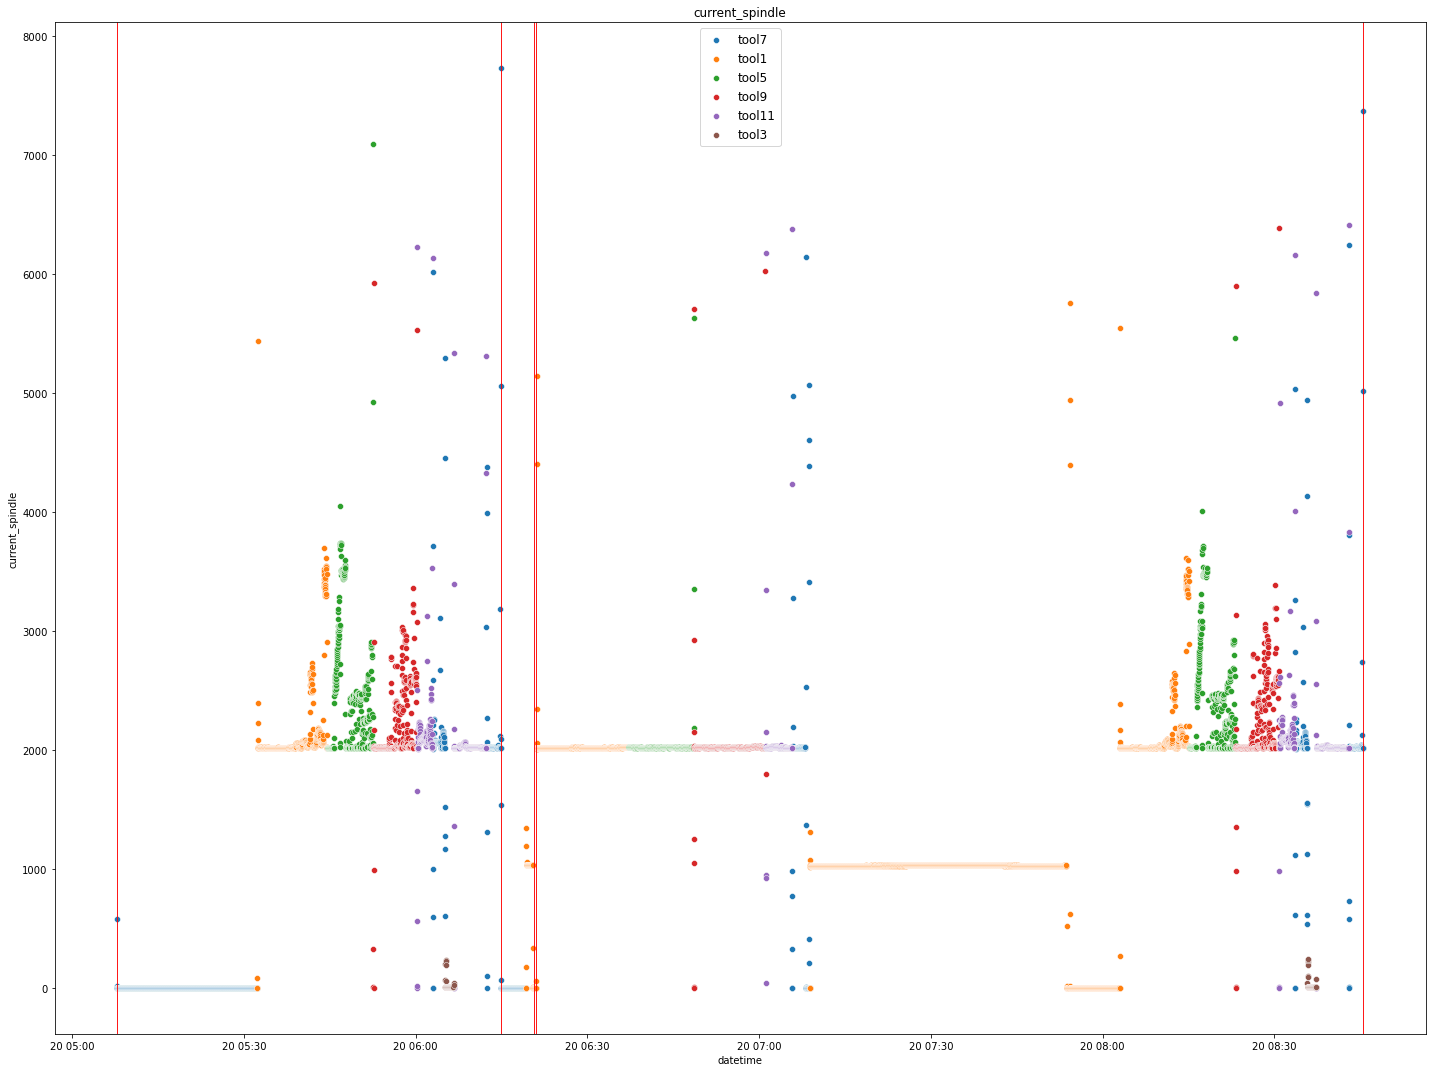

In [65]:
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.axvspan('2022-07-20 05:07:48' ,'2022-07-20 05:07:48', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 06:14:53' ,'2022-07-20 06:14:53', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 06:20:44' ,'2022-07-20 06:20:44', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 06:21:00' ,'2022-07-20 06:21:00', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 08:45:31' ,'2022-07-20 08:45:31', color = 'red', alpha = 0.9, label = 'shot change')
plt.title('current_spindle')
fig.tight_layout()
plt.show()

빨간줄이 shot을 나누는 기준, 총4개의 shot존재(shot5970은 굉장히 짧아서 없는 것처럼 보임)\
shot 5968 : 정상적인 sequence\
shot 5969 : 동작을 막 시작할 때 기계 정지, 아마 팁 교체를 위해 멈춘 것으로 추정\
shot 5970 : 동작하고 있지 않지만, shot 값을 생성\
shot 5971 : 팁을 갈고 다시 기계 동작 시작, 초반에 예열?하기위해 임의로 값이 찍힘?->추측\
희미하게 찍히는 부분 사이에 값이 존재하지 않아서 연결을 희미하게 표현\
이 모든 가정은 추측에 의해 가설을 세워 진행했습니다.

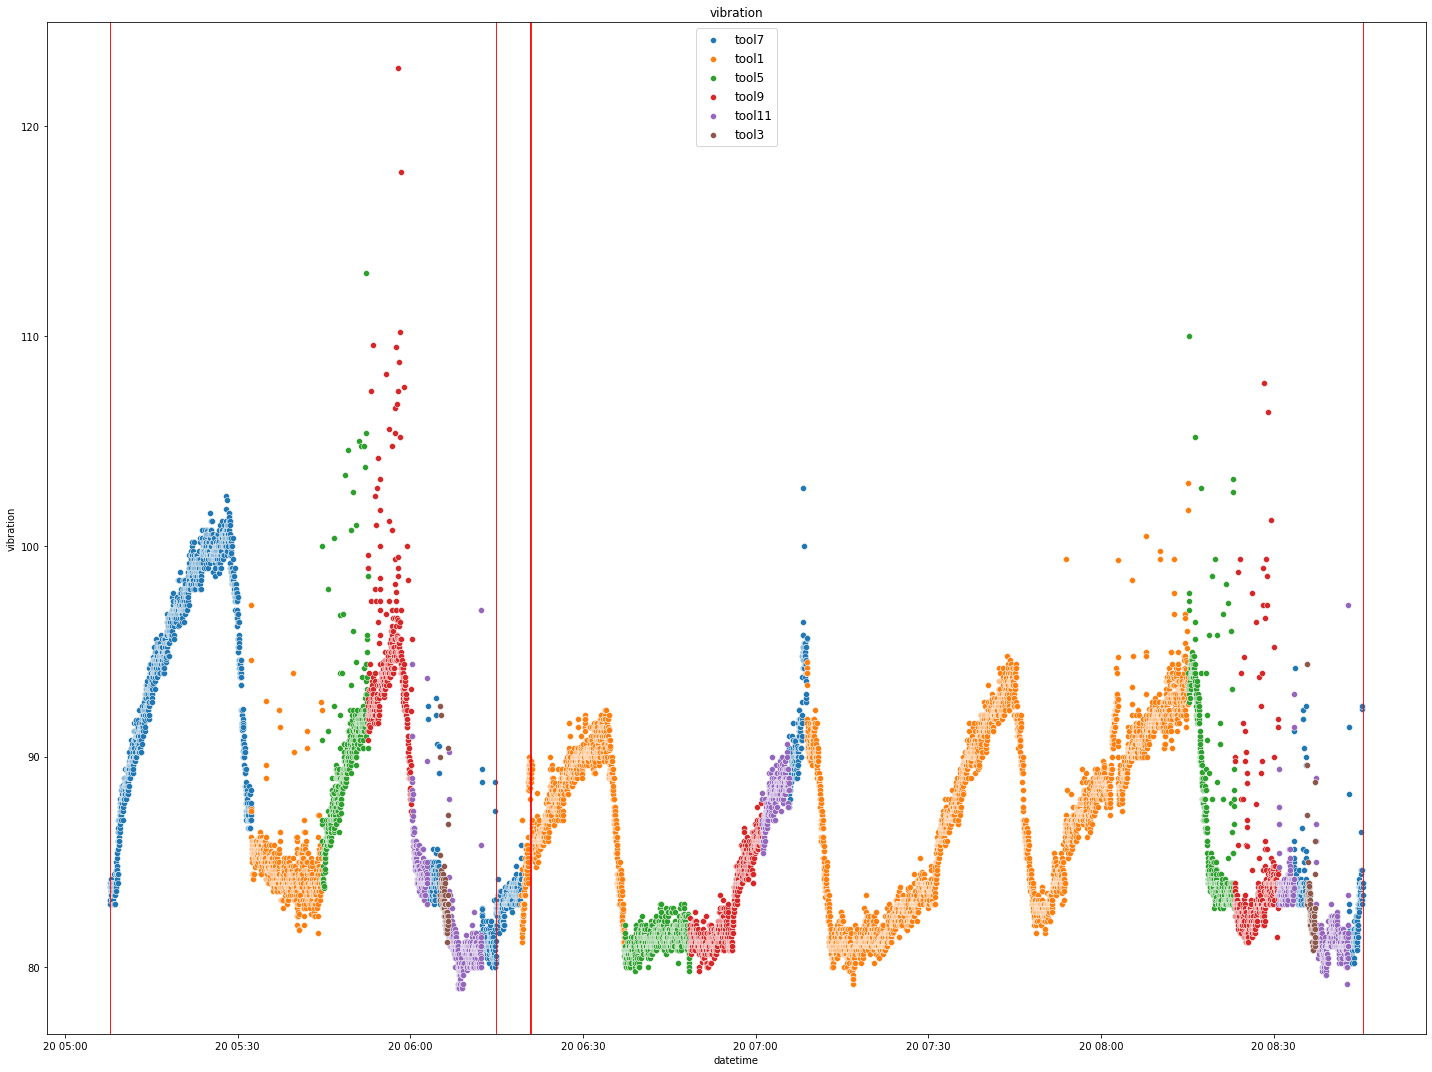

In [66]:
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['vibration'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['vibration'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['vibration'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['vibration'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['vibration'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['vibration'], label = 'tool3')
plt.legend(fontsize = 12)
plt.axvspan('2022-07-20 05:07:48' ,'2022-07-20 05:07:48', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 06:14:53' ,'2022-07-20 06:14:53', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 06:20:44' ,'2022-07-20 06:20:44', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 06:21:00' ,'2022-07-20 06:21:00', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-20 08:45:31' ,'2022-07-20 08:45:31', color = 'red', alpha = 0.9, label = 'shot change')
plt.title('vibration')
fig.tight_layout()
plt.show()

vibration은 직관적으로 일관된 형태가 보이지 않음

## 가설 : 역으로 shot길이를 분석하여 shot길이가 짧으면 그 시점에 교체가 이루어진다고 가정(교체 시점 찾기)
shot별 소요시간 구하기

In [67]:
df_VL04_mod4

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-13 20:58:37  2022-07-13   20     58     37        707.0   5832.0   
2022-07-13 20:58:38  2022-07-13   20     58     38        707.0   5832.0   
2022-07-13 20:58:39  2022-07-13   20     58     39        707.0   5832.0   
2022-07-13 20:58:40  2022-07-13   20     58     40        707.0   5832.0   
2022-07-13 20:58:41  2022-07-13   20     58     41        707.0   5832.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 23:56:54  2022-07-20   23     56     54        707.0   5988.0   
2022-07-20 23:56:55  2022-07-20   23     56     55        707.0   5988.0   
2022-07-20 23:56:56  2022-07-20   23     56     56        707.0   5988.0   
2022-07-20 23:56:57  2022-07-20   23     56     57        707.0   5988.0   
2022-07-20 23:56:58  2022-07-20   23     56     58        707.0   5988.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-13 20:58:37        0.0        3.0           1130.5  81.500000   
2022-07-13 20:58:38        0.0        2.0             52.0  81.600000   
2022-07-13 20:58:39        0.0        3.2              0.0  82.200000   
2022-07-13 20:58:40        0.0        3.2              0.0  82.400000   
2022-07-13 20:58:41        0.0        3.2              0.0  82.600000   
...                        ...        ...              ...        ...   
2022-07-20 23:56:54        0.0        3.6           2013.0  84.800000   
2022-07-20 23:56:55        0.0        2.4           2013.0  84.600000   
2022-07-20 23:56:56        0.0        2.8           2013.0  85.200000   
2022-07-20 23:56:57        4.2        8.0           5416.8  85.200000   
2022-07-20 23:56:58        6.0       10.0           5741.0  85.666667   

                      pos_x_1   pos_z_1    rpm  feed     load_1  servo_load_x  \
datetime                                                                        
2022-07-13 20:58:37  672565.0  404547.5    1.0   0.0   0.000000           4.0   
2022-07-13 20:58:38  640000.0  483830.0    0.0   0.0   0.000000           4.0   
2022-07-13 20:58:39  640000.0  483830.0    0.0   0.0   0.000000           4.0   
2022-07-13 20:58:40  640000.0  483830.0    0.0   0.0   0.000000           4.0   
2022-07-13 20:58:41  640000.0  483830.0    0.0   0.0   0.000000           4.0   
...                       ...       ...    ...   ...        ...           ...   
2022-07-20 23:56:54  683420.0  378120.0  299.8   0.0   0.000000           3.2   
2022-07-20 23:56:55  683420.0  378120.0  299.4   0.0   0.000000           3.6   
2022-07-20 23:56:56  683420.0  378120.0  299.2   0.0   0.000000           3.2   
2022-07-20 23:56:57  683420.0  378120.0  255.8   0.0  86.000000           3.4   
2022-07-20 23:56:58  683420.0  378120.0   39.0   0.0  40.666667           3.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-13 20:58:37          73.0              4.0            -73.0     7   
2022-07-13 20:58:38          73.0              4.0            -73.0     7   
2022-07-13 20:58:39          73.0              4.0            -73.0     7   
2022-07-13 20:58:40          73.0              4.0            -73.0     7   
2022-07-13 20:58:41          73.0              4.0            -73.0     7   
...                           ...              ...              ...   ...   
2022-07-20 23:56:54          72.4              3.2            -72.4     7   
2022-07-20 23:56:55          72.8              3.6            -72.8     7   
2022-07-20 23:56:56          73.0              3.2            -73.0     7   
2022-07-20 23:56:57          73.2              3.4            -73.2     7   
2022-07-20 23:56:58          72.0              3.0            -72.0     7   

                    tool_state  

In [68]:
shot_list = df_VL04_mod4['shot_no'].unique()
lag_df = pd.DataFrame()
for shot_idx in shot_list:
    a = df_VL04_mod4[df_VL04_mod4['shot_no'] == shot_idx].iloc[[0]] #shot의 시작 시점
    b = df_VL04_mod4[df_VL04_mod4['shot_no'] == shot_idx].iloc[[-1]] #shot의 종료 시점
    lag_df = pd.concat([lag_df, a], axis = 0)
    lag_df = pd.concat([lag_df, b], axis = 0)

In [69]:
lag_df.head()

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-13 20:58:37  2022-07-13   20     58     37        707.0   5832.0   
2022-07-13 21:40:53  2022-07-13   21     40     53        707.0   5832.0   
2022-07-13 21:40:53  2022-07-13   21     40     53        707.0   5833.0   
2022-07-13 22:23:45  2022-07-13   22     23     45        707.0   5833.0   
2022-07-13 22:23:45  2022-07-13   22     23     45        707.0   5834.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-13 20:58:37        0.0   3.000000      1130.500000       81.5   
2022-07-13 21:40:53        6.0   9.666667      5420.666667       82.0   
2022-07-13 21:40:53        0.0   4.000000      1086.000000       82.5   
2022-07-13 22:23:45        4.5   8.250000      4271.250000       85.0   
2022-07-13 22:23:45        0.0   4.000000      1351.000000       88.0   

                      pos_x_1   pos_z_1   rpm  feed     load_1  servo_load_x  \
datetime                                                                       
2022-07-13 20:58:37  672565.0  404547.5   1.0   0.0   0.000000           4.0   
2022-07-13 21:40:53  683420.0  378120.0  64.0   0.0  69.333333           4.0   
2022-07-13 21:40:53  661710.0  430975.0   0.0   0.0   0.000000           4.0   
2022-07-13 22:23:45  683420.0  378120.0  70.5   0.0  61.000000           4.0   
2022-07-13 22:23:45  683420.0  378120.0   0.0   0.0   0.000000           4.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-13 20:58:37          73.0              4.0            -73.0     7   
2022-07-13 21:40:53          73.0              4.0            -73.0     7   
2022-07-13 21:40:53          73.0              4.0            -73.0     7   
2022-07-13 22:23:45          72.5              4.0            -72.0     7   
2022-07-13 22:23:45          73.0              4.0            -73.0     7   

                    tool_state  
datetime                        
2022-07-13 20:58:37         가공  
2022-07-13 21:40:53         가공  
2022-07-13 21:40:53         가공  
2022-07-13 22:23:45         가공  
2022-07-13 22:23:45         가공

In [70]:
lag_df_start = lag_df.iloc[::2,:] #shot의 시작 지점만 가져옴

In [71]:
lag_df_start = lag_df_start.reset_index() #index 초기화

In [72]:
lag_df_start

datetime        date hour minute second  tool_number  shot_no  \
0   2022-07-13 20:58:37  2022-07-13   20     58     37        707.0   5832.0   
1   2022-07-13 21:40:53  2022-07-13   21     40     53        707.0   5833.0   
2   2022-07-13 22:23:45  2022-07-13   22     23     45        707.0   5834.0   
3   2022-07-13 23:09:53  2022-07-13   23      9     53        707.0   5835.0   
4   2022-07-14 00:01:43  2022-07-14    0      1     43        707.0   5836.0   
5   2022-07-14 00:43:59  2022-07-14    0     43     59        707.0   5837.0   
6   2022-07-14 01:25:55  2022-07-14    1     25     55        707.0   5838.0   
7   2022-07-14 02:08:12  2022-07-14    2      8     12        707.0   5839.0   
8   2022-07-14 02:51:22  2022-07-14    2     51     22        707.0   5840.0   
9   2022-07-14 03:33:58  2022-07-14    3     33     58        707.0   5841.0   
10  2022-07-14 06:36:18  2022-07-14    6     36     18        707.0   5842.0   
11  2022-07-14 07:40:40  2022-07-14    7     40     40        707.0   5843.0   
12  2022-07-14 09:28:54  2022-07-14    9     28     54        707.0   5844.0   
13  2022-07-14 10:12:53  2022-07-14   10     12     53        707.0   5845.0   
14  2022-07-14 10:56:52  2022-07-14   10     56     52        707.0   5846.0   
15  2022-07-14 11:40:56  2022-07-14   11     40     56        707.0   5847.0   
16  2022-07-14 12:24:59  2022-07-14   12     24     59        707.0   5848.0   
17  2022-07-14 13:46:07  2022-07-14   13     46      7        707.0   5849.0   
18  2022-07-14 14:30:01  2022-07-14   14     30      1        707.0   5850.0   
19  2022-07-14 15:13:57  2022-07-14   15     13     57        707.0   5851.0   
20  2022-07-14 15:58:00  2022-07-14   15     58      0        707.0   5852.0   
21  2022-07-14 16:42:00  2022-07-14   16     42      0        707.0   5853.0   
22  2022-07-14 17:26:02  2022-07-14   17     26      2        707.0   5854.0   
23  2022-07-14 18:16:13  2022-07-14   18     16     13        707.0   5855.0   
24  2022-07-14 20:48:15  2022-07-14   20     48     15        707.0   5856.0   
25  2022-07-14 21:30:22  2022-07-14   21     30     22        707.0   5857.0   
26  2022-07-14 22:13:35  2022-07-14   22     13     35        707.0   5858.0   
27  2022-07-14 22:55:03  2022-07-14   22     55      3        707.0   5859.0   
28  2022-07-14 23:40:27  2022-07-14   23     40     27        707.0   5860.0   
29  2022-07-15 00:23:16  2022-07-15    0     23     16        707.0   5861.0   
30  2022-07-15 01:07:39  2022-07-15    1      7     39        707.0   5862.0   
31  2022-07-15 01:50:48  2022-07-15    1     50     48        707.0   5863.0   
32  2022-07-15 02:33:56  2022-07-15    2     33     56        707.0   5864.0   
33  2022-07-15 06:33:24  2022-07-15    6     33     24        707.0   5865.0   
34  2022-07-15 07:46:40  2022-07-15    7     46     40        707.0   5866.0   
35  2022-07-15 07:47:16  2022-07-15    7     47     16        707.0   5867.0   
36  2022-07-15 09:28:37  2022-07-15    9     28     37        707.0   5868.0   
37  2022-07-15 10:12:31  2022-07-15   10     12     31        707.0   5869.0   
38  2022-07-15 10:56:28  2022-07-15   10     56     28        707.0   5870.0   
39  2022-07-15 11:40:28  2022-07-15   11     40     28        707.0   5871.0   
40  2022-07-15 12:24:32  2022-07-15   12     24     32        707.0   5872.0   
41  2022-07-15 13:44:43  2022-07-15   13     44     43        707.0   5873.0   
42  2022-07-15 14:28:42  2022-07-15   14     28     42        707.0   5874.0   
43  2022-07-15 15:12:41  2022-07-15   15     12     41        707.0   5875.0   
44  2022-07-15 15:56:43  2022-07-15   15     56     43        707.0   5876.0   
45  2022-07-15 16:40:42  2022-07-15   16     40     42        707.0   5877.0   
46  2022-07-15 17:25:37  2022-07-15   17     25     37        707.0   5878.0   
47  2022-07-15 18:19:03  2022-07-15   18     19      3        707.0   5879.0   
48  2022-07-15 20:46:07  2022-07-15   20     46      7        707.0   5880.0   
49  2022-07-15 

In [73]:
time_diff = []
for i in range(0,len(lag_df_start)-1):
    time_diff.append((pd.Timestamp(lag_df_start['datetime'][i+1]) - pd.Timestamp(lag_df_start['datetime'][i])))

timediff_df = pd.DataFrame(time_diff)

In [74]:
timediff_df

0
0   0 days 00:42:16
1   0 days 00:42:52
2   0 days 00:46:08
3   0 days 00:51:50
4   0 days 00:42:16
5   0 days 00:41:56
6   0 days 00:42:17
7   0 days 00:43:10
8   0 days 00:42:36
9   0 days 03:02:20
10  0 days 01:04:22
11  0 days 01:48:14
12  0 days 00:43:59
13  0 days 00:43:59
14  0 days 00:44:04
15  0 days 00:44:03
16  0 days 01:21:08
17  0 days 00:43:54
18  0 days 00:43:56
19  0 days 00:44:03
20  0 days 00:44:00
21  0 days 00:44:02
22  0 days 00:50:11
23  0 days 02:32:02
24  0 days 00:42:07
25  0 days 00:43:13
26  0 days 00:41:28
27  0 days 00:45:24
28  0 days 00:42:49
29  0 days 00:44:23
30  0 days 00:43:09
31  0 days 00:43:08
32  0 days 03:59:28
33  0 days 01:13:16
34  0 days 00:00:36
35  0 days 01:41:21
36  0 days 00:43:54
37  0 days 00:43:57
38  0 days 00:44:00
39  0 days 00:44:04
40  0 days 01:20:11
41  0 days 00:43:59
42  0 days 00:43:59
43  0 days 00:44:02
44  0 days 00:43:59
45  0 days 00:44:55
46  0 days 00:53:26
47  0 days 02:27:04
48  0 days 00:45:59
49  0 days 00:42:34
50  0 days 00:42:17
51  0 days 00:40:51
52  0 days 00:46:58
53  0 days 00:52:12
54  0 days 00:43:07
55  0 days 00:41:50
56  0 days 00:44:45
57  0 days 03:11:11
58  0 days 01:10:50
59  0 days 01:21:50
60  0 days 00:50:20
61  0 days 01:01:38
62  0 days 00:46:02
63  0 days 00:47:59
64  0 days 01:13:04
65  0 days 00:46:34
66  0 days 00:48:12
67  0 days 01:02:00
68  0 days 03:41:16
69  0 days 00:50:48
70  0 days 00:42:03
71  0 days 00:46:20
72  0 days 00:41:57
73  0 days 00:43:09
74  0 days 00:42:16
75  0 days 00:44:02
76  0 days 00:42:34
77  0 days 04:33:33
78  0 days 00:13:53
79  0 days 00:50:24
80  0 days 01:09:21
81  0 days 00:36:29
82  0 days 00:39:28
83  0 days 00:42:05
84  0 days 00:37:41
85  0 days 00:36:47
86  0 days 00:50:27
87  0 days 00:55:38
88  0 days 00:40:55
89  0 days 00:47:24
90  0 days 00:53:13
91  0 days 17:00:11
92  0 days 00:42:48
93  0 days 00:44:14
94  0 days 00:44:59
95  0 days 01:45:42
96  0 days 00:47:25
97  0 days 00:42:10
98  0 days 00:42:25
99  0 days 00:44:12
100 0 days 00:49:16
101 0 days 01:34:16
102 0 days 00:46:54
103 0 days 00:51:59
104 0 days 00:42:50
105 0 days 00:44:10
106 0 days 00:44:40
107 0 days 00:42:37
108 0 days 00:42:37
109 0 days 00:42:56
110 0 days 00:42:49
111 0 days 00:43:55
112 0 days 04:03:55
113 0 days 00:44:10
114 0 days 00:00:14
115 0 days 02:16:59
116 0 days 01:30:24
117 0 days 00:44:20
118 0 days 00:44:25
119 0 days 00:45:01
120 0 days 01:05:02
121 0 days 00:44:52
122 0 days 00:44:39
123 0 days 00:45:21
124 0 days 01:32:33
125 0 days 00:44:36
126 0 days 00:45:22
127 0 days 01:35:42
128 0 days 00:42:54
129 0 days 00:43:06
130 0 days 00:42:44
131 0 days 00:43:19
132 0 days 00:42:44
133 0 days 00:43:08
134 0 days 01:09:45
135 0 days 03:01:25
136 0 days 01:07:05
137 0 days 00:05:51
138 0 days 00:00:17
139 0 days 02:24:30
140 0 days 00:44:44
141 0 days 00:45:33
142 0 days 01:29:19
143 0 days 00:45:34
144 0 days 02:06:02
145 0 days 00:45:39
146 0 days 00:45:49
147 0 days 00:43:51
148 0 days 00:45:04
149 0 days 00:45:10
150 0 days 00:46:05
151 0 days 01:33:08
152 0 days 00:23:58
153 0 days 00:42:43
154 0 days 00:42:46
155 0 days 00:43:06

In [75]:
timediff_df.columns = ['interval']
timediff_df = pd.DataFrame(timediff_df['interval'].dt.total_seconds()//60) #분으로 바꿔주기
timediff_df['interval'].unique()

array([  42.,   46.,   51.,   41.,   43.,  182.,   64.,  108.,   44.,
         81.,   50.,  152.,   45.,  239.,   73.,    0.,  101.,   80.,
         53.,  147.,   40.,   52.,  191.,   70.,   61.,   47.,   48.,
         62.,  221.,  273.,   13.,   69.,   36.,   39.,   37.,   55.,
       1020.,  105.,   49.,   94.,  243.,  136.,   90.,   65.,   92.,
         95.,  181.,   67.,    5.,  144.,   89.,  126.,   93.,   23.])

In [76]:
timediff_df['interval'].value_counts()

42.0      26
44.0      24
43.0      21
45.0      11
46.0       7
50.0       5
41.0       4
47.0       3
0.0        3
51.0       2
36.0       2
69.0       2
40.0       2
81.0       2
53.0       2
73.0       2
243.0      1
49.0       1
94.0       1
90.0       1
105.0      1
136.0      1
181.0      1
65.0       1
92.0       1
95.0       1
55.0       1
67.0       1
5.0        1
144.0      1
89.0       1
126.0      1
93.0       1
1020.0     1
62.0       1
37.0       1
147.0      1
182.0      1
64.0       1
108.0      1
152.0      1
239.0      1
101.0      1
80.0       1
52.0       1
39.0       1
191.0      1
70.0       1
61.0       1
48.0       1
221.0      1
273.0      1
13.0       1
23.0       1
Name: interval, dtype: int64

시차가 0인 부분인 시점이 팁 교체를 위해 기계를 멈추는 시점이라 판단

In [77]:
timediff_df[timediff_df['interval']==0]

interval
34        0.0
114       0.0
138       0.0

인덱스가 34, 114, 138에서 shot길이가 0이라는 것은 lag_df_start의 인덱스 34,114,138에 해당하는 shot을 의미한다.

In [78]:
lag_df_start.iloc[[34,114,138]]

datetime        date hour minute second  tool_number  shot_no  \
34  2022-07-15 07:46:40  2022-07-15    7     46     40        707.0   5866.0   
114 2022-07-19 06:39:13  2022-07-19    6     39     13        707.0   5946.0   
138 2022-07-20 06:20:44  2022-07-20    6     20     44        101.0   5970.0   

     current_x  current_z  current_spindle  vibration   pos_x_1   pos_z_1  \
34        0.25        3.0           1531.5       86.0  672565.0  404547.5   
114       0.00        2.4            333.2       83.2  648684.0  462688.0   
138       0.00        2.0              0.0       88.5  679193.0  483830.0   

      rpm  feed  load_1  servo_load_x  servo_load_z  servo_current_x  \
34   0.75   0.0     0.0           3.5          73.0              3.5   
114  0.00   0.0     0.0           4.0          72.4              4.0   
138  0.00   0.0     0.0           5.5          75.0              5.5   

     servo_current_z  tool tool_state  
34             -73.0     7         가공  
114            -72.4     7         가공  
138            -75.0     1         가공

In [79]:
timediff_df[timediff_df['interval']==5]

interval
137       5.0

In [80]:
lag_df_start.iloc[[137]]
#이때가 5970이 완전히 멈추기 전에 도중에 끊어서 짧게 나온것으로 추정

datetime        date hour minute second  tool_number  shot_no  \
137 2022-07-20 06:14:53  2022-07-20    6     14     53        707.0   5969.0   

     current_x  current_z  current_spindle  vibration        pos_x_1  \
137        0.0   3.333333      1540.666667       82.0  668946.666667   

           pos_z_1  rpm  feed  load_1  servo_load_x  servo_load_z  \
137  413356.666667  0.0   0.0     0.0      4.666667          73.0   

     servo_current_x  servo_current_z  tool tool_state  
137         4.666667            -73.0     7         가공

In [81]:
#5970은 처음 세운 가설과 일치
df_VL04_mod4[df_VL04_mod4['shot_no']==5946]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-19 06:39:13  2022-07-19    6     39     13        707.0   5946.0   
2022-07-19 06:39:14  2022-07-19    6     39     14        707.0   5946.0   
2022-07-19 06:39:15  2022-07-19    6     39     15        707.0   5946.0   
2022-07-19 06:39:16  2022-07-19    6     39     16        707.0   5946.0   
2022-07-19 06:39:17  2022-07-19    6     39     17        707.0   5946.0   
2022-07-19 06:39:18  2022-07-19    6     39     18        707.0   5946.0   
2022-07-19 06:39:19  2022-07-19    6     39     19        707.0   5946.0   
2022-07-19 06:39:20  2022-07-19    6     39     20        707.0   5946.0   
2022-07-19 06:39:21  2022-07-19    6     39     21        707.0   5946.0   
2022-07-19 06:39:22  2022-07-19    6     39     22        707.0   5946.0   
2022-07-19 06:39:23  2022-07-19    6     39     23        707.0   5946.0   
2022-07-19 06:39:24  2022-07-19    6     39     24        707.0   5946.0   
2022-07-19 06:39:25  2022-07-19    6     39     25        707.0   5946.0   
2022-07-19 06:39:26  2022-07-19    6     39     26        707.0   5946.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-19 06:39:13        0.0        2.4            333.2       83.2   
2022-07-19 06:39:14        0.0        2.0              0.0       83.0   
2022-07-19 06:39:15        0.0        2.0              0.0       83.0   
2022-07-19 06:39:16        0.0        2.0              0.0       82.8   
2022-07-19 06:39:17        0.0        2.0              0.0       82.8   
2022-07-19 06:39:18        0.0        2.0              0.0       83.2   
2022-07-19 06:39:19        0.0        2.0              0.0       84.2   
2022-07-19 06:39:20        0.0        2.0              0.0       84.4   
2022-07-19 06:39:21        0.0        2.0              0.0       83.0   
2022-07-19 06:39:22        0.0        2.0              0.0       83.0   
2022-07-19 06:39:23        0.0        2.0              0.0       83.0   
2022-07-19 06:39:24        0.0        2.0              0.0       83.6   
2022-07-19 06:39:25        0.0        2.0              0.0       83.2   
2022-07-19 06:39:26        0.0        2.0              0.0       83.0   

                      pos_x_1   pos_z_1  rpm  feed  load_1  servo_load_x  \
datetime                                                                   
2022-07-19 06:39:13  648684.0  462688.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:14  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:15  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:16  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:17  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:18  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:19  640000.0  483830.0  0.0   0.0     0.0           4.4   
2022-07-19 06:39:20  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:21  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:22  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:23  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:24  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:25  640000.0  483830.0  0.0   0.0     0.0           4.0   
2022-07-19 06:39:26  640000.0  483830.0  0.0   0.0     0.0           4.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-19 06:39:13          72.4              4.0            -72.4     7   
2022-07-19 06:39:14          72.0              4.0            -72.0     7   
2022-07-19 06:39:15          72.4              4.0            -72.4     7   
2022-07-19 06:39:16          72.4      

7월 19일 6시 39분은 주어진 교체 시점에 해당하지 X

In [82]:
df_VL04_mod4[df_VL04_mod4['shot_no']==5867]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-15 07:47:16  2022-07-15    7     47     16        707.0   5867.0   
2022-07-15 07:47:17  2022-07-15    7     47     17        707.0   5867.0   
2022-07-15 07:47:18  2022-07-15    7     47     18        707.0   5867.0   
2022-07-15 07:47:19  2022-07-15    7     47     19        707.0   5867.0   
2022-07-15 07:47:20  2022-07-15    7     47     20        707.0   5867.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-15 09:28:33  2022-07-15    9     28     33        707.0   5867.0   
2022-07-15 09:28:34  2022-07-15    9     28     34        707.0   5867.0   
2022-07-15 09:28:35  2022-07-15    9     28     35        707.0   5867.0   
2022-07-15 09:28:36  2022-07-15    9     28     36        707.0   5867.0   
2022-07-15 09:28:37  2022-07-15    9     28     37        707.0   5867.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-15 07:47:16       0.00       2.00             0.00      86.00   
2022-07-15 07:47:17       0.00       2.00             0.00      86.40   
2022-07-15 07:47:18       0.00       2.00             0.00      86.00   
2022-07-15 07:47:19       0.00       2.00             0.00      85.80   
2022-07-15 07:47:20       0.00       2.00             0.00      85.80   
...                        ...        ...              ...        ...   
2022-07-15 09:28:33       0.00       4.00          2015.80      83.40   
2022-07-15 09:28:34       0.00       4.00          2015.80      83.40   
2022-07-15 09:28:35       0.00       4.00          2015.60      83.60   
2022-07-15 09:28:36       0.60       5.20          2341.20      83.20   
2022-07-15 09:28:37       4.75       9.25          5539.25      83.25   

                      pos_x_1   pos_z_1    rpm  feed  load_1  servo_load_x  \
datetime                                                                     
2022-07-15 07:47:16  640000.0  483830.0    0.0   0.0    0.00           4.0   
2022-07-15 07:47:17  640000.0  483830.0    0.0   0.0    0.00           3.8   
2022-07-15 07:47:18  640000.0  483830.0    0.0   0.0    0.00           3.6   
2022-07-15 07:47:19  640000.0  483830.0    0.0   0.0    0.00           3.4   
2022-07-15 07:47:20  640000.0  483830.0    0.0   0.0    0.00           3.6   
...                       ...       ...    ...   ...     ...           ...   
2022-07-15 09:28:33  683420.0  378120.0  299.2   0.0    0.40           3.2   
2022-07-15 09:28:34  683420.0  378120.0  299.4   0.0    0.60           3.0   
2022-07-15 09:28:35  683420.0  378120.0  299.0   0.0    0.60           3.8   
2022-07-15 09:28:36  683420.0  378120.0  288.8   0.0   43.00           3.8   
2022-07-15 09:28:37  683420.0  378120.0  119.5   0.0   95.25           3.5   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-15 07:47:16          73.0              4.0            -73.0     7   
2022-07-15 07:47:17          73.0              3.8            -73.0     7   
2022-07-15 07:47:18          73.0              3.6            -73.0     7   
2022-07-15 07:47:19          72.2              3.4            -72.2     7   
2022-07-15 07:47:20          72.8              3.6            -72.8     7   
...                           ...              ...              ...   ...   
2022-07-15 09:28:33          73.0              3.2            -73.0     7   
2022-07-15 09:28:34          73.0              3.0            -73.0     7   
2022-07-15 09:28:35          73.0              3.8            -73.0     7   
2022-07-15 09:28:36          72.6              3.8            -72.6     7   
2022-07-15 09:28:37          73.0              3.5            -73.0     7   

                    tool_state  
datetime                        
2022-

7월 15일 7시 47분은 주어진 교체 시점에 해당하지 X

## shot5866, 5946에 대해 분포형태 확인

### 5866

In [83]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5864) & (df_VL04_mod4['shot_no'] < 5869)]

In [84]:
df_VL04_mod4[df_VL04_mod4['shot_no']==5868]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-15 09:28:37  2022-07-15    9     28     37        707.0   5868.0   
2022-07-15 09:28:38  2022-07-15    9     28     38        707.0   5868.0   
2022-07-15 09:28:39  2022-07-15    9     28     39        707.0   5868.0   
2022-07-15 09:28:40  2022-07-15    9     28     40        707.0   5868.0   
2022-07-15 09:28:41  2022-07-15    9     28     41        707.0   5868.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-15 10:12:27  2022-07-15   10     12     27        707.0   5868.0   
2022-07-15 10:12:28  2022-07-15   10     12     28        707.0   5868.0   
2022-07-15 10:12:29  2022-07-15   10     12     29        707.0   5868.0   
2022-07-15 10:12:30  2022-07-15   10     12     30        707.0   5868.0   
2022-07-15 10:12:31  2022-07-15   10     12     31        707.0   5868.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-15 09:28:37        0.0        4.0           1895.0  84.000000   
2022-07-15 09:28:38        0.0        2.4            435.8  84.800000   
2022-07-15 09:28:39        0.0        2.0              1.0  85.200000   
2022-07-15 09:28:40        0.0        2.0              0.0  85.200000   
2022-07-15 09:28:41        0.0        2.0              0.0  84.800000   
...                        ...        ...              ...        ...   
2022-07-15 10:12:27        0.0        4.0           2014.0  83.600000   
2022-07-15 10:12:28        0.0        4.0           2014.0  83.000000   
2022-07-15 10:12:29        0.0        4.0           2014.0  83.600000   
2022-07-15 10:12:30        4.2        6.4           3745.6  84.000000   
2022-07-15 10:12:31        7.0       11.0           6347.0  83.333333   

                      pos_x_1   pos_z_1    rpm  feed      load_1  \
datetime                                                           
2022-07-15 09:28:37  683420.0  378120.0    0.0   0.0    0.000000   
2022-07-15 09:28:38  640000.0  483830.0    0.0   0.0    0.000000   
2022-07-15 09:28:39  640000.0  483830.0    0.0   0.0    0.000000   
2022-07-15 09:28:40  640000.0  483830.0    0.0   0.0    0.000000   
2022-07-15 09:28:41  640000.0  483830.0    0.0   0.0    0.000000   
...                       ...       ...    ...   ...         ...   
2022-07-15 10:12:27  683420.0  378120.0  299.4   0.0    0.000000   
2022-07-15 10:12:28  683420.0  378120.0  299.4   0.0    0.000000   
2022-07-15 10:12:29  683420.0  378120.0  299.4   0.0    0.000000   
2022-07-15 10:12:30  683420.0  378120.0  276.0   0.0   67.800000   
2022-07-15 10:12:31  683420.0  378120.0  113.0   0.0  100.333333   

                     servo_load_x  servo_load_z  servo_current_x  \
datetime                                                           
2022-07-15 09:28:37      3.000000          73.0         3.000000   
2022-07-15 09:28:38      4.000000          72.4         4.000000   
2022-07-15 09:28:39      4.000000          72.6         4.000000   
2022-07-15 09:28:40      3.800000          73.0         3.800000   
2022-07-15 09:28:41      4.000000          72.8         4.000000   
...                           ...           ...              ...   
2022-07-15 10:12:27      3.200000          73.0         3.200000   
2022-07-15 10:12:28      3.800000          73.0         3.800000   
2022-07-15 10:12:29      3.400000          73.4         3.400000   
2022-07-15 10:12:30      3.000000          73.6         3.000000   
2022-07-15 10:12:31      3.666667          73.0         3.666667   

                     servo_current_z  tool tool_state  
datetime                                               
2022-07-15 09:28:37            -73.0     7         가공  
2022-07-15 09:28:38            -72.4     7         가공  
2022-07-15 09:28:39            -72.6     7         가공  
2022-07-15 09:28:40            -73.0  

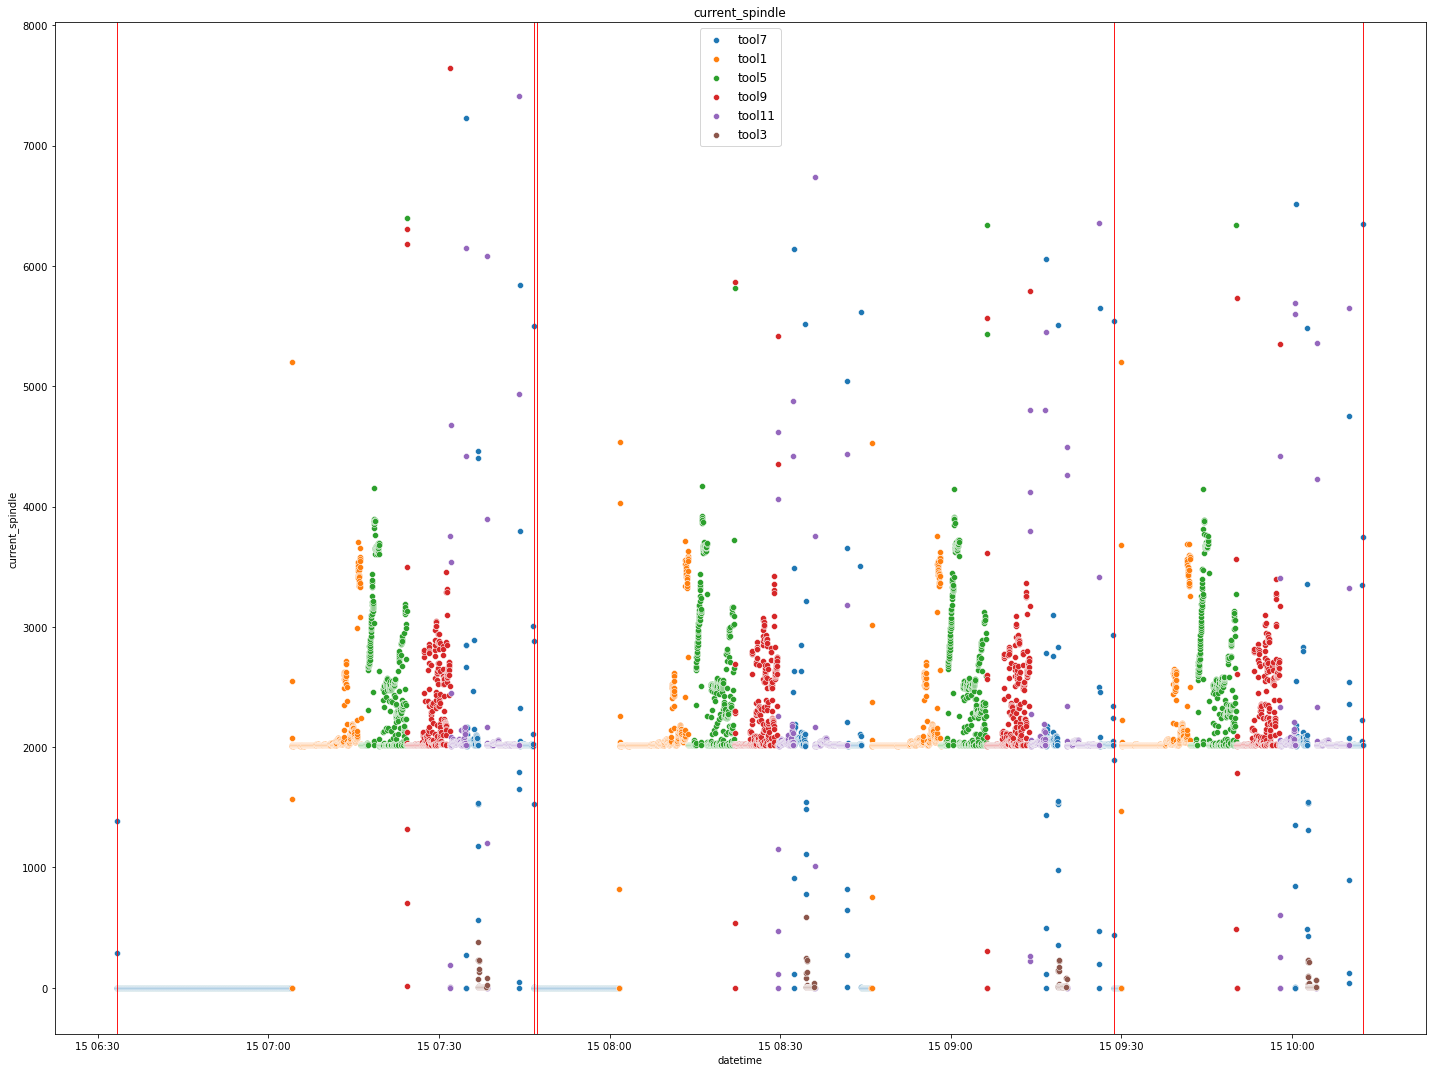

In [85]:
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.axvspan('2022-07-15 06:33:24' ,'2022-07-15 06:33:24', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-15 07:46:40' ,'2022-07-15 07:46:40', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-15 07:47:16' ,'2022-07-15 07:47:16', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-15 09:28:37' ,'2022-07-15 09:28:37', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-15 10:12:31' ,'2022-07-15 10:12:31', color = 'red', alpha = 0.9, label = 'shot change')
plt.title('current_spindle')
fig.tight_layout()
plt.show()

shot 5865 : 일반적인 형태\
shot 5866 : 교체 시점이라고 가정한 부분이지만 사실상 교체 시점이 될 수 없음 단순 오류라고 생각(교체한다고 하기엔 시간이 짧음\
shot 5867 : 오류의 영향인지 두개의 패턴이 찍힘\
shot 5868 : 일반적인 형태라고 볼 수 있지만 앞부분에 tool7이 찍히는 부분이 없음

shot의 길이가 짧다는 게 교체 시점이 된다는 가정이 성립할 수 없는게 교체하는데 소요되는 시간이 있기 때문에 애초에 불가\
내가 세운 가설이 잘못된 것

## shot 소요시간 이상치 분포 분석

In [86]:
value = timediff_df['interval'].value_counts()

In [87]:
value = pd.DataFrame(value)

In [88]:
value = value.reset_index()

<AxesSubplot:ylabel='Density'>

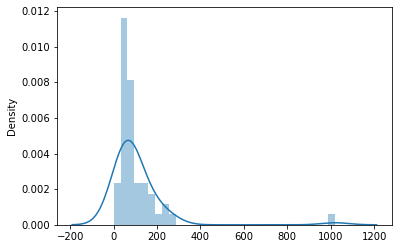

In [89]:
sns.distplot(x=value['index'],  kde=True)

In [90]:
#이상치 1020
timediff_df[timediff_df['interval']>1000]

interval
91    1020.0

In [91]:
lag_df_start.iloc[[91]]
#shot 5923

datetime        date hour minute second  tool_number  shot_no  \
91 2022-07-17 16:08:03  2022-07-17   16      8      3        707.0   5923.0   

    current_x  current_z  current_spindle  vibration   pos_x_1   pos_z_1  rpm  \
91        0.0        5.6           2154.6       85.0  666052.0  420404.0  0.6   

    feed  load_1  servo_load_x  servo_load_z  servo_current_x  \
91   0.0     0.0           3.8          73.6              3.8   

    servo_current_z  tool tool_state  
91            -73.6     7         가공

### 5923 분포 확인

In [92]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5921) & (df_VL04_mod4['shot_no'] < 5926)]

In [93]:
df_VL04_mod4[df_VL04_mod4['shot_no']==5925]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-18 09:51:02  2022-07-18    9     51      2        707.0   5925.0   
2022-07-18 09:51:03  2022-07-18    9     51      3        707.0   5925.0   
2022-07-18 09:51:04  2022-07-18    9     51      4        707.0   5925.0   
2022-07-18 09:51:05  2022-07-18    9     51      5        707.0   5925.0   
2022-07-18 09:51:06  2022-07-18    9     51      6        707.0   5925.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-18 10:35:12  2022-07-18   10     35     12        707.0   5925.0   
2022-07-18 10:35:13  2022-07-18   10     35     13        707.0   5925.0   
2022-07-18 10:35:14  2022-07-18   10     35     14        707.0   5925.0   
2022-07-18 10:35:15  2022-07-18   10     35     15        707.0   5925.0   
2022-07-18 10:35:16  2022-07-18   10     35     16        707.0   5925.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-18 09:51:02        0.0        3.2            687.2       85.2   
2022-07-18 09:51:03        0.0        2.0              4.6       85.8   
2022-07-18 09:51:04        0.0        2.0              0.0       85.8   
2022-07-18 09:51:05        0.0        2.0              0.0       86.0   
2022-07-18 09:51:06        0.0        2.8              0.0       86.2   
...                        ...        ...              ...        ...   
2022-07-18 10:35:12        0.0        4.0           2015.6       82.4   
2022-07-18 10:35:13        0.0        4.0           2015.4       83.0   
2022-07-18 10:35:14        0.0        4.0           2015.0       83.4   
2022-07-18 10:35:15        4.4        8.4           4658.6       83.0   
2022-07-18 10:35:16        3.0       11.0           6048.0       83.5   

                      pos_x_1   pos_z_1    rpm  feed  load_1  servo_load_x  \
datetime                                                                     
2022-07-18 09:51:02  657368.0  441546.0    0.0   0.0     0.0           4.0   
2022-07-18 09:51:03  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-18 09:51:04  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-18 09:51:05  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-18 09:51:06  640000.0  483830.0    0.0   0.0     0.0           4.0   
...                       ...       ...    ...   ...     ...           ...   
2022-07-18 10:35:12  683420.0  378120.0  299.2   0.0     0.0           3.6   
2022-07-18 10:35:13  683420.0  378120.0  299.4   0.0     0.2           4.0   
2022-07-18 10:35:14  683420.0  378120.0  299.0   0.0     0.2           4.0   
2022-07-18 10:35:15  683420.0  378120.0  218.4   0.0   116.6           4.0   
2022-07-18 10:35:16  683420.0  378120.0   34.0   0.0    41.0           4.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-18 09:51:02          73.2              4.0            -73.2     7   
2022-07-18 09:51:03          73.2              4.0            -73.2     7   
2022-07-18 09:51:04          73.8              4.0            -73.8     7   
2022-07-18 09:51:05          73.2              4.0            -73.2     7   
2022-07-18 09:51:06          73.6              4.0            -73.6     7   
...                           ...              ...              ...   ...   
2022-07-18 10:35:12          74.0              3.6            -74.0     7   
2022-07-18 10:35:13          73.0              4.0            -73.0     7   
2022-07-18 10:35:14          73.4              4.0            -73.4     7   
2022-07-18 10:35:15          73.8              4.0            -73.8     7   
2022-07-18 10:35:16          73.0              4.0            -73.0     7   

                    tool_state  
datetime                        
2022-

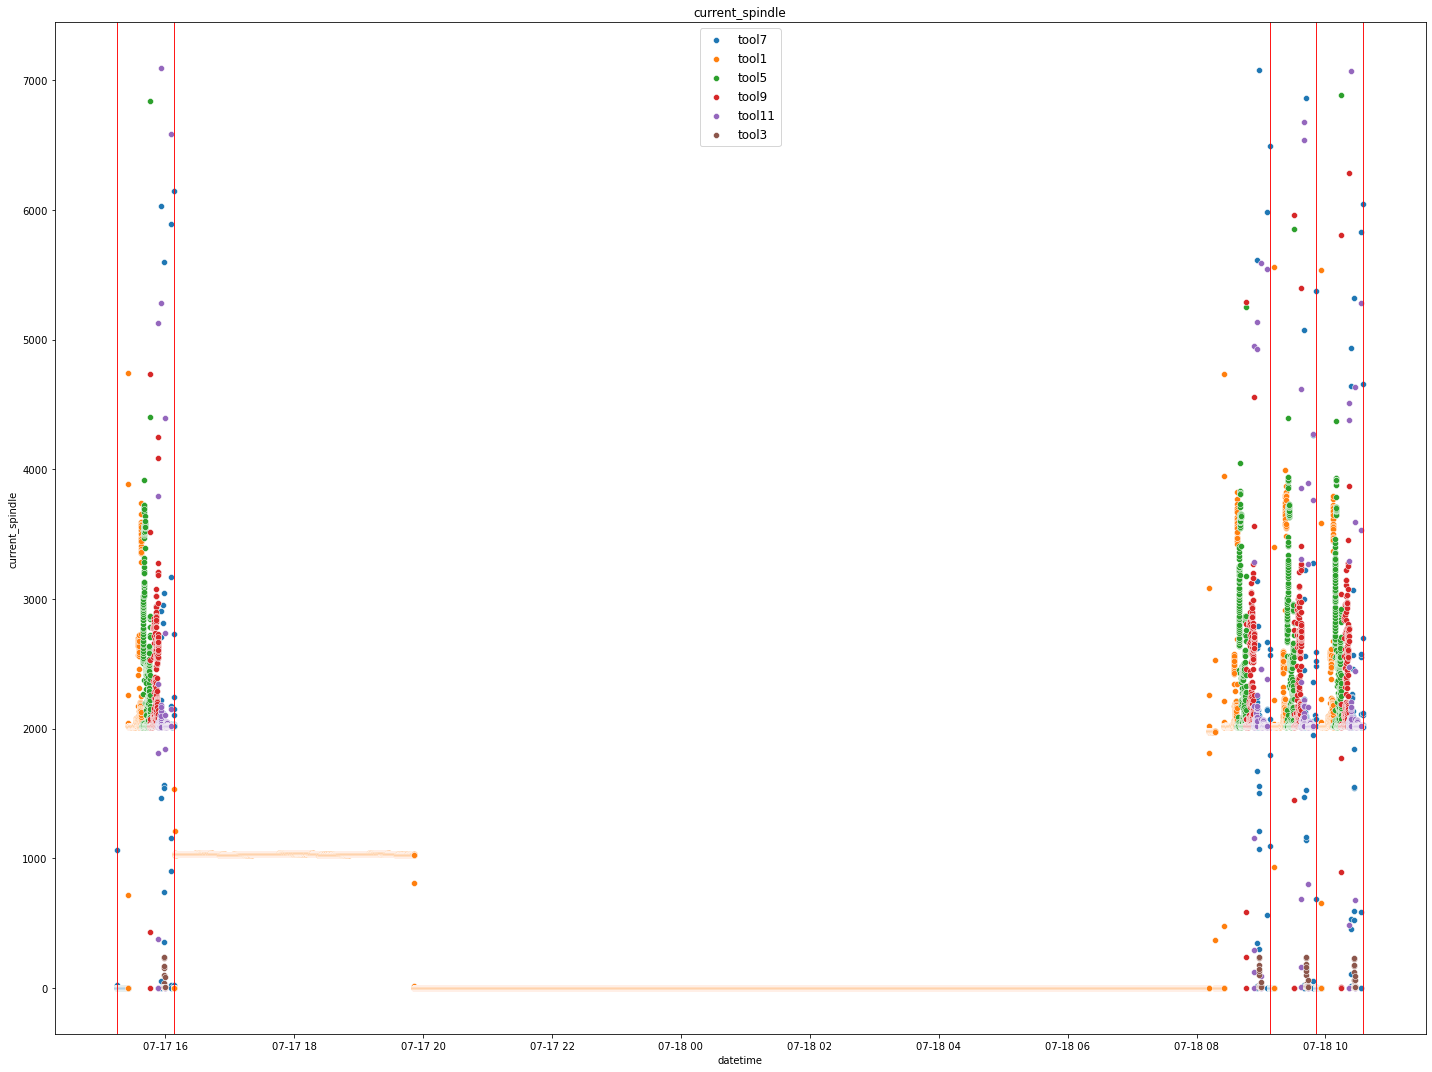

In [94]:
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.axvspan('2022-07-17 15:14:50' ,'2022-07-17 15:14:50', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-17 16:08:03' ,'2022-07-17 16:08:03', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-18 09:08:14' ,'2022-07-18 09:08:14', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-18 09:51:02' ,'2022-07-18 09:51:02', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-18 10:35:16' ,'2022-07-18 10:35:16', color = 'red', alpha = 0.9, label = 'shot change')
plt.title('current_spindle')
fig.tight_layout()
plt.show()

shot5923에서 엄청난 공백이 발생하였지만, 그 이유도 알 수 없을 뿐더러, 공백의 발생 전후에 어떤 변화가 일어난 것 같지도 않다.

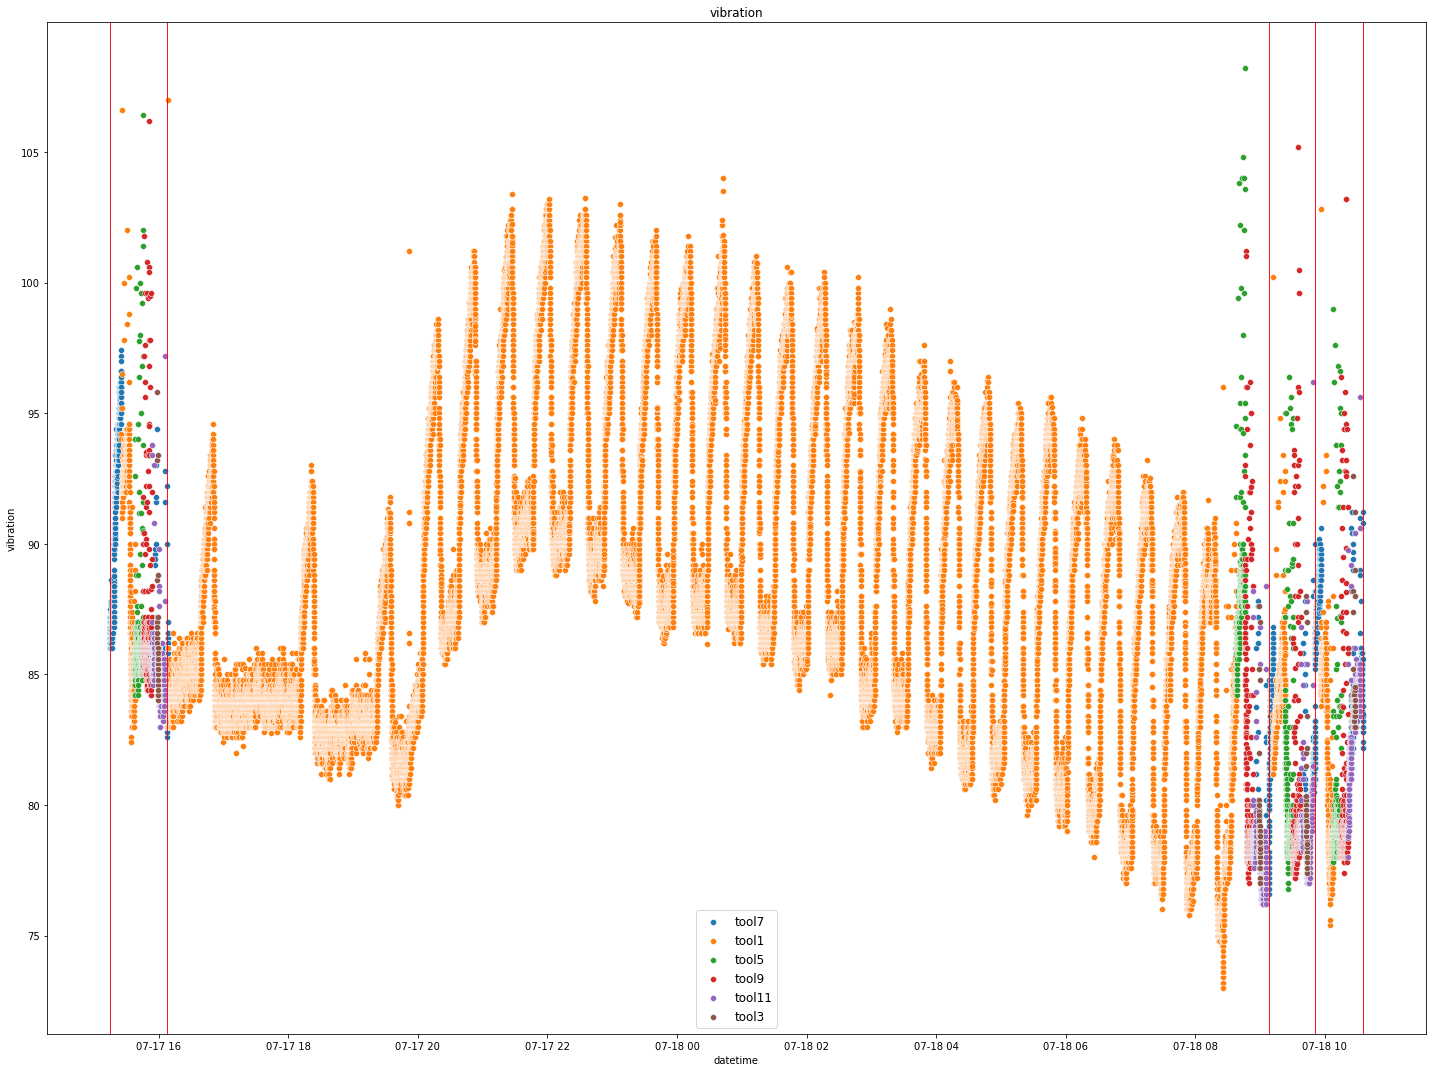

In [95]:
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['vibration'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['vibration'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['vibration'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['vibration'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['vibration'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['vibration'], label = 'tool3')
plt.legend(fontsize = 12)
plt.axvspan('2022-07-17 15:14:50' ,'2022-07-17 15:14:50', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-17 16:08:03' ,'2022-07-17 16:08:03', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-18 09:08:14' ,'2022-07-18 09:08:14', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-18 09:51:02' ,'2022-07-18 09:51:02', color = 'red', alpha = 0.9, label = 'shot change')
plt.axvspan('2022-07-18 10:35:16' ,'2022-07-18 10:35:16', color = 'red', alpha = 0.9, label = 'shot change')
plt.title('vibration')
fig.tight_layout()
plt.show()

## 일관된 분포에만 집중하자(다시 거시적인 관점에서 해석) - 각각의 공구별 미시적인 접근은 거시적인 관점을 해석한 뒤

In [96]:
shot_list

array([5832., 5833., 5834., 5835., 5836., 5837., 5838., 5839., 5840.,
       5841., 5842., 5843., 5844., 5845., 5846., 5847., 5848., 5849.,
       5850., 5851., 5852., 5853., 5854., 5855., 5856., 5857., 5858.,
       5859., 5860., 5861., 5862., 5863., 5864., 5865., 5866., 5867.,
       5868., 5869., 5870., 5871., 5872., 5873., 5874., 5875., 5876.,
       5877., 5878., 5879., 5880., 5881., 5882., 5883., 5884., 5885.,
       5886., 5887., 5888., 5889., 5890., 5891., 5892., 5893., 5894.,
       5895., 5896., 5897., 5898., 5899., 5900., 5901., 5902., 5903.,
       5904., 5905., 5906., 5907., 5908., 5909., 5910., 5911., 5912.,
       5913., 5914., 5915., 5916., 5917., 5918., 5919., 5920., 5921.,
       5922., 5923., 5924., 5925., 5926., 5927., 5928., 5929., 5930.,
       5931., 5932., 5933., 5934., 5935., 5936., 5937., 5938., 5939.,
       5940., 5941., 5942., 5943., 5944., 5945., 5946., 5947., 5948.,
       5949., 5950., 5951., 5952., 5953., 5954., 5955., 5956., 5957.,
       5958., 5959.,

In [97]:
timediff_df

interval
0        42.0
1        42.0
2        46.0
3        51.0
4        42.0
5        41.0
6        42.0
7        43.0
8        42.0
9       182.0
10       64.0
11      108.0
12       43.0
13       43.0
14       44.0
15       44.0
16       81.0
17       43.0
18       43.0
19       44.0
20       44.0
21       44.0
22       50.0
23      152.0
24       42.0
25       43.0
26       41.0
27       45.0
28       42.0
29       44.0
30       43.0
31       43.0
32      239.0
33       73.0
34        0.0
35      101.0
36       43.0
37       43.0
38       44.0
39       44.0
40       80.0
41       43.0
42       43.0
43       44.0
44       43.0
45       44.0
46       53.0
47      147.0
48       45.0
49       42.0
50       42.0
51       40.0
52       46.0
53       52.0
54       43.0
55       41.0
56       44.0
57      191.0
58       70.0
59       81.0
60       50.0
61       61.0
62       46.0
63       47.0
64       73.0
65       46.0
66       48.0
67       62.0
68      221.0
69       50.0
70       42.0
71       46.0
72       41.0
73       43.0
74       42.0
75       44.0
76       42.0
77      273.0
78       13.0
79       50.0
80       69.0
81       36.0
82       39.0
83       42.0
84       37.0
85       36.0
86       50.0
87       55.0
88       40.0
89       47.0
90       53.0
91     1020.0
92       42.0
93       44.0
94       44.0
95      105.0
96       47.0
97       42.0
98       42.0
99       44.0
100      49.0
101      94.0
102      46.0
103      51.0
104      42.0
105      44.0
106      44.0
107      42.0
108      42.0
109      42.0
110      42.0
111      43.0
112     243.0
113      44.0
114       0.0
115     136.0
116      90.0
117      44.0
118      44.0
119      45.0
120      65.0
121      44.0
122      44.0
123      45.0
124      92.0
125      44.0
126      45.0
127      95.0
128      42.0
129      43.0
130      42.0
131      43.0
132      42.0
133      43.0
134      69.0
135     181.0
136      67.0
137       5.0
138       0.0
139     144.0
140      44.0
141      45.0
142      89.0
143      45.0
144     126.0
145      45.0
146      45.0
147      43.0
148      45.0
149      45.0
150      46.0
151      93.0
152      23.0
153      42.0
154      42.0
155      43.0

## 전체적인 분포의 구성을 알아보기

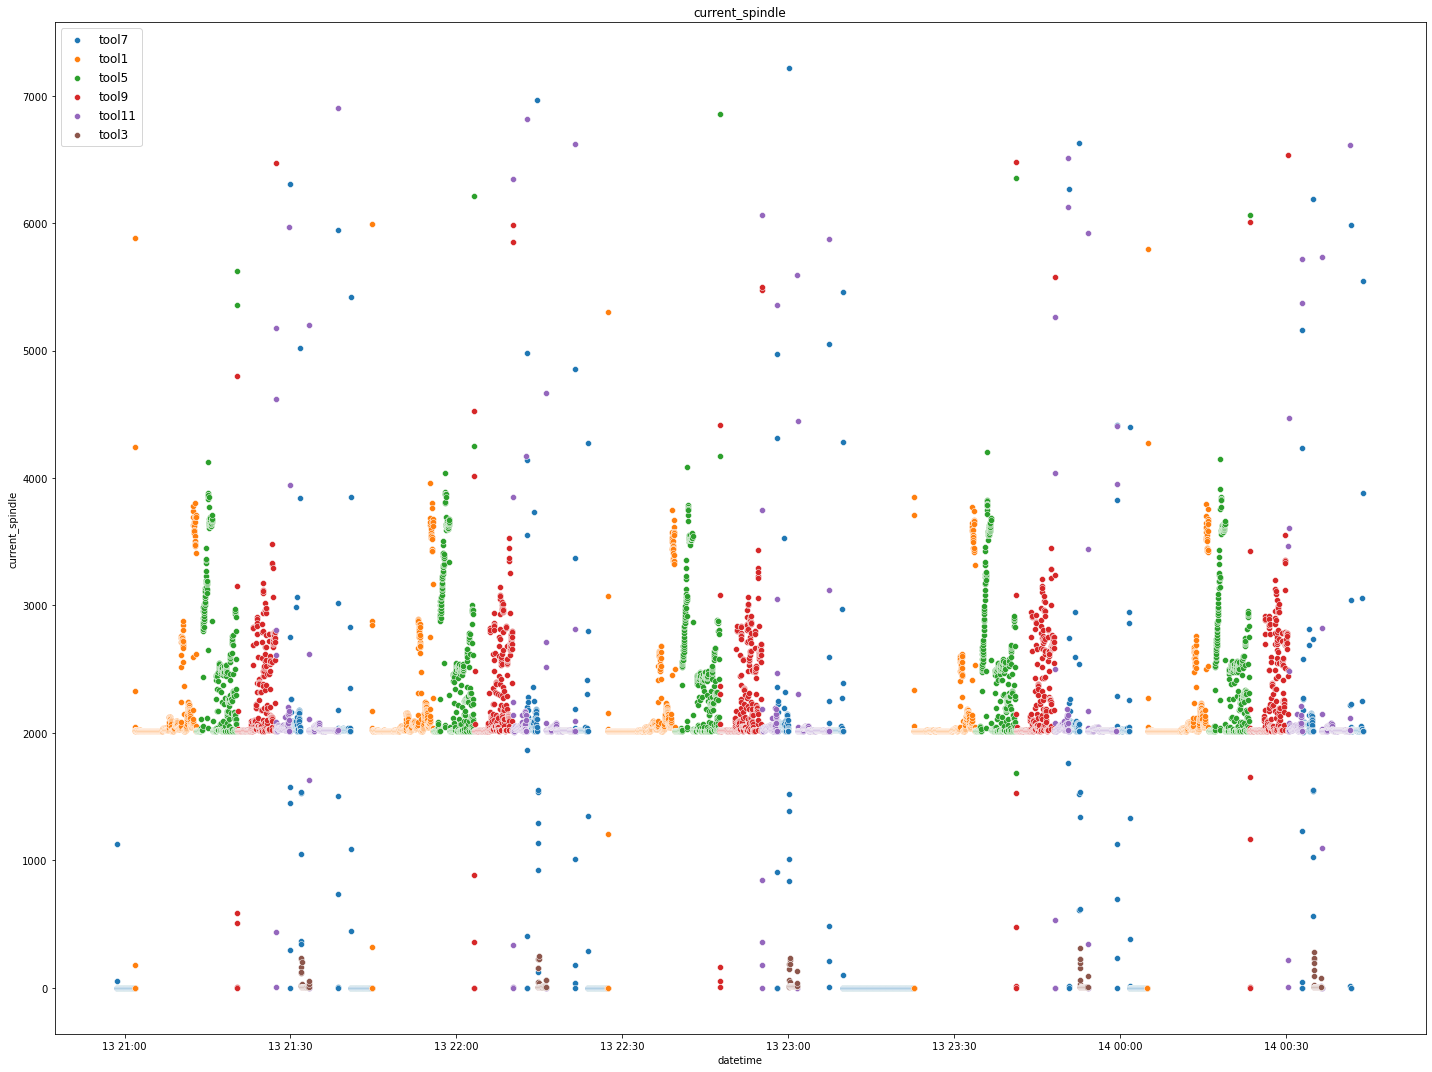

In [98]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5831) & (df_VL04_mod4['shot_no'] < 5837)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

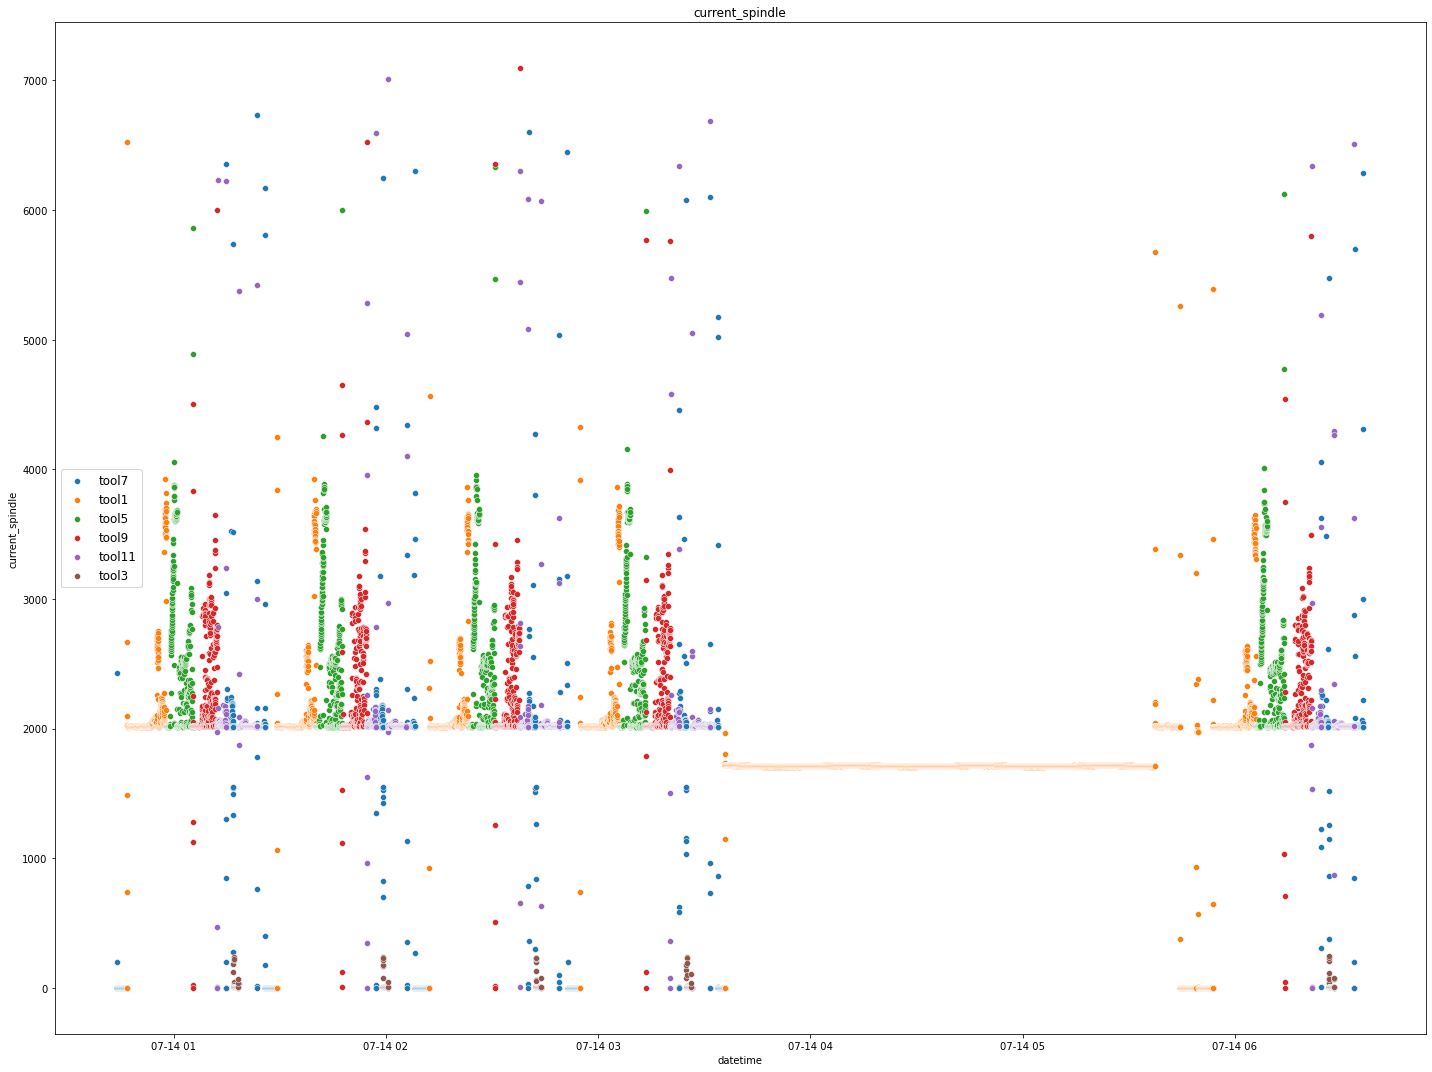

In [99]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5836) & (df_VL04_mod4['shot_no'] < 5842)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

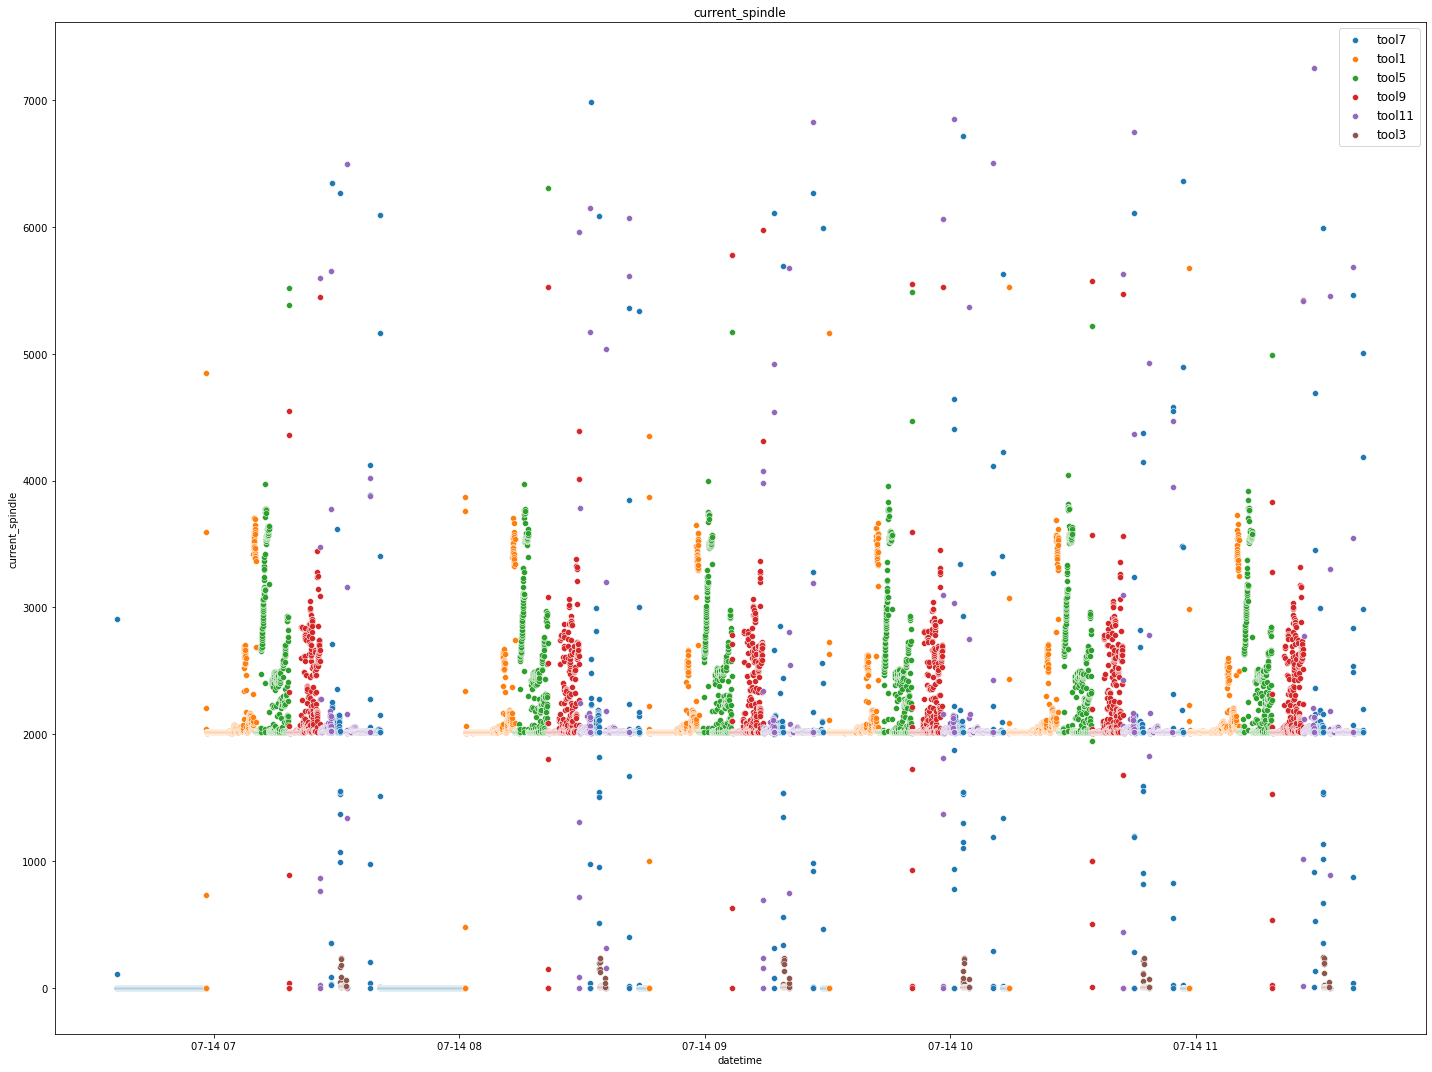

In [100]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5841) & (df_VL04_mod4['shot_no'] < 5847)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

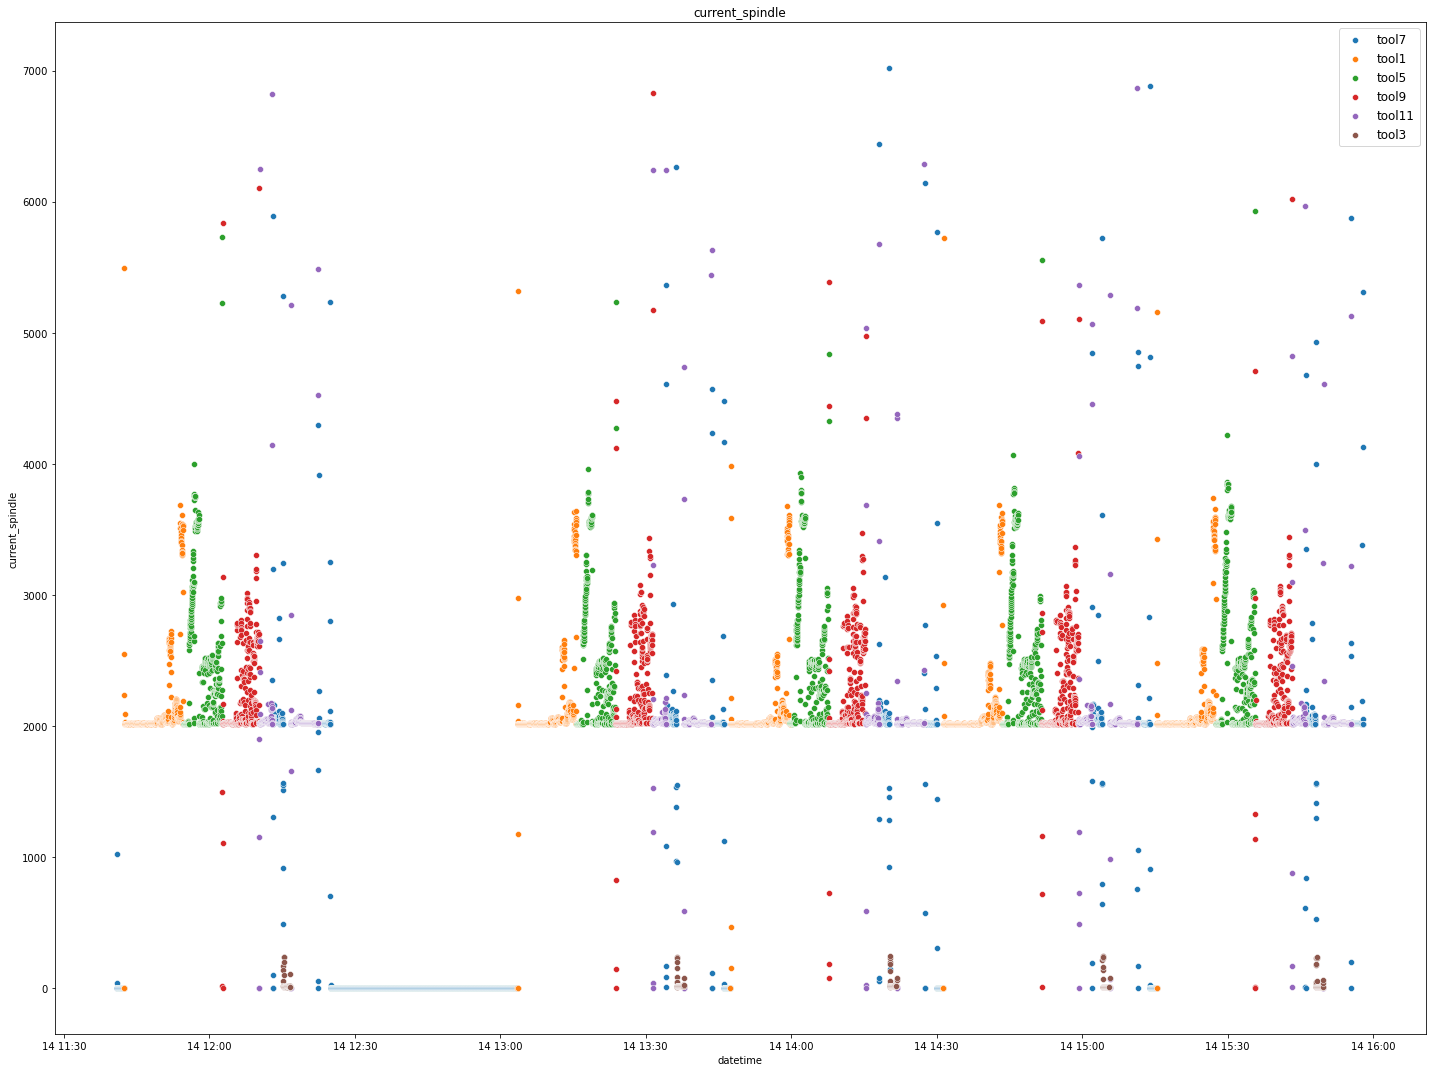

In [101]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5846) & (df_VL04_mod4['shot_no'] < 5852)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

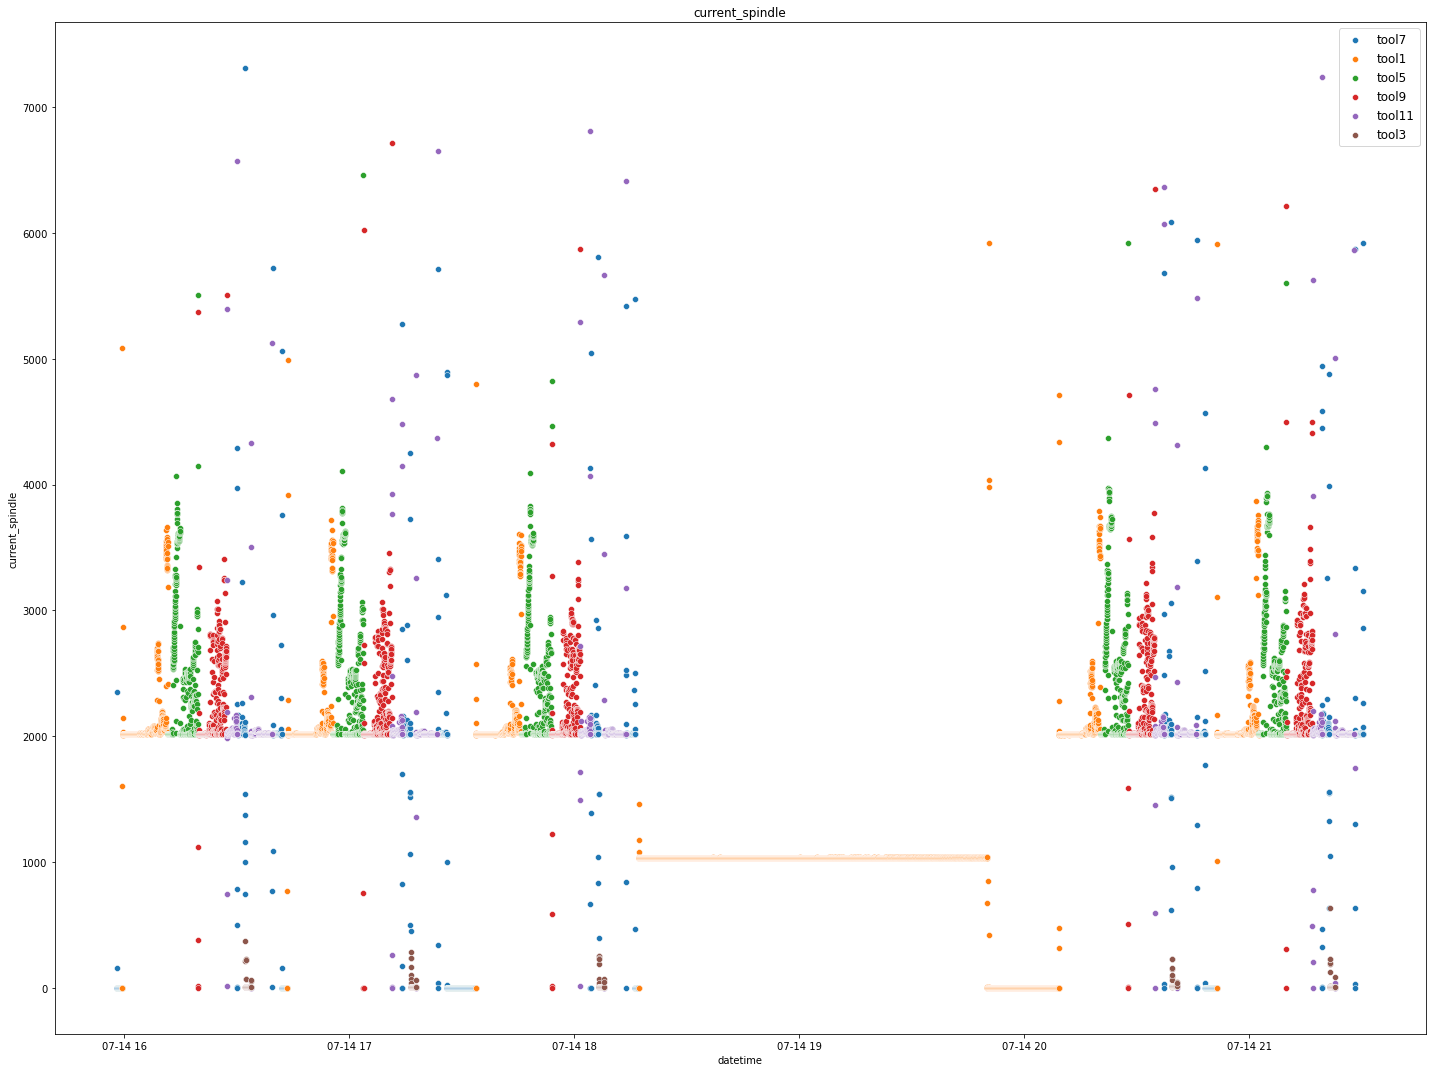

In [102]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5851) & (df_VL04_mod4['shot_no'] < 5857)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

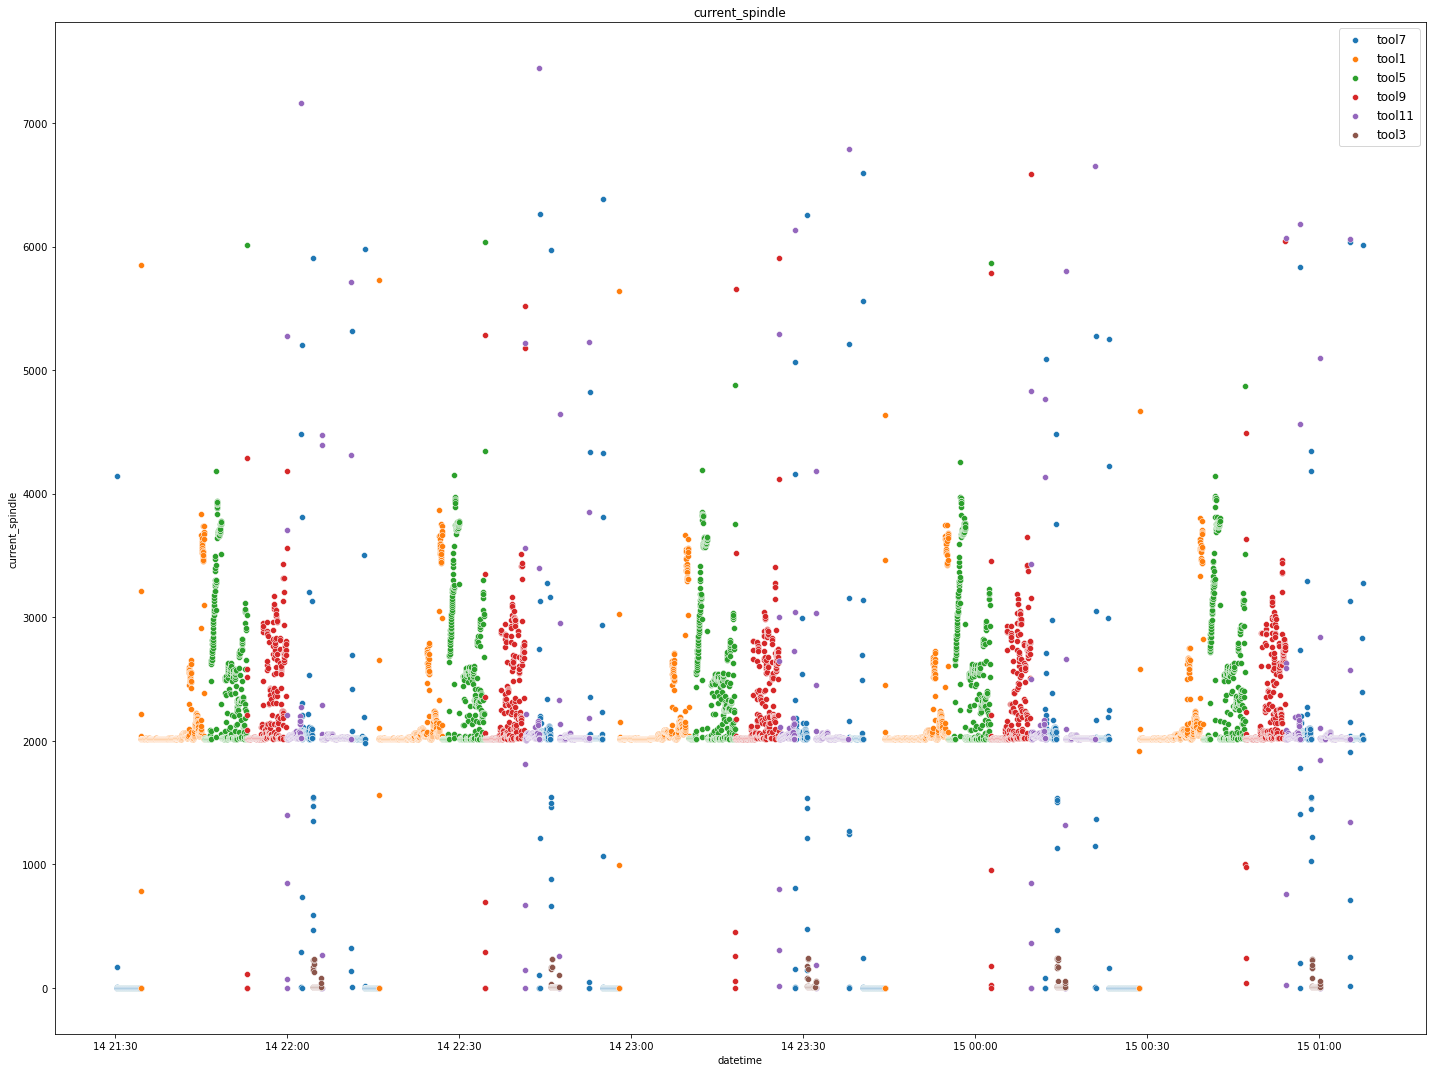

In [103]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5856) & (df_VL04_mod4['shot_no'] < 5862)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

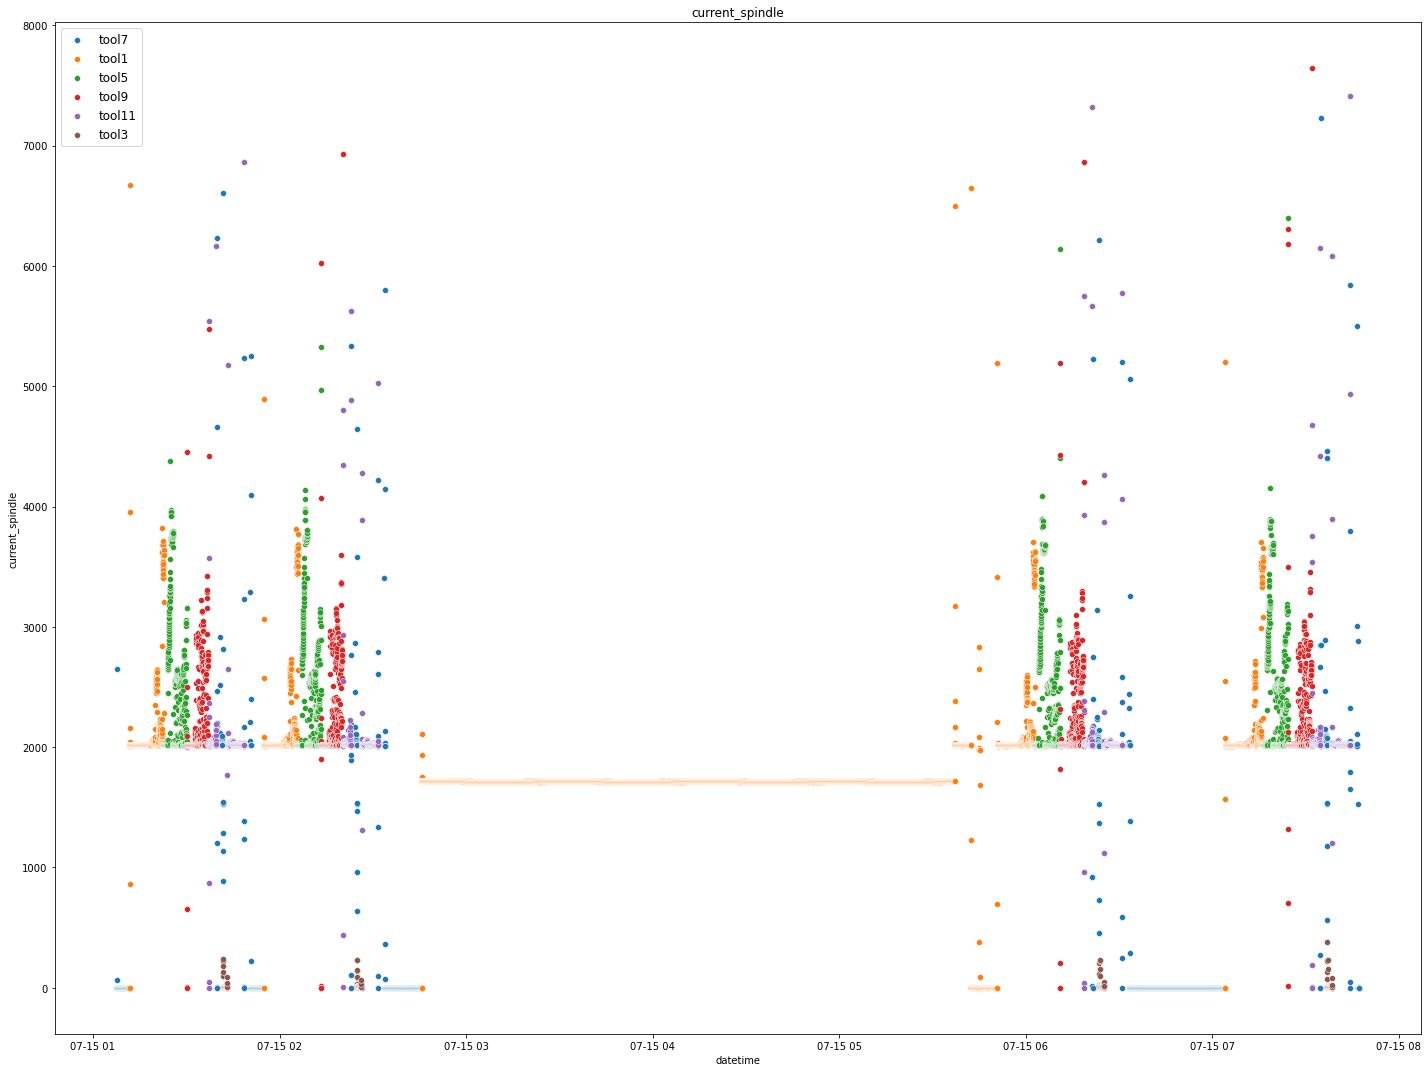

In [104]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5861) & (df_VL04_mod4['shot_no'] < 5867)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

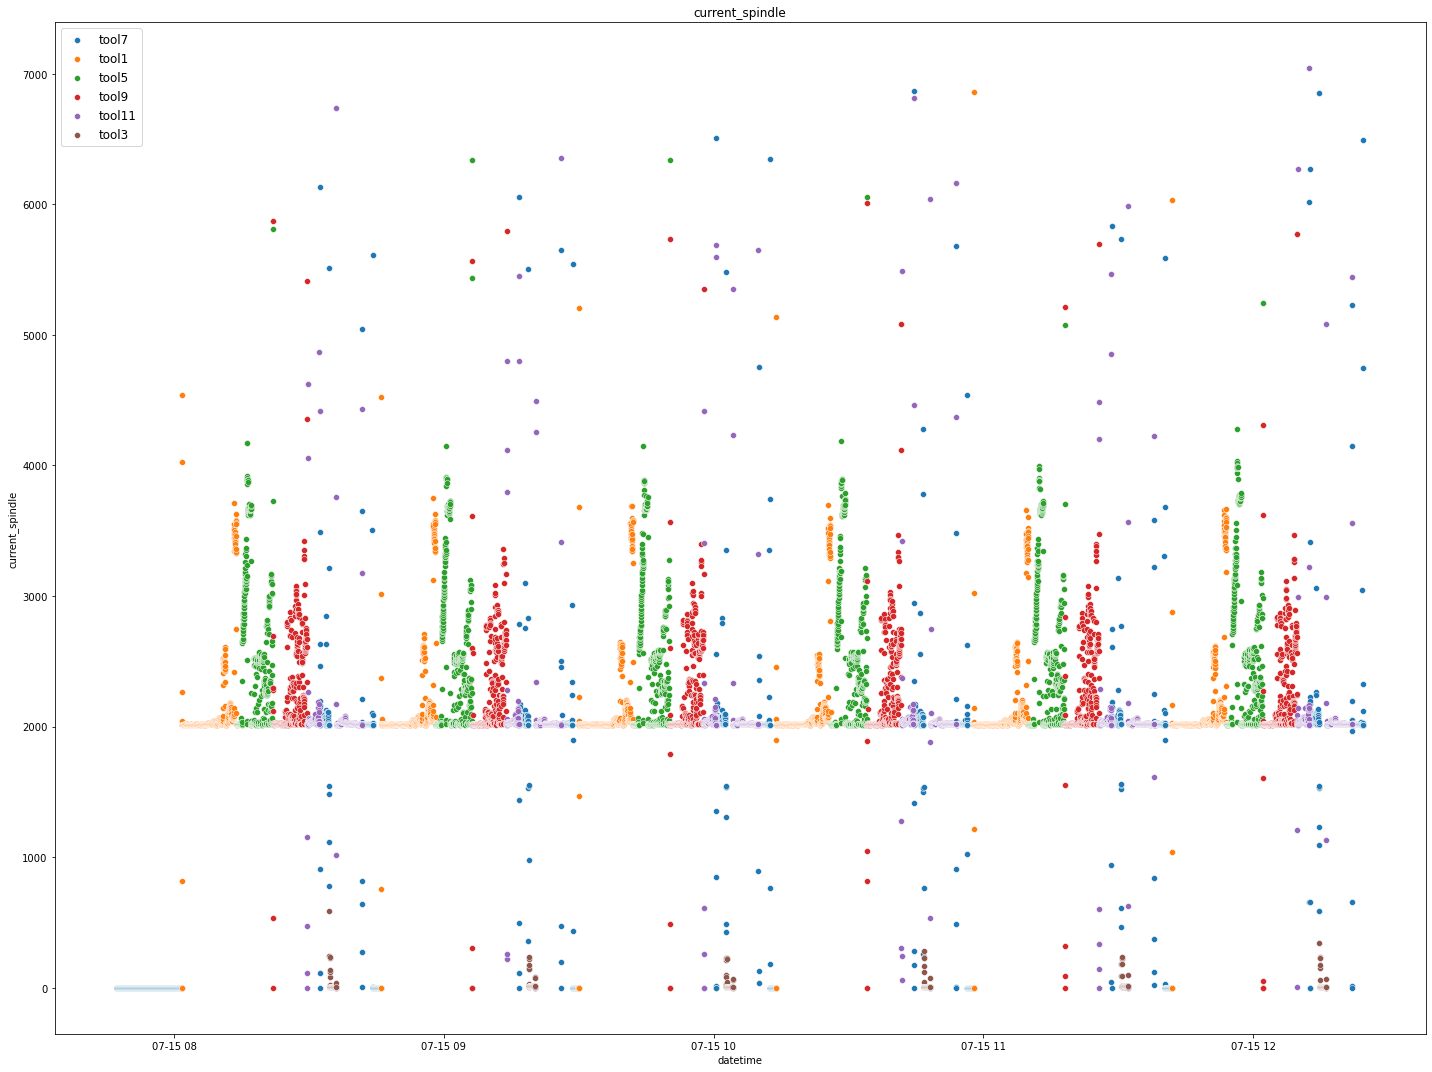

In [105]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5866) & (df_VL04_mod4['shot_no'] < 5872)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

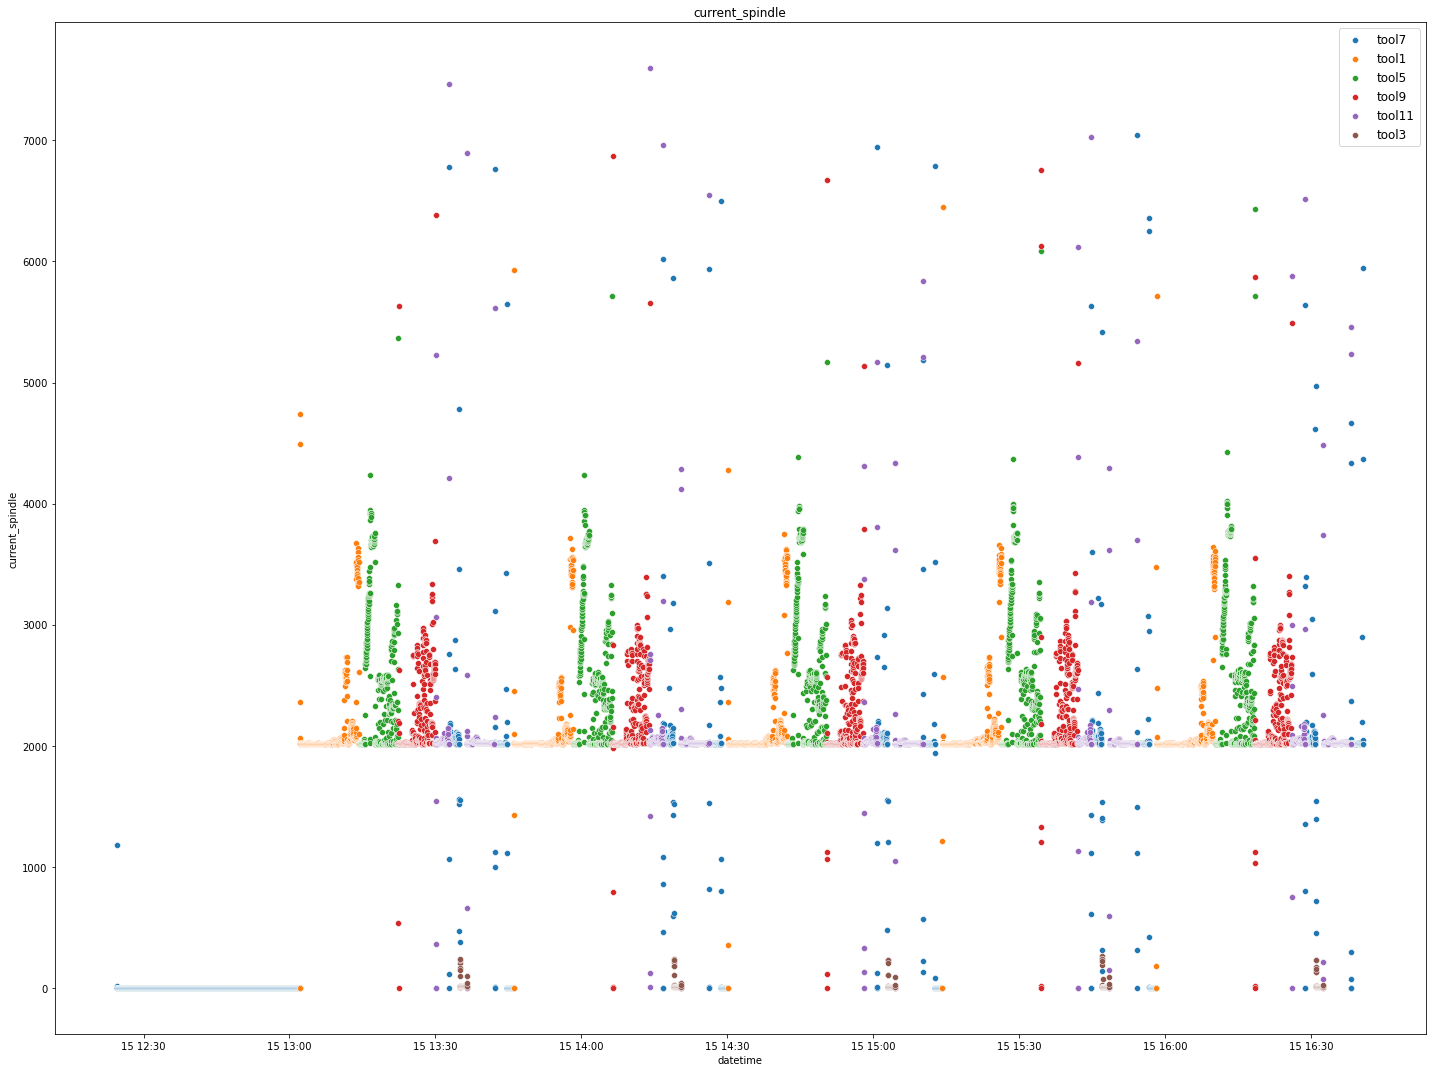

In [106]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5871) & (df_VL04_mod4['shot_no'] < 5877)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

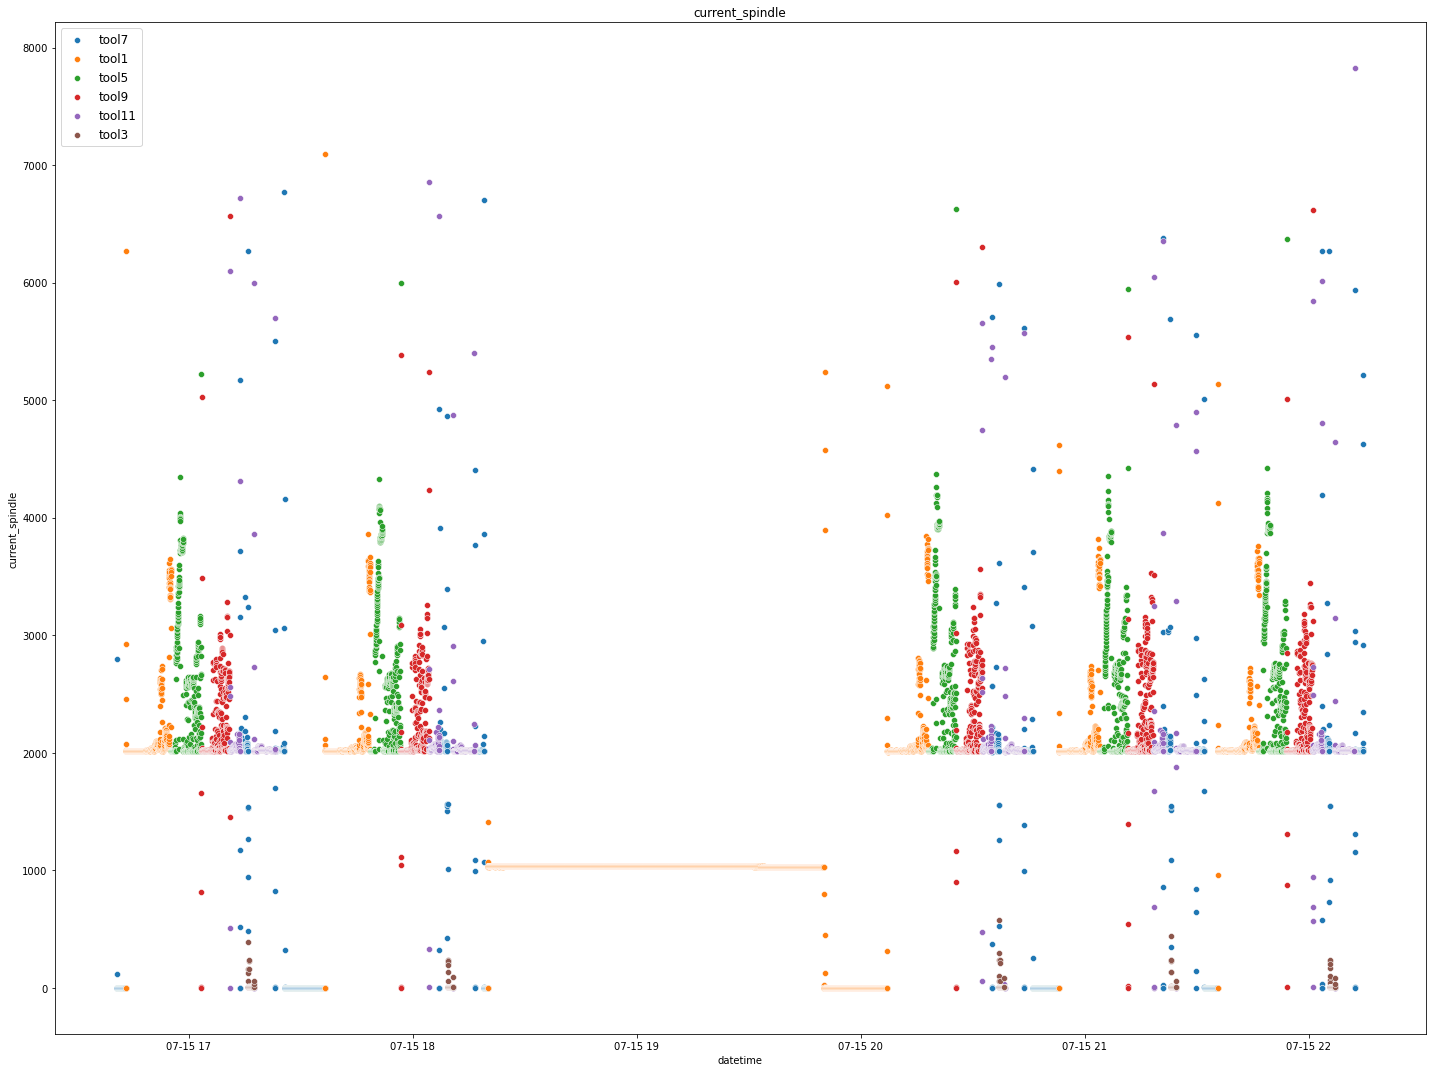

In [107]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5876) & (df_VL04_mod4['shot_no'] < 5882)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

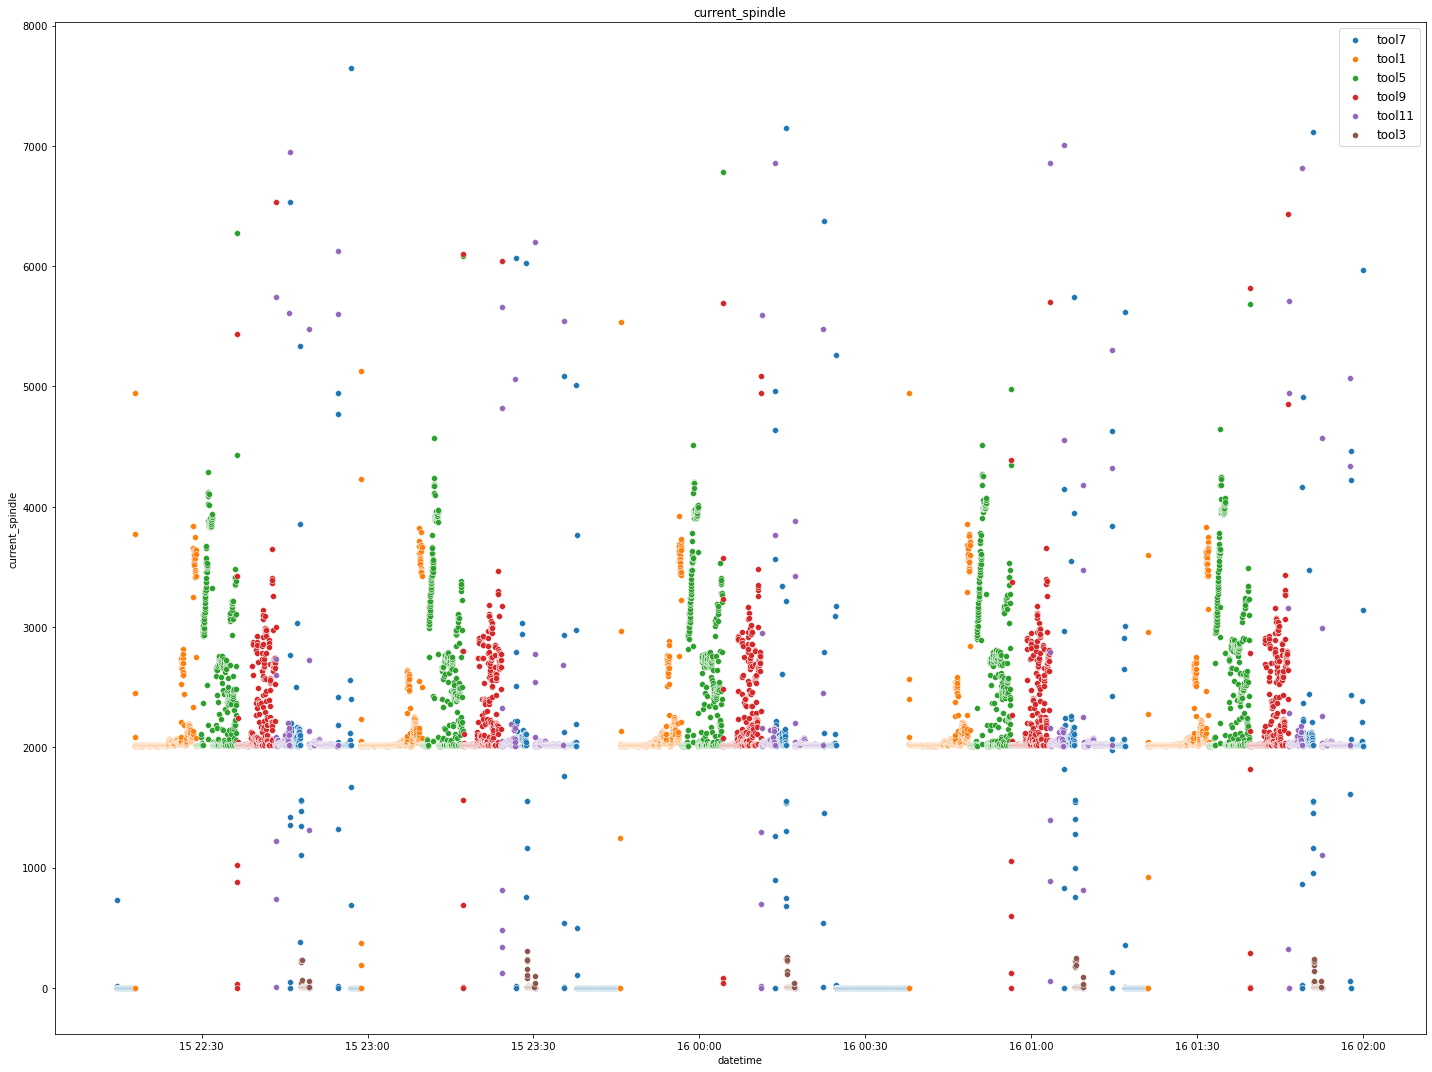

In [108]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5881) & (df_VL04_mod4['shot_no'] < 5887)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

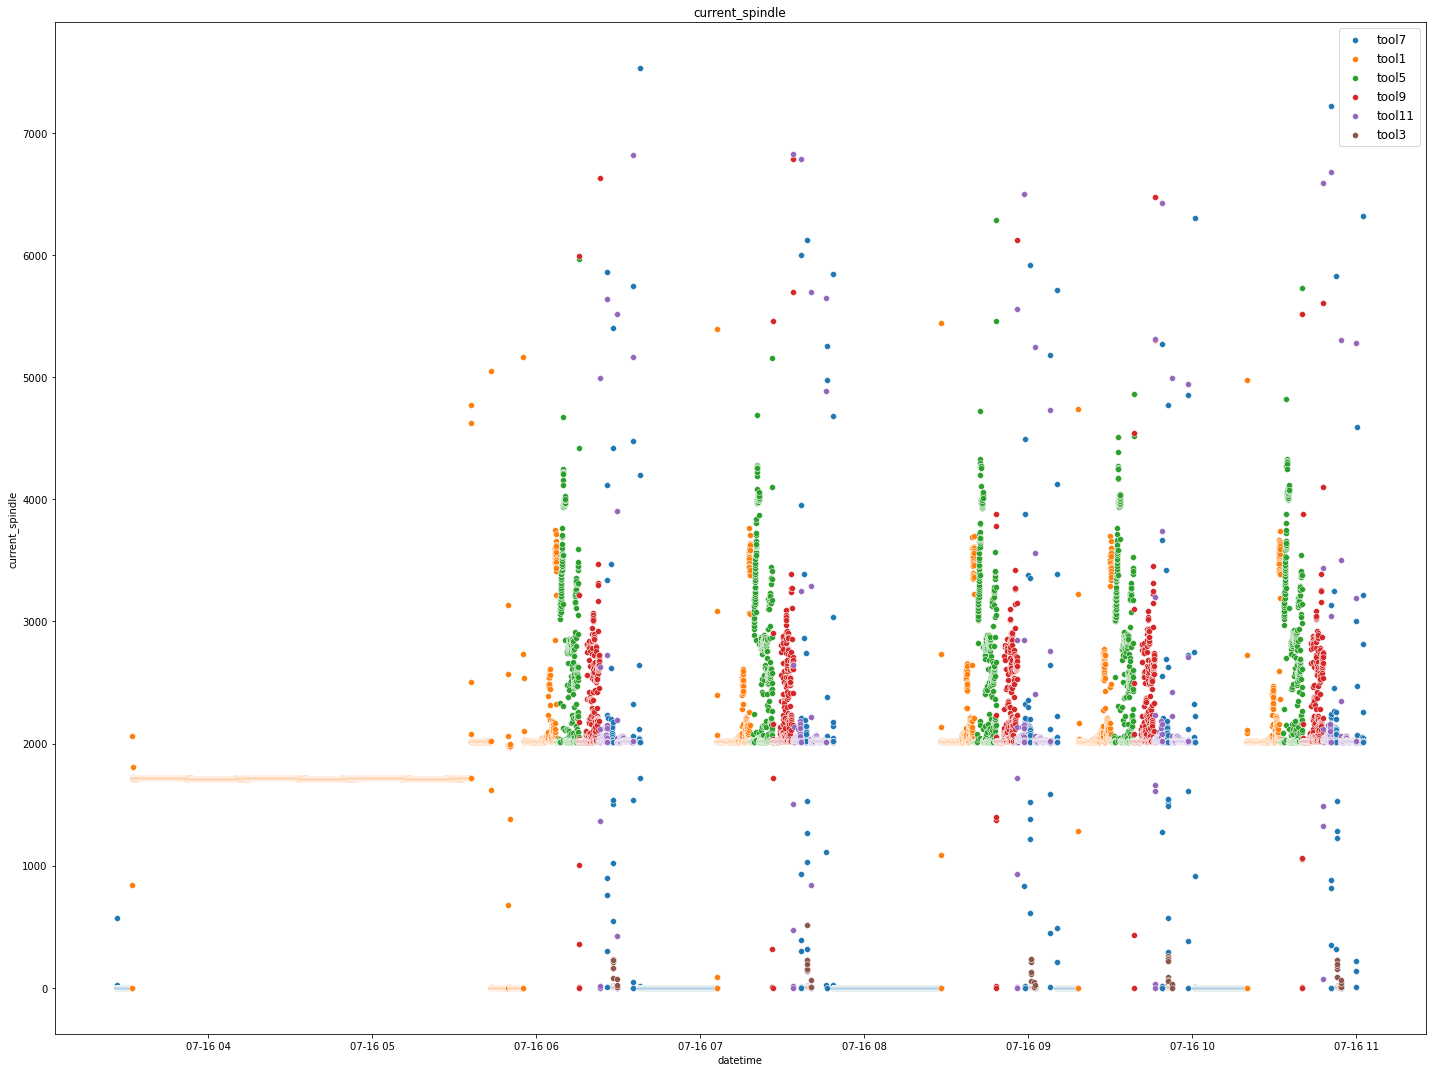

In [109]:
df_VLO4_mod4_E = df_VL04_mod4[(df_VL04_mod4['shot_no']>5888) & (df_VL04_mod4['shot_no'] < 5894)]
fig = plt.figure(figsize = (20, 15))

sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==7]['current_spindle'], label = 'tool7')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==1]['current_spindle'], label = 'tool1')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==5]['current_spindle'], label = 'tool5')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==9]['current_spindle'], label = 'tool9')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==11]['current_spindle'], label = 'tool11')
sns.scatterplot(data=df_VLO4_mod4_E[df_VLO4_mod4_E['tool']==3]['current_spindle'], label = 'tool3')
plt.legend(fontsize = 12)
plt.title('current_spindle')
fig.tight_layout()
plt.show()

제 생각입니다\
shot의 길이는 중요하지 않다는 것을 깨달음 shot의 길이 = 정상적인 작동시간(대략 40분) + delay\
거시적인 관점으로 설비의 동작을 시계열이든 뭐든 예측하려면 위에서 언급한 delay에 대한 예측이 가능해야함\
하지만 이때 그 딜레이들이 인간 혹은 다른 환경적인 요소들에 의해 영향을 받는 것이라면 단순 시계열이 적용이 가능할지는 의문(애초 실험전 가정한 독립성이 깨지는 것이니)\
감히 추측건대 그 딜레이 시점에서 공구의 교체가 일어나거나 설비가 작동을 멈추는 시점일 것

#### 질문
1. 팁을 교체하는데 소요되는 시간(팁 마다 다르겠지만 대략적으로라도?)
2. 팁을 교체할 때, 설비는 멈추는지 아무 input 값이 없는지
3. 한 shot에 tool이 두번 이상 동작 가능한지
4. 현재 수집된 데이터 기반으로 설비를 동작했을때 불량품은 만들어지지 않는지
5. shot 단위라는게 제품 생산의 단위인지, 시간의 단위인지
6. 딜레이가 왜 발생하는지
7. 교체 시점에 대한 의문, 달라지는게 없다면(문제가 발생하기 전에 주기적으로 교체중)

## 시계열 예측을 위한 딜레이 값에 대한 고민 -> 대안이 shot?

In [110]:
timediff_df

interval
0        42.0
1        42.0
2        46.0
3        51.0
4        42.0
5        41.0
6        42.0
7        43.0
8        42.0
9       182.0
10       64.0
11      108.0
12       43.0
13       43.0
14       44.0
15       44.0
16       81.0
17       43.0
18       43.0
19       44.0
20       44.0
21       44.0
22       50.0
23      152.0
24       42.0
25       43.0
26       41.0
27       45.0
28       42.0
29       44.0
30       43.0
31       43.0
32      239.0
33       73.0
34        0.0
35      101.0
36       43.0
37       43.0
38       44.0
39       44.0
40       80.0
41       43.0
42       43.0
43       44.0
44       43.0
45       44.0
46       53.0
47      147.0
48       45.0
49       42.0
50       42.0
51       40.0
52       46.0
53       52.0
54       43.0
55       41.0
56       44.0
57      191.0
58       70.0
59       81.0
60       50.0
61       61.0
62       46.0
63       47.0
64       73.0
65       46.0
66       48.0
67       62.0
68      221.0
69       50.0
70       42.0
71       46.0
72       41.0
73       43.0
74       42.0
75       44.0
76       42.0
77      273.0
78       13.0
79       50.0
80       69.0
81       36.0
82       39.0
83       42.0
84       37.0
85       36.0
86       50.0
87       55.0
88       40.0
89       47.0
90       53.0
91     1020.0
92       42.0
93       44.0
94       44.0
95      105.0
96       47.0
97       42.0
98       42.0
99       44.0
100      49.0
101      94.0
102      46.0
103      51.0
104      42.0
105      44.0
106      44.0
107      42.0
108      42.0
109      42.0
110      42.0
111      43.0
112     243.0
113      44.0
114       0.0
115     136.0
116      90.0
117      44.0
118      44.0
119      45.0
120      65.0
121      44.0
122      44.0
123      45.0
124      92.0
125      44.0
126      45.0
127      95.0
128      42.0
129      43.0
130      42.0
131      43.0
132      42.0
133      43.0
134      69.0
135     181.0
136      67.0
137       5.0
138       0.0
139     144.0
140      44.0
141      45.0
142      89.0
143      45.0
144     126.0
145      45.0
146      45.0
147      43.0
148      45.0
149      45.0
150      46.0
151      93.0
152      23.0
153      42.0
154      42.0
155      43.0

In [111]:
timediff_df['interval'].unique()

array([  42.,   46.,   51.,   41.,   43.,  182.,   64.,  108.,   44.,
         81.,   50.,  152.,   45.,  239.,   73.,    0.,  101.,   80.,
         53.,  147.,   40.,   52.,  191.,   70.,   61.,   47.,   48.,
         62.,  221.,  273.,   13.,   69.,   36.,   39.,   37.,   55.,
       1020.,  105.,   49.,   94.,  243.,  136.,   90.,   65.,   92.,
         95.,  181.,   67.,    5.,  144.,   89.,  126.,   93.,   23.])

## current_spindle 값 외에 적용 사안

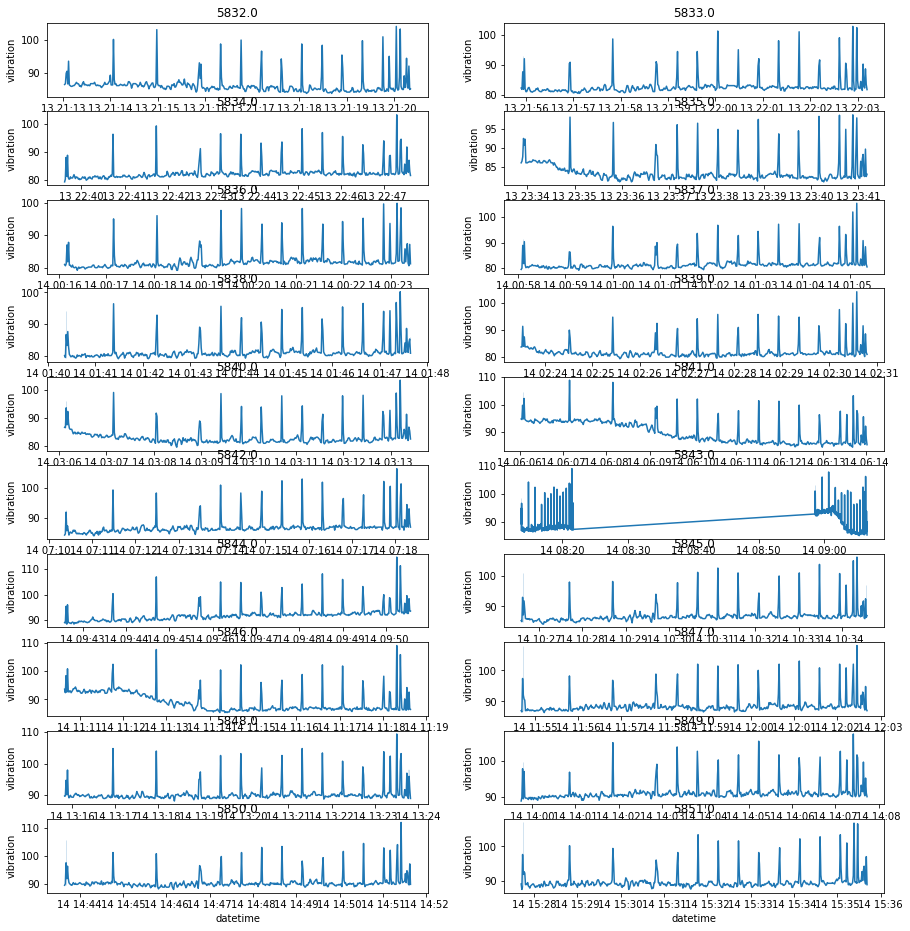

In [112]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 16))

for row in range(10):
    for col in range(2):
        idx = row * 2 + col
        if idx < len(shot_unique):
            ax = axes[row][col]
            shot = shot_unique[idx]
            sns.lineplot(data=(df_VL04_Tool5[df_VL04_Tool5['shot_no'] == shot])['vibration'],ax=ax)
            ax.set_title(shot)